# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

## Steps to be followed

1. Data Understanding
2. Data Cleaning
3. Filtering High Value Customers
4. Creating target Variable
5. Deriving New Features
6. Handling Missing values
7. Data Visualization-Univariate Analysis
6. Data Visualization- Bivariate Analysis
7. Outlier Detection
8. Data Preparation
9. Data Modeling and Eavlaution
    - Non-Interpretable Models
    - Interpretable Models
10. Conclusion

## **1. Data Understanding**

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [10]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=45dcbe742fe6bfa7f65226eeed302dda2c80a679cdf3a939d480cd68d820f166
  Stored in directory: /Users/mdsanowarhossain/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [12]:
#Importing Data Reading and Processing Libraries
import pandas as pd
import numpy as np

#Imporitng Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Data Preparation and Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

#Importing Miscellaneous Libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA

# For Hopkins test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# For clustering 
## using KMeans ##
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## using Hierarchical ##
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Importing required packages for visualization
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
#import pydot, graphviz
from sklearn.svm import SVC

# Other sklearn packages
import sklearn.metrics as metrics
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from datetime import date,datetime
import math
import multiprocessing

In [13]:
#Loading the Dataset

df = pd.read_csv('telecom_churn_data.csv')
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [14]:
df.shape

(99999, 226)

In [15]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [16]:
#Lets check how the data is spread
df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

##  2.**Data cleaning**

In [17]:
# There are some columns representing volume based users have month specified in their name, while all other columns have used numbers `6,7,8,9` indicating month name
month = ['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g']
df = df.rename(columns = {'aug_vbc_3g':'3g_vbc_8','jul_vbc_3g':'3g_vbc_7','jun_vbc_3g':'3g_vbc_6','sep_vbc_3g':'3g_vbc_9'})


In [18]:
# Converting the date columns to date time format

date_col= [col for col in df.columns if 'date' in col]

for i in df[date_col]:
    df[i] = pd.to_datetime(df[i])


Columns that have just one unique value for all the customers do not really imply anything. Hence removing columns with zero variance from our dataset.

In [19]:
# Dropping columns that have only one unique values for all the leads.
cols = []
for i in df.columns:
    if df[i].nunique() ==1:
        cols.append(i)
df = df.drop(cols,1)
df.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100          NaN   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [20]:
# Let us also drop mobile number column
df = df.drop('mobile_number',1)

In [21]:
# Create an id column for identification of each customer
df = df.reset_index()
df = df.rename(columns = {'index':'cust_id'})
df['cust_id'] = df['cust_id']+1
df.head()

cust_id   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0        1  197.385  214.816  213.803   21.100          NaN          NaN   
1        2   34.047  355.074  268.321   86.285        24.11        78.68   
2        3  167.690  189.058  210.226  290.714        11.54        55.24   
3        4  221.338  251.102  508.054  389.500        99.91        54.39   
4        5  261.636  309.876  238.174  163.426        50.31       149.44   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0         0.00          NaN           NaN           NaN          0.00   
1         7.68        18.34         15.74         99.84        304.76   
2        37.26        74.81        143.33        220.59        208.36   
3       310.98       241.71        123.31        109.01         71.68   
4        83.89        58.78         76.96         91.88        124.26   

   offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0           NaN            NaN            NaN           0.00            NaN   
1         53.76            0.0           0.00           0.00           0.00   
2        118.91            0.0           0.00           0.00          38.49   
3        113.54            0.0          54.86          44.38           0.00   
4         45.81            0.0           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN           0.00            NaN   
1            0.0           0.00           0.00           0.00   
2            0.0           0.00           0.00          70.94   
3            0.0          28.09          39.04           0.00   
4            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68         37.99         83.03             26.

In [22]:
df.shape

(99999, 210)

Let us check if there are any categorical columns in our dataset. We can check that by finding if any columns have just 2 unique values `1` & `0`. These values analogous to `yes` & `no` respectively.

In [23]:
# Let us create a seperate category for categorical columns
cat_cols = []

for i in df.columns:
    if df[i].nunique()==2:
        cat_cols.append(i)
cat_cols 

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

 ### <a>Some important insights

- ### Average revenue of call per user 

    We observe that the minimum values in arpu_6, arpu_7, arpu_8 & arpu_9 are negative. This indicates that some customers are making loss to the company. We will retain them in our study as our criteria of high value customer is based on `usage base churn` and not on `revenue based churn`. Removing them might lead to loss of some meaningful insights. Let us observe their importance in the exploratory data aanalysis part and then take a call.

- ### Sachet recharge
`sachet recharge` are Service schemes with validity smaller than a month. This means that the days of recahrge in sachet recharge should be less than 30. Any service schemes beyond 29 days should mean that the client has done a monyhly recharge or the entry is wrong. Let us `cap the values beyond 29 days` by the highest number of days recharge below 30 days.

In [24]:
df['sachet_2g_6'] = df['sachet_2g_6'].clip(0,28)
df['sachet_2g_7'] = df['sachet_2g_7'].clip(0,29)
df['sachet_2g_8'] = df['sachet_2g_8'].clip(0,29)
df['sachet_3g_7'] = df['sachet_3g_7'].clip(0,24)
df['sachet_3g_8'] = df['sachet_3g_8'].clip(0,29)

In [25]:
df.shape

(99999, 210)

## 3.**Filtering High Value customers**

Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)

In [26]:
#Derive Total data rech columns describing data rechatrge amount

df['total_data_rech_6'] = df['av_rech_amt_data_6']* df['total_rech_data_6']
df['total_data_rech_7'] = df['av_rech_amt_data_7']* df['total_rech_data_7']
df['total_data_rech_8'] = df['av_rech_amt_data_8']* df['total_rech_data_8']
df['total_data_rech_9'] = df['av_rech_amt_data_9']* df['total_rech_data_9']

Total recharge amount spent in the 6th &  7th month(Good Phase) and the 8th &  9th month

In [27]:
df['total_amt_6'] = df[['total_rech_amt_6', 'total_data_rech_6']].sum(axis=1)
df['total_amt_7'] = df[['total_rech_amt_7', 'total_data_rech_7']].sum(axis=1)
df['total_amt_8'] = df[['total_rech_amt_8', 'total_data_rech_8']].sum(axis=1)
df['total_amt_9'] = df[['total_rech_amt_9', 'total_data_rech_9']].sum(axis=1)

Defining total average recharge amount for the good phase for months 6 and 7 (the good phase)

In [28]:
df['rech_amt_good_yr'] = df[['total_amt_6', 'total_amt_7']].sum(axis=1)
df['avg_rech_amt_good_yr'] = round(df['rech_amt_good_yr']/2,2)

In [29]:
df.head()

cust_id   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0        1  197.385  214.816  213.803   21.100          NaN          NaN   
1        2   34.047  355.074  268.321   86.285        24.11        78.68   
2        3  167.690  189.058  210.226  290.714        11.54        55.24   
3        4  221.338  251.102  508.054  389.500        99.91        54.39   
4        5  261.636  309.876  238.174  163.426        50.31       149.44   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0         0.00          NaN           NaN           NaN          0.00   
1         7.68        18.34         15.74         99.84        304.76   
2        37.26        74.81        143.33        220.59        208.36   
3       310.98       241.71        123.31        109.01         71.68   
4        83.89        58.78         76.96         91.88        124.26   

   offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0           NaN            NaN            NaN           0.00            NaN   
1         53.76            0.0           0.00           0.00           0.00   
2        118.91            0.0           0.00           0.00          38.49   
3        113.54            0.0          54.86          44.38           0.00   
4         45.81            0.0           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN           0.00            NaN   
1            0.0           0.00           0.00           0.00   
2            0.0           0.00           0.00          70.94   
3            0.0          28.09          39.04           0.00   
4            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68         37.99         83.03             26.

In [30]:
perc = df['avg_rech_amt_good_yr'].dropna().quantile(0.7)
perc

478.0

In [31]:
# Filtering high value customers
high_val = df.loc[df['avg_rech_amt_good_yr'] >= perc]
high_val.head()

cust_id    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0         1   197.385   214.816   213.803   21.100          NaN          NaN   
7         8  1069.180  1349.850  3171.480  500.000        57.84        54.68   
8         9   378.721   492.223   137.362  166.787       413.69       351.03   
21       22   514.453   597.753   637.760  578.596       102.41       132.11   
23       24    74.350   193.897   366.966  811.480        48.96        50.66   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00          NaN           NaN           NaN          0.00   
7         52.29          NaN        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
21        85.14       161.63        757.93        896.68        983.39   
23        33.58        15.74         85.41         89.36        205.89   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
7            NaN          16.23          33.49          31.64            NaN   
8         108.71           0.00           0.00           0.00            0.0   
21        869.89           0.00           0.00           0.00            0.0   
23        111.88           0.00           0.00           0.00            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN           0.00            NaN   
7           23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00            0.0   
21           0.00           0.00           0.00            0.0   
23           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                NaN               NaN              0.00               NaN   
7                0.0               0.0              0.00               NaN   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0            NaN           NaN          0.00           NaN               NaN   
7         422.16        533.91        255.79           NaN              4.30   
8         378.09        288.18         63.04         60.71            116.56   
21  

In [32]:
## We can drop the total_rech_data &  av_rech_amt_data columns for all the months as we have derived new columns using these columns
del_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8"]

high_val = high_val.drop(del_col,1)

## We can also drop the the average recharge amount of the good phase
high_val = high_val.drop('avg_rech_amt_good_yr',1) 

In [33]:
high_val.shape

(30001, 213)

## 4.**Creating Target Variable** 

- ### **Tag churners and remove attributes of the churn phase**
- ### Tagging the churned customers (churn=1, else 0) based on the fourth month as follows: <br>

Those who have `not made any calls (either incoming or outgoing)` AND have `not used mobile internet even once in the churn phase`. The attributes we need to use to tag churners are:<br>

 - total_ic_mou_9<br>
 - total_og_mou_9<br>
 - vol_2g_mb_9<br>
 - vol_3g_mb_9<br>

In [34]:
# let us filter churned customers based on the fourth month

high_val['churn'] = high_val.apply(lambda x: 1 if (x.total_ic_mou_9 == 0 and x.total_og_mou_9 == 0 and x.vol_2g_mb_9 ==0 and x.vol_3g_mb_9==0) else 0, axis=1)
high_val['churn'] = high_val['churn'].astype("str")
high_val.shape

(30001, 214)

In [35]:
# Let us see teh number of churned customers
high_val['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [36]:
# let us check what's the % of churned customers
print("The Percentage of churned customers is:" , round(100*(high_val.churn.astype("int").sum()/len(high_val)),2))

The Percentage of churned customers is: 8.14


After tagging churners, let us remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [37]:
col_9 = [i for i in high_val.columns if '9' in i]
high_val = high_val.drop(col_9,1)
high_val.shape

(30001, 160)

In [38]:
# let us update our categorical column list

cat_cols = [ele for ele in cat_cols if ele not in col_9]


## 5.Deriving new features

In [39]:
#Conevrt AON in Months
high_val['aon_yr'] = round((high_val['aon']/365),1)


In [40]:
high_val.drop('aon', axis=1, inplace=True)
high_val.head()

cust_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0         1   197.385   214.816   213.803          NaN          NaN   
7         8  1069.180  1349.850  3171.480        57.84        54.68   
8         9   378.721   492.223   137.362       413.69       351.03   
21       22   514.453   597.753   637.760       102.41       132.11   
23       24    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00           NaN           NaN          0.00            NaN   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             NaN           0.00            NaN            NaN           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                NaN              0.00               NaN               NaN   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               NaN               NaN              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0            NaN           NaN          0.00               NaN   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00          

Let us create bins for our age of network column that explains the `years since when a particular client is using the T network.`

In [41]:
age_range = [ 0,  2,  4,  6,  8, 10, 12]
age_bin = [ 1, 2, 3, 4, 5, 6]
high_val['age_group'] = pd.cut(high_val['aon_yr'], age_range, labels=age_bin)
high_val['age_group'] = high_val['age_group'].astype(str)
high_val['age_group'].head()

0     2
7     2
8     1
21    1
23    1
Name: age_group, dtype: object

In [42]:
# let us update our categorical column list

cat_cols.append('age_group')
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'age_group']

## 6.Handling Missing values

 ### a) Checking missing values

In [43]:
# Now Checking Null values
null = round(100*(high_val.isnull().sum()/len(high_val.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

night_pck_user_8            46.83
arpu_3g_8                   46.83
max_rech_data_8             46.83
count_rech_2g_8             46.83
fb_user_8                   46.83
count_rech_3g_8             46.83
arpu_2g_8                   46.83
total_data_rech_8           46.83
date_of_last_rech_data_8    46.83
arpu_2g_6                   44.15
total_data_rech_6           44.15
arpu_3g_6                   44.15
date_of_last_rech_data_6    44.15
count_rech_3g_6             44.15
night_pck_user_6            44.15
count_rech_2g_6             44.15
fb_user_6                   44.15
max_rech_data_6             44.15
total_data_rech_7           43.15
fb_user_7                   43.15
date_of_last_rech_data_7    43.15
count_rech_2g_7             43.15
count_rech_3g_7             43.15
arpu_3g_7                   43.15
arpu_2g_7                   43.15
night_pck_user_7            43.15
max_rech_data_7             43.15
std_og_mou_8                 3.91
std_ic_t2t_mou_8             3.91
spl_og_mou_8  

  ### b) Imputation of missing values

 - #### Recharge columns in Good and Action Phase

In [44]:
# Let us observe missing values in recharge columns 
rech_col = [i for i in high_val.columns if 'rech' in i]
rech_6_col = [i for i in rech_col if '6' in i]
rech_7_col = [i for i in rech_col if '7' in i]
rech_8_col = [i for i in rech_col if '8' in i]

`Recharge columns for month- 6(June)`

In [45]:
# Let us observe missing values in recharge columns in the month of june(6)
rech_6 = pd.DataFrame(high_val[rech_6_col])

# adding some other columns describing data usage of customer in june(6)
vol_col = high_val[["vol_2g_mb_6",'vol_3g_mb_6']]

rech_6 = pd.concat([rech_6,vol_col], axis = 1) 
rech_6.head(10)

total_rech_num_6  total_rech_amt_6  max_rech_amt_6 date_of_last_rech_6  \
0                  4               362             252          2014-06-21   
7                  5              1580            1580          2014-06-27   
8                 19               437              90          2014-06-25   
21                22               600              50          2014-06-30   
23                 3                 0               0          2014-06-18   
33                 7              1058             252          2014-06-30   
38                27               420              30          2014-06-30   
41                 4               496             150          2014-06-24   
48                13              2317             250          2014-06-29   
53                24              1159             120          2014-06-29   

   date_of_last_rech_data_6  max_rech_data_6  count_rech_2g_6  \
0                2014-06-21            252.0              0.0   
7                       NaT              NaN              NaN   
8                       NaT              NaN              NaN   
21                      NaT              NaN              NaN   
23                      NaT              NaN              NaN   
33               2014-06-30            252.0              0.0   
38                      NaT              NaN              NaN   
41                      NaT              NaN              NaN   
48                      NaT              NaN              NaN   
53               2014-06-29             23.0              4.0   

    count_rech_3g_6  total_data_rech_6  vol_2g_mb_6  vol_3g_mb_6  
0               1.0              252.0        30.13        83.57  
7               NaN                NaN         0.00         0.00  
8               NaN                NaN         0.00         0.00  
21              NaN                NaN         0.00         0.00  
23              NaN                NaN         0.00         0.00  
33              5.0             5285.0        87.05      3509.90  
38              NaN                NaN         0.00         0.00  
41              NaN                NaN         0.00         0.00  
48              NaN                NaN         0.00         0.00  
53              0.0              344.0         0.27         0.00

<a> From the above table we can see that whenever the date of last recharge is missing, all the corresponding values for max_rech, count_rech_2g & 3g are missing. The mobile internet usage(2G & 3G data) corresponding to these values is zero as seen from the above table. Thus let us impute these missing values by zero, considering there were no recharges done by the customer.

`Recharge columns for month- 7(July)`

In [46]:
# Similarly Let us observe missing values in recharge columns for the month of july(7)

rech_7_col

['total_rech_num_7',
 'total_rech_amt_7',
 'max_rech_amt_7',
 'date_of_last_rech_7',
 'date_of_last_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'total_data_rech_7']

In [47]:
rech_7 = pd.DataFrame(high_val[rech_7_col])

# adding some other columns describing data usage of customer in july
vol_col = high_val[["vol_2g_mb_7",'vol_3g_mb_7']]

rech_7 = pd.concat([rech_7,vol_col], axis = 1) 
rech_7.head(10)

total_rech_num_7  total_rech_amt_7  max_rech_amt_7 date_of_last_rech_7  \
0                  3               252             252          2014-07-16   
7                  5               790             790          2014-07-25   
8                 21               601             154          2014-07-31   
21                26               680              50          2014-07-31   
23                 5               454             179          2014-07-07   
33                14              2806            1255          2014-07-30   
38                22               636             110          2014-07-28   
41                 4               510             150          2014-07-22   
48                 5               580             250          2014-07-23   
53                26              1372             150          2014-07-31   

   date_of_last_rech_data_7  max_rech_data_7  count_rech_2g_7  \
0                2014-07-16            252.0              0.0   
7                       NaT              NaN              NaN   
8                2014-07-31            154.0              2.0   
21                      NaT              NaN              NaN   
23               2014-07-07            179.0              0.0   
33               2014-07-28           1255.0              0.0   
38                      NaT              NaN              NaN   
41                      NaT              NaN              NaN   
48                      NaT              NaN              NaN   
53               2014-07-26             23.0              5.0   

    count_rech_3g_7  total_data_rech_7  vol_2g_mb_7  vol_3g_mb_7  
0               1.0              252.0         1.32       150.76  
7               NaN                NaN         0.00         0.00  
8               0.0              354.0       356.00       750.95  
21              NaN                NaN         0.00         0.00  
23              2.0              712.0         0.48       599.09  
33              8.0            20424.0        57.76      8154.65  
38              NaN                NaN         0.00         0.00  
41              NaN                NaN         0.00         0.00  
48              NaN                NaN         0.00         0.00  
53              0.0              575.0         0.00         0.00

<a> From the above table we can see that whenever the date of last recharge is missing, all the corresponding values for max_rech, count_rech_2g & 3g are missing. The mobile internet usage(2G & 3G data) corresponding to these values is zero as seen from the above table. Thus let us impute these missing values by zero,Considering there were no recharges done by the customer. This is similar to the pattern observed for june month.

`Recharge columns for month- 8(August)`

In [48]:
# Similarly Let us observe missing values in recharge columns in the month of August(8)

rech_8_col

['total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_8',
 'date_of_last_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'total_data_rech_8']

In [49]:
rech_8 = pd.DataFrame(high_val[rech_8_col])

# adding some other columns describing data usage of customer in August
vol_col = high_val[["vol_2g_mb_8",'vol_3g_mb_8']]

rech_8 = pd.concat([rech_8,vol_col], axis = 1) 
rech_8.head(10)

total_rech_num_8  total_rech_amt_8  max_rech_amt_8 date_of_last_rech_8  \
0                  2               252             252          2014-08-08   
7                  7              3638            1580          2014-08-26   
8                 14               120              30          2014-08-30   
21                27               718              50          2014-08-31   
23                 4               439             179          2014-08-24   
33                 1               455             455          2014-08-26   
38                 6               416             130          2014-08-24   
41                 3               410             150          2014-08-31   
48                 3               197             130          2014-08-28   
53                14               775             130          2014-08-26   

   date_of_last_rech_data_8  max_rech_data_8  count_rech_2g_8  \
0                2014-08-08            252.0              0.0   
7                       NaT              NaN              NaN   
8                2014-08-23             23.0              3.0   
21                      NaT              NaN              NaN   
23               2014-08-06            179.0              0.0   
33               2014-08-26            455.0              0.0   
38                      NaT              NaN              NaN   
41                      NaT              NaN              NaN   
48                      NaT              NaN              NaN   
53               2014-08-02             23.0              1.0   

    count_rech_3g_8  total_data_rech_8  vol_2g_mb_8  vol_3g_mb_8  
0               1.0              252.0         5.75       109.61  
7               NaN                NaN         0.00         0.00  
8               0.0              207.0         0.03        11.94  
21              NaN                NaN         0.00         0.00  
23              2.0              540.0         0.01      1009.92  
33              1.0              455.0         7.97      7701.01  
38              NaN                NaN         0.00         0.00  
41              NaN                NaN         0.00         0.00  
48              NaN                NaN         0.00         0.00  
53              0.0               23.0         0.00         0.00

<a> Similar to june & july month, from the above table we can see that whenever the date of last recharge is missing, all the corresponding values for max_rech, count_rech_2g & 3g are missing. The mobile internet usage(2G & 3G data) corresponding to these values is zero as seen from the above table. Thus let us impute these missing values by zero.,considering there were no recharges done by the customer.This is exactly similar to the pattern observed for june & july month.

In [50]:
# let us impue the missing values in these recharge columns by zero.

impute_0 = [ 'date_of_last_rech_data_6','max_rech_data_6','count_rech_2g_6','count_rech_3g_6','total_data_rech_6',
           'date_of_last_rech_data_7','max_rech_data_7','count_rech_2g_7','count_rech_3g_7','total_data_rech_7',
           'date_of_last_rech_data_8','max_rech_data_8','count_rech_2g_8','count_rech_3g_8','total_data_rech_8']

high_val[impute_0] = high_val[impute_0].apply(lambda x: x.fillna(0))

In [51]:
# Now Checking Null values
null = round(100*(high_val.isnull().sum()/len(high_val.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

arpu_3g_8              46.83
fb_user_8              46.83
arpu_2g_8              46.83
night_pck_user_8       46.83
arpu_3g_6              44.15
fb_user_6              44.15
arpu_2g_6              44.15
night_pck_user_6       44.15
arpu_3g_7              43.15
arpu_2g_7              43.15
fb_user_7              43.15
night_pck_user_7       43.15
std_ic_t2t_mou_8        3.91
std_og_t2t_mou_8        3.91
std_og_t2m_mou_8        3.91
std_ic_t2m_mou_8        3.91
loc_ic_mou_8            3.91
std_ic_t2f_mou_8        3.91
std_og_t2f_mou_8        3.91
loc_ic_t2m_mou_8        3.91
std_og_mou_8            3.91
loc_ic_t2f_mou_8        3.91
std_ic_mou_8            3.91
isd_og_mou_8            3.91
loc_ic_t2t_mou_8        3.91
spl_og_mou_8            3.91
loc_og_mou_8            3.91
spl_ic_mou_8            3.91
loc_og_t2c_mou_8        3.91
loc_og_t2t_mou_8        3.91
onnet_mou_8             3.91
og_others_8             3.91
offnet_mou_8            3.91
loc_og_t2f_mou_8        3.91
roam_ic_mou_8 

 - #### Imputing Categorical columns

In [52]:
# Let us impute the missing values in categorical columns by (-1). 
high_val[cat_cols] = high_val[cat_cols].apply(lambda x: x.fillna(-1)) 
high_val[cat_cols] = high_val[cat_cols].astype('str')
high_val[cat_cols].head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0               0.0              0.0              0.0       1.0       1.0   
7              -1.0             -1.0             -1.0      -1.0      -1.0   
8              -1.0              0.0              0.0      -1.0       1.0   
21             -1.0             -1.0             -1.0      -1.0      -1.0   
23             -1.0              0.0              0.0      -1.0       1.0   

   fb_user_8 age_group  
0        1.0         2  
7       -1.0         2  
8        1.0         1  
21      -1.0         1  
23       1.0         1

In [53]:
# Now Checking Null values
null = round(100*(high_val.isnull().sum()/len(high_val.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

arpu_3g_8              46.83
arpu_2g_8              46.83
arpu_3g_6              44.15
arpu_2g_6              44.15
arpu_3g_7              43.15
arpu_2g_7              43.15
loc_ic_t2f_mou_8        3.91
std_ic_t2m_mou_8        3.91
loc_og_t2c_mou_8        3.91
std_ic_t2t_mou_8        3.91
loc_og_mou_8            3.91
loc_ic_mou_8            3.91
std_og_t2t_mou_8        3.91
loc_ic_t2t_mou_8        3.91
loc_ic_t2m_mou_8        3.91
std_og_t2m_mou_8        3.91
std_ic_t2f_mou_8        3.91
std_og_t2f_mou_8        3.91
og_others_8             3.91
std_og_mou_8            3.91
spl_og_mou_8            3.91
loc_og_t2f_mou_8        3.91
isd_og_mou_8            3.91
onnet_mou_8             3.91
std_ic_mou_8            3.91
loc_og_t2t_mou_8        3.91
offnet_mou_8            3.91
spl_ic_mou_8            3.91
roam_og_mou_8           3.91
loc_og_t2m_mou_8        3.91
isd_ic_mou_8            3.91
roam_ic_mou_8           3.91
ic_others_8             3.91
date_of_last_rech_8     1.94
spl_og_mou_6  

- ### Dropping columns with missing values more than 40%

The average revenue per user for both the phases - good & action phase, have more than 40% missing values. Since our study revolves around the identification of customers that are likely to churn taking into account only usage based churn, we can safely drop these columns without affecting our study.

In [54]:
miss = round(100*(high_val.isnull().sum()/len(high_val.index)),2).sort_values(ascending = False) 

# Let us not delete data from 9th month
miss = pd.DataFrame(miss[miss >= 40])
threshold_col = miss.index

high_val = high_val.drop(threshold_col,1)

In [55]:
high_val.shape

(30001, 155)

 - #### Let us observe outgoing minutes of usage for local, standard, special and others

`month-june(6)`

In [56]:
# From the business domain knowledge, we know that total_og column is the addition of local , standard, special andd other outgoing calls
og_call_6 = ['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','spl_og_mou_6','og_others_6','total_og_mou_6']
total_og_6 = high_val[og_call_6]
# filtering only those clients who have made no outgoing calls
total_og_6.loc[total_og_6['total_og_mou_6']==0].head()

loc_og_mou_6  std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  \
0            NaN           NaN           NaN           NaN          NaN   
33           0.0           0.0           0.0           0.0          0.0   
67           0.0           0.0           0.0           0.0          0.0   
77           NaN           NaN           NaN           NaN          NaN   
91           0.0           0.0           0.0           0.0          0.0   

    total_og_mou_6  
0              0.0  
33             0.0  
67             0.0  
77             0.0  
91             0.0

<a>Thus, we can coclude from the business domain knowledge and above table that when the total outgoing calls are zero, no outgoing calls have been made in that month. We can impute the missing values in the columns of local outgoing calls, standard outgoing calls, special outgoing calls & other outgoing calls by `0`.

In [57]:
#Lets verify is our assumption right or not, sum of all outgoing calls is equal to the the tota_og_mou_6

df['outgoing_total_6'] = df['loc_og_mou_6']+ df['std_og_mou_6']+df['isd_og_mou_6']+df['spl_og_mou_6']+df['og_others_6']
df[['outgoing_total_6','total_og_mou_6']].dropna().corr()

outgoing_total_6  total_og_mou_6
outgoing_total_6               1.0             1.0
total_og_mou_6                 1.0             1.0

From above we can clearly see that these are correlated and hence when the total outgoing calls are zero, no outgoing calls have been made in that month. We can impute the missing values in the columns of local outgoing calls, standard outgoing calls, special outgoing calls & other outgoing calls by 0.

In [58]:
# Imputing by '0'
high_val[og_call_6] = high_val[og_call_6].fillna(0)

From the dataset, it is evident that local outgoing calls in `any month` are equal to the `sum of all the types of local outgoing calls` i.e. (T2T,T2M,T2F & T2C)

In [59]:
og_loc_6 = ['loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6','loc_og_mou_6']
loc_og_6 = high_val[og_loc_6]

# filtering only those clients who have made no local outgoing calls
loc_og_6.loc[loc_og_6 ['loc_og_mou_6']==0].head()

loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  \
0                NaN               NaN               NaN               NaN   
33               0.0               0.0               0.0               0.0   
67               0.0               0.0               0.0               0.0   
77               NaN               NaN               NaN               NaN   
91               0.0               0.0               0.0               0.0   

    loc_og_mou_6  
0            0.0  
33           0.0  
67           0.0  
77           0.0  
91           0.0

<a> If the total local outgoing  calls made in any month are zero, then it means that no type of local calls were made i.e. `T2T,T2M,T2F & T2C` . We can replace the missing values corresponding to them by '0'

In [60]:
#Lets verify is our assumption right or not, sum of all local outgoing calls is equal to the the total local outgoing call
#"loc_og_mou_6"

df['loc_outgoing_total_6'] = df['loc_og_t2t_mou_6']+ df['loc_og_t2m_mou_6']+df['loc_og_t2f_mou_6']+df['loc_og_t2c_mou_6']
df[['loc_outgoing_total_6','loc_og_mou_6']].dropna().corr().round()

loc_outgoing_total_6  loc_og_mou_6
loc_outgoing_total_6                   1.0           1.0
loc_og_mou_6                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [61]:
# Imputing by '0'
high_val[og_loc_6] = high_val[og_loc_6].fillna(0)

From the dataset, it is evident that std outgoing calls in `any month` are equal to the `sum of all the types of std outgoing calls` i.e. (T2T,T2M,T2F & T2C)

In [62]:
og_std_6 = ['std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','std_og_mou_6']
std_og_6 = high_val[og_std_6]
std_og_6.head()

std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  std_og_mou_6
0                NaN               NaN               NaN          0.00
7               4.30             49.89              6.66         60.86
8             116.56             13.69              0.00        130.26
21             97.93            665.36              0.00        763.29
23              0.00              2.36              0.00          2.36

<a> If the total standard outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. `T2T,T2M,T2F & T2C` . We can replace the missing values corresponding to them by '0'

In [63]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_og_mou_6"

df['std_outgoing_total_6'] = df['std_og_t2t_mou_6']+ df['std_og_t2m_mou_6']+df['std_og_t2f_mou_6']
df[['std_outgoing_total_6','std_og_mou_6']].dropna().corr().round()

std_outgoing_total_6  std_og_mou_6
std_outgoing_total_6                   1.0           1.0
std_og_mou_6                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total std outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. T2T,T2M,T2F & T2C

In [64]:
# Imputing by '0'
high_val[og_std_6] = high_val[og_std_6].fillna(0)

`month-july(7)`

In [65]:
# From the business domain knowledge, we know that total_og column is the addition of local , standard, special and other outgoing calls
og_call_7 = ['loc_og_mou_7','std_og_mou_7','isd_og_mou_7','spl_og_mou_7','og_others_7','total_og_mou_7']
total_og_7 = high_val[og_call_7]
# filtering only those clients who have made no outgoing calls
total_og_7.loc[total_og_7['total_og_mou_7']==0].head()

loc_og_mou_7  std_og_mou_7  isd_og_mou_7  spl_og_mou_7  og_others_7  \
0             NaN           NaN           NaN           NaN          NaN   
33            0.0           0.0           0.0           0.0          0.0   
67            0.0           0.0           0.0           0.0          0.0   
104           0.0           0.0           0.0           0.0          0.0   
226           0.0           0.0           0.0           0.0          0.0   

     total_og_mou_7  
0               0.0  
33              0.0  
67              0.0  
104             0.0  
226             0.0

<a>Thus, we can coclude from the business domain knowledge and above table that when the total outgoing calls are zero, no outgoing calls have been made in that month. We can impute the missing values in the columns of local outgoing calls, standard outgoing calls, special outgoing calls & other outgoing calls by `0`.

In [66]:
#Lets verify is our assumption right or not, sum of all outgoing calls is equal to the the tota_og_mou_7

df['outgoing_total_7'] = df['loc_og_mou_7']+ df['std_og_mou_7']+df['isd_og_mou_7']+df['spl_og_mou_7']+df['og_others_7']
df[['outgoing_total_7','total_og_mou_7']].dropna().corr()

outgoing_total_7  total_og_mou_7
outgoing_total_7               1.0             1.0
total_og_mou_7                 1.0             1.0

From above we can clearly see that these are correlated and hence when the total outgoing calls are zero, no outgoing calls have been made in that month. We can impute the missing values in the columns of local outgoing calls, standard outgoing calls, special outgoing calls & other outgoing calls by 0.

In [67]:
# Imputing by '0'
high_val[og_call_7] = high_val[og_call_7].fillna(0)

From the dataset, it is evident that local outgoing calls in `any month` are equal to the `sum of all the types of local outgoing calls` i.e. (T2T,T2M,T2F & T2C)

In [68]:
og_loc_7 = ['loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_t2c_mou_7','loc_og_mou_7']
loc_og_7 = high_val[og_loc_7]

# filtering only those clients who have made no local outgoing calls
loc_og_7.loc[loc_og_7 ['loc_og_mou_7']==0].head()

loc_og_t2t_mou_7  loc_og_t2m_mou_7  loc_og_t2f_mou_7  loc_og_t2c_mou_7  \
0                 NaN               NaN               NaN               NaN   
33                0.0               0.0               0.0              0.00   
67                0.0               0.0               0.0              0.00   
104               0.0               0.0               0.0              0.00   
172               0.0               0.0               0.0              3.59   

     loc_og_mou_7  
0             0.0  
33            0.0  
67            0.0  
104           0.0  
172           0.0

<a> If the total local outgoing  calls made in any month are zero, then it means that no type of local calls were made i.e. `T2T,T2M,T2F & T2C` . We can replace the missing values corresponding to them by '0'

In [69]:
#Lets verify is our assumption right or not, sum of all local outgoing calls is equal to the the total local outgoing call
#"loc_og_mou_7"

df['loc_outgoing_total_7'] = df['loc_og_t2t_mou_7']+ df['loc_og_t2m_mou_7']+df['loc_og_t2f_mou_7']+df['loc_og_t2c_mou_7']
df[['loc_outgoing_total_7','loc_og_mou_7']].dropna().corr().round()

loc_outgoing_total_7  loc_og_mou_7
loc_outgoing_total_7                   1.0           1.0
loc_og_mou_7                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [70]:
# Imputing by '0'
high_val[og_loc_7] = high_val[og_loc_7].fillna(0)

From the dataset, it is evident that std outgoing calls in `any month` are equal to the `sum of all the types of std outgoing calls` i.e. (T2T,T2M,T2F & T2C)

In [71]:
og_std_7 = ['std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','std_og_mou_7']
std_og_7 = high_val[og_std_7]
std_og_7.head()

std_og_t2t_mou_7  std_og_t2m_mou_7  std_og_t2f_mou_7  std_og_mou_7
0                NaN               NaN               NaN          0.00
7              23.29             31.76             20.08         75.14
8             133.43             10.04              0.00        143.48
21            125.94            808.74              0.00        934.69
23              0.00              6.35              0.00          6.35

<a> If the total standard outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. `T2T,T2M,T2F & T2C` . We can replace the missing values corresponding to them by '0'

In [72]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_og_mou_7"

df['std_outgoing_total_7'] = df['std_og_t2t_mou_7']+ df['std_og_t2m_mou_7']+df['std_og_t2f_mou_7']
df[['std_outgoing_total_7','std_og_mou_7']].dropna().corr()

std_outgoing_total_7  std_og_mou_7
std_outgoing_total_7                   1.0           1.0
std_og_mou_7                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total std outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. T2T,T2M,T2F & T2C

In [73]:
# Imputing by '0'
high_val[og_std_7] = high_val[og_std_7].fillna(0)

`month-Aug(8)`

In [74]:
# From the business domain knowledge, we know that total_og column is the addition of local , standard, special and other outgoing calls
og_call_8 = ['loc_og_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','og_others_8','total_og_mou_8']
total_og_8 = high_val[og_call_8]
# filtering only those clients who have made no outgoing calls
total_og_8.loc[total_og_8['total_og_mou_8']==0].head()

loc_og_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0             0.0           0.0           0.0           0.0          0.0   
67            0.0           0.0           0.0           0.0          0.0   
69            0.0           0.0           0.0           0.0          0.0   
86            0.0           0.0           0.0           0.0          0.0   
104           0.0           0.0           0.0           0.0          0.0   

     total_og_mou_8  
0               0.0  
67              0.0  
69              0.0  
86              0.0  
104             0.0

<a>Thus, we can coclude from the business domain knowledge and above table that when the total outgoing calls are zero, no outgoing calls have been made in that month. We can impute the missing values in the columns of local outgoing calls, standard outgoing calls, special outgoing calls & other outgoing calls by `0`.

In [75]:
#Lets verify is our assumption right or not, sum of all outgoing calls is equal to the the tota_og_mou_8

df['outgoing_total_8'] = df['loc_og_mou_8']+ df['std_og_mou_8']+df['isd_og_mou_8']+df['spl_og_mou_8']+df['og_others_8']
df[['outgoing_total_8','total_og_mou_8']].dropna().corr()

outgoing_total_8  total_og_mou_8
outgoing_total_8               1.0             1.0
total_og_mou_8                 1.0             1.0

From above we can clearly see that these are correlated and hence when the total outgoing calls are zero, no outgoing calls have been made in that month. We can impute the missing values in the columns of local outgoing calls, standard outgoing calls, special outgoing calls & other outgoing calls by 0.

In [76]:
# Imputing by '0'
high_val[og_call_8] = high_val[og_call_8].fillna(0)

From the dataset, it is evident that local outgoing calls in `any month` are equal to the `sum of all the types of local outgoing calls` i.e. (T2T,T2M,T2F & T2C)

In [77]:
og_loc_8 = ['loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_t2c_mou_8','loc_og_mou_8']
loc_og_8 = high_val[og_loc_8]

# filtering only those clients who have made no local outgoing calls
loc_og_8.loc[loc_og_8 ['loc_og_mou_8']==0].head()

loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0                0.0               0.0               0.0              0.00   
33               0.0               0.0               0.0              0.56   
67               0.0               0.0               0.0              0.00   
69               0.0               0.0               0.0              0.00   
86               0.0               0.0               0.0              0.00   

    loc_og_mou_8  
0            0.0  
33           0.0  
67           0.0  
69           0.0  
86           0.0

<a> If the total local outgoing  calls made in any month are zero, then it means that no type of local calls were made i.e. `T2T,T2M,T2F & T2C` . We can replace the missing values corresponding to them by '0'

In [78]:
#Lets verify is our assumption right or not, sum of all local outgoing calls is equal to the the total local outgoing call
#"loc_og_mou_8"

df['loc_outgoing_total_8'] = df['loc_og_t2t_mou_8']+ df['loc_og_t2m_mou_8']+df['loc_og_t2f_mou_8']+df['loc_og_t2c_mou_8']
df[['loc_outgoing_total_8','loc_og_mou_8']].dropna().corr().round()

loc_outgoing_total_8  loc_og_mou_8
loc_outgoing_total_8                   1.0           1.0
loc_og_mou_8                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [79]:
# Imputing by '0'
high_val[og_loc_8] = high_val[og_loc_8].fillna(0)

From the dataset, it is evident that std outgoing calls in `any month` are equal to the `sum of all the types of std outgoing calls` i.e. (T2T,T2M,T2F & T2C)

In [80]:
og_std_8 = ['std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_mou_8']
std_og_8 = high_val[og_std_8]
std_og_8.head()

std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8
0               0.00              0.00              0.00          0.00
7              12.01             49.14             16.68         77.84
8              22.58             75.69              0.00         98.28
21             61.79            876.99              0.00        938.79
23              0.00             39.61              0.00         39.61

<a> If the total standard outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. `T2T,T2M,T2F & T2C` . We can replace the missing values corresponding to them by '0'

In [81]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_og_mou_8"

df['std_outgoing_total_8'] = df['std_og_t2t_mou_8']+ df['std_og_t2m_mou_8']+df['std_og_t2f_mou_8']
df[['std_outgoing_total_8','std_og_mou_8']].dropna().corr()

std_outgoing_total_8  std_og_mou_8
std_outgoing_total_8                   1.0           1.0
std_og_mou_8                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total std outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. T2T,T2M,T2F & T2C

In [82]:
# Imputing by '0'
high_val[og_std_8] = high_val[og_std_8].fillna(0)

 - #### Let us observe Incoming minutes of usage for local, standard, special and others

`month-june(6)`

In [83]:
# From the business domain knowledge, we know that total_ic column is the addition of local , standard, special andd other incoming calls
ic_call_6 = ['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','ic_others_6','total_ic_mou_6']
total_ic_6 = high_val[ic_call_6]
# filtering only those clients who have made no outgoing calls
total_ic_6 .loc[total_ic_6 ['total_ic_mou_6']==0].head()

loc_ic_mou_6  std_ic_mou_6  isd_ic_mou_6  spl_ic_mou_6  ic_others_6  \
0             NaN           NaN           NaN           NaN          NaN   
77            NaN           NaN           NaN           NaN          NaN   
146           0.0           0.0           0.0           0.0          0.0   
171           0.0           0.0           0.0           0.0          0.0   
226           0.0           0.0           0.0           0.0          0.0   

     total_ic_mou_6  
0               0.0  
77              0.0  
146             0.0  
171             0.0  
226             0.0

<a>Thus, we can coclude from the business domain knowledge and above table that when the total incoming calls are zero, no incoming calls are recieved in that month. We can impute the missing values in the columns of local incoming calls, standard incoming calls, special incoming calls & other incoming calls by `0`.

In [84]:
#Lets verify is our assumption right or not, sum of all incoming calls is equal to the the tota_ic_mou_6

df['incoming_total_6'] = df['loc_ic_mou_6']+ df['std_ic_mou_6']+df['isd_ic_mou_6']+df['spl_ic_mou_6']+df['ic_others_6']
df[['incoming_total_6','total_ic_mou_6']].dropna().corr()

incoming_total_6  total_ic_mou_6
incoming_total_6               1.0             1.0
total_ic_mou_6                 1.0             1.0

From above we can clearly see that these are correlated and hence when the total incoming calls are zero, no outgoing calls have been made in that month. We can impute the missing values in the columns of local outgoing calls, standard outgoing calls, special incoming calls & other outgoing calls by 0.

In [85]:
# Imputing by '0'
high_val[ic_call_6] = high_val[ic_call_6].fillna(0)

From the dataset, it is evident that local incoming calls in `any month` are equal to the `sum of all the types of local incoming calls` i.e. (T2T,T2M,T2F & T2C)

In [86]:
ic_loc_6 = ['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6']
loc_ic_6= high_val[ic_loc_6]

# filtering only those clients who have made no local outgoing calls
loc_ic_6.loc[loc_ic_6['loc_ic_mou_6']==0].head()

loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  loc_ic_mou_6
0                 NaN               NaN               NaN           0.0
77                NaN               NaN               NaN           0.0
146               0.0               0.0               0.0           0.0
171               0.0               0.0               0.0           0.0
226               0.0               0.0               0.0           0.0

<a> If the total local incomingcalls made in any month are zero, then it means that no type of local calls were recieved i.e. `T2T,T2M,T2F & T2C` . We can replace the missing values corresponding to them by '0'

In [87]:
#Lets verify is our assumption right or not, sum of all local outgoing calls is equal to the the total local outgoing call
#"loc_ic_mou_6"

df['loc_incoming_total_6'] = df['loc_ic_t2t_mou_6']+ df['loc_ic_t2m_mou_6']+df['loc_ic_t2f_mou_6']
df[['loc_incoming_total_6','loc_ic_mou_6']].dropna().corr()

loc_incoming_total_6  loc_ic_mou_6
loc_incoming_total_6                   1.0           1.0
loc_ic_mou_6                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [88]:
# Imputing by '0'
high_val[ic_loc_6] = high_val[ic_loc_6].fillna(0)

From the dataset, it is evident that std incoming calls in `any month` are equal to the `sum of all the types of std incoming calls` i.e. (T2T,T2M,T2F & T2C)

In [89]:
ic_std_6 = ['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_mou_6']
std_ic_6 = high_val[ic_std_6]
std_ic_6.head()

std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  std_ic_mou_6
0                NaN               NaN               NaN          0.00
7              36.89             91.44             52.19        180.54
8               0.00             22.43              0.00         22.43
21             14.06             67.69              0.00         81.76
23              0.51              2.43              0.00          2.94

<a> If the total standard outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. `T2T,T2M,T2F & T2C` . We can replace the missing values corresponding to them by '0'

In [90]:
#Lets verify is our assumption right or not, sum of all std outgoing calls is equal to the the total std outgoing call
#"std_ic_mou_6"

df['std_incoming_total_6'] = df['std_ic_t2t_mou_6']+ df['std_ic_t2m_mou_6']+df['std_ic_t2f_mou_6']
df[['std_incoming_total_6','std_ic_mou_6']].dropna().corr()

std_incoming_total_6  std_ic_mou_6
std_incoming_total_6                   1.0           1.0
std_ic_mou_6                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total std outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. T2T,T2M,T2F & T2C

In [91]:
# Imputing by '0'
high_val[ic_std_6] = high_val[ic_std_6].fillna(0)

`month-july(7)`

In [92]:
# From the business domain knowledge, we know that total_ic column is the addition of local , standard, special andd other incoming calls
ic_call_7 = ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','spl_ic_mou_7','ic_others_7','total_ic_mou_7']
total_ic_7 = high_val[ic_call_7]
# filtering only those clients who have made no outgoing calls
total_ic_7 .loc[total_ic_7 ['total_ic_mou_7']==0].head()

loc_ic_mou_7  std_ic_mou_7  isd_ic_mou_7  spl_ic_mou_7  ic_others_7  \
0             NaN           NaN           NaN           NaN          NaN   
226           0.0           0.0           0.0           0.0          0.0   
496           0.0           0.0           0.0           0.0          0.0   
525           0.0           0.0           0.0           0.0          0.0   
539           NaN           NaN           NaN           NaN          NaN   

     total_ic_mou_7  
0               0.0  
226             0.0  
496             0.0  
525             0.0  
539             0.0

<a>Thus, we can conclude from the business domain knowledge and above table that when the total incoming calls are zero, no incoming calls are recieved in that month. We can impute the missing values in the columns of local incoming calls, standard incoming calls, special incoming calls & other incoming calls by `0`.

In [93]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"loc_ic_mou_7"

df['loc_incoming_total_7'] = df['loc_ic_mou_7']+ df['std_ic_mou_7']+df['isd_ic_mou_7']+df['spl_ic_mou_7']+df['ic_others_7']
df[['loc_incoming_total_7','total_ic_mou_7']].dropna().corr()

loc_incoming_total_7  total_ic_mou_7
loc_incoming_total_7                   1.0             1.0
total_ic_mou_7                         1.0             1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [94]:
# Imputing by '0'
high_val[ic_call_7] = high_val[ic_call_7].fillna(0)

From the dataset, it is evident that local incoming calls in `any month` are equal to the `sum of all the types of local incoming calls` i.e. (T2T,T2M,T2F & T2C)

In [95]:
ic_loc_7 = ['loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7']
loc_ic_7= high_val[ic_loc_7]

# filtering only those clients who have made no local outgoing calls
loc_ic_7.loc[loc_ic_7['loc_ic_mou_7']==0].head()

loc_ic_t2t_mou_7  loc_ic_t2m_mou_7  loc_ic_t2f_mou_7  loc_ic_mou_7
0                 NaN               NaN               NaN           0.0
226               0.0               0.0               0.0           0.0
423               0.0               0.0               0.0           0.0
435               0.0               0.0               0.0           0.0
496               0.0               0.0               0.0           0.0

<a> If the total local incomingcalls made in any month are zero, then it means that no type of local calls were recieved i.e. `T2T,T2M,T2F & T2C` . We can replace the missing values corresponding to them by '0'

In [96]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"loc_ic_mou_7"

df['loc_incoming_total_7'] = df['loc_ic_t2t_mou_7']+ df['loc_ic_t2m_mou_7']+df['loc_ic_t2f_mou_7']
df[['loc_incoming_total_7','loc_ic_mou_7']].dropna().corr()

loc_incoming_total_7  loc_ic_mou_7
loc_incoming_total_7                   1.0           1.0
loc_ic_mou_7                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [97]:
# Imputing by '0'
high_val[ic_loc_7] = high_val[ic_loc_7].fillna(0)

From the dataset, it is evident that std incoming calls in `any month` are equal to the `sum of all the types of std incoming calls` i.e. (T2T,T2M,T2F & T2C)

In [98]:
ic_std_7 = ['std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_mou_7']
std_ic_7 = high_val[ic_std_7]
std_ic_7.head()

std_ic_t2t_mou_7  std_ic_t2m_mou_7  std_ic_t2f_mou_7  std_ic_mou_7
0                NaN               NaN               NaN          0.00
7              11.83            126.99             34.24        173.08
8               0.58              4.08              0.00          4.66
21              5.98             38.23              0.00         44.21
23              0.00             14.89              0.00         14.89

<a> If the total standard outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. `T2T,T2M,T2F & T2C` . We can replace the missing values corresponding to them by '0'

In [99]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"std_ic_mou_7"

df['std_incoming_total_7'] = df['std_ic_t2t_mou_7']+ df['std_ic_t2m_mou_7']+df['std_ic_t2f_mou_7']
df[['std_incoming_total_7','std_ic_mou_7']].dropna().corr()

std_incoming_total_7  std_ic_mou_7
std_incoming_total_7                   1.0           1.0
std_ic_mou_7                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [100]:
# Imputing by '0'
high_val[ic_std_7] = high_val[ic_std_7].fillna(0)

`month-Aug(8)`

In [101]:
# From the business domain knowledge, we know that total_ic column is the addition of local , standard, special andd other incoming calls
ic_call_8 = ['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','spl_ic_mou_8','ic_others_8','total_ic_mou_8']
total_ic_8 = high_val[ic_call_8]
# filtering only those clients who have made no outgoing calls
total_ic_8 .loc[total_ic_8['total_ic_mou_8']==0].head()

loc_ic_mou_8  std_ic_mou_8  isd_ic_mou_8  spl_ic_mou_8  ic_others_8  \
86            0.0           0.0           0.0           0.0          0.0   
111           NaN           NaN           NaN           NaN          NaN   
188           NaN           NaN           NaN           NaN          NaN   
226           0.0           0.0           0.0           0.0          0.0   
339           0.0           0.0           0.0           0.0          0.0   

     total_ic_mou_8  
86              0.0  
111             0.0  
188             0.0  
226             0.0  
339             0.0

<a>Thus, we can coclude from the business domain knowledge and above table that when the total incoming calls are zero, no incoming calls are recieved in that month. We can impute the missing values in the columns of local incoming calls, standard incoming calls, special incoming calls & other incoming calls by `0`.

In [102]:
#Lets verify is our assumption right or not, sum of all incoming calls is equal to the the tota_ic_mou_8

df['incoming_total_8'] = df['loc_ic_mou_8']+ df['std_ic_mou_8']+df['isd_ic_mou_8']+df['spl_ic_mou_8']+df['ic_others_8']
df[['incoming_total_8','total_ic_mou_8']].dropna().corr()

incoming_total_8  total_ic_mou_8
incoming_total_8               1.0             1.0
total_ic_mou_8                 1.0             1.0

From above we can clearly see that these are correlated and hence when the total incoming calls are zero, no outgoing calls have been made in that month. We can impute the missing values in the columns of local outgoing calls, standard outgoing calls, special incoming calls & other outgoing calls by 0.

In [103]:
# Imputing by '0'
high_val[ic_call_8] = high_val[ic_call_8].fillna(0)

From the dataset, it is evident that local incoming calls in `any month` are equal to the `sum of all the types of local incoming calls` i.e. (T2T,T2M,T2F & T2C)

In [104]:
ic_loc_8 = ['loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8']
loc_ic_8= high_val[ic_loc_8]

# filtering only those clients who have made no local outgoing calls
loc_ic_8.loc[loc_ic_8['loc_ic_mou_8']==0].head()

loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8
86                0.0               0.0               0.0           0.0
111               NaN               NaN               NaN           0.0
188               NaN               NaN               NaN           0.0
226               0.0               0.0               0.0           0.0
339               0.0               0.0               0.0           0.0

<a> If the total local incomingcalls made in any month are zero, then it means that no type of local calls were recieved i.e. `T2T,T2M,T2F & T2C` . We can replace the missing values corresponding to them by '0'

In [105]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"loc_ic_mou_8"

df['loc_incoming_total_8'] = df['loc_ic_t2t_mou_8']+ df['loc_ic_t2m_mou_8']+df['loc_ic_t2f_mou_8']
df[['loc_incoming_total_8','loc_ic_mou_8']].dropna().corr()

loc_incoming_total_8  loc_ic_mou_8
loc_incoming_total_8                   1.0           1.0
loc_ic_mou_8                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [106]:
# Imputing by '0'
high_val[ic_loc_8] = high_val[ic_loc_8].fillna(0)

From the dataset, it is evident that std incoming calls in `any month` are equal to the `sum of all the types of std incoming calls` i.e. (T2T,T2M,T2F & T2C)

In [107]:
ic_std_8 = ['std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_mou_8']
std_ic_8 = high_val[ic_std_8]
std_ic_8.head()

std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8
0               0.00              0.00              0.00          0.00
7              30.39            141.33             22.21        193.94
8               0.10              0.65              0.00          0.75
21              0.18            101.74              0.00        101.93
23             13.38             43.91              0.00         57.29

<a> If the total standard outgoing calls made in any month are zero, then it means that no type of std calls were made i.e. `T2T,T2M,T2F & T2C` . We can replace the missing values corresponding to them by '0'

In [108]:
#Lets verify is our assumption right or not, sum of all local incoming calls is equal to the the total local incoming call
#"std_ic_mou_8"

df['std_incoming_total_8'] = df['std_ic_t2t_mou_8']+ df['std_ic_t2m_mou_8']+df['std_ic_t2f_mou_8']
df[['std_incoming_total_8','std_ic_mou_8']].dropna().corr()

std_incoming_total_8  std_ic_mou_8
std_incoming_total_8                   1.0           1.0
std_ic_mou_8                           1.0           1.0

From above we can clearly see that these are correlated and hence if the total local outgoing calls made in any month are zero, then it means that no type of local calls were made i.e. T2T,T2M,T2F & T2C

In [109]:
# Imputing by '0'
high_val[ic_std_8] = high_val[ic_std_8].fillna(0)

In [110]:
## Let us now check the % of null values
null = round(100*(high_val.isnull().sum()/len(high_val.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

roam_og_mou_8          3.91
onnet_mou_8            3.91
roam_ic_mou_8          3.91
offnet_mou_8           3.91
date_of_last_rech_8    1.94
offnet_mou_6           1.82
roam_ic_mou_6          1.82
roam_og_mou_6          1.82
onnet_mou_6            1.82
onnet_mou_7            1.79
offnet_mou_7           1.79
roam_ic_mou_7          1.79
roam_og_mou_7          1.79
date_of_last_rech_7    0.33
date_of_last_rech_6    0.24
dtype: float64

 - #### Drop Rows with all Null Values

In [111]:
high_val = high_val.dropna(how='all',axis=0) 

In [112]:
high_val.shape

(30001, 155)

In [113]:
# Now Checking Null values
null = round(100*(high_val.isnull().sum()/len(high_val.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

roam_og_mou_8          3.91
onnet_mou_8            3.91
roam_ic_mou_8          3.91
offnet_mou_8           3.91
date_of_last_rech_8    1.94
offnet_mou_6           1.82
roam_ic_mou_6          1.82
roam_og_mou_6          1.82
onnet_mou_6            1.82
onnet_mou_7            1.79
offnet_mou_7           1.79
roam_ic_mou_7          1.79
roam_og_mou_7          1.79
date_of_last_rech_7    0.33
date_of_last_rech_6    0.24
dtype: float64

 - #### Dropping date columns

In [114]:
# Let us drop the date columns as they do not infer anything 
del_date = [i for i in high_val.columns if 'date' in i]
high_val= high_val.drop(del_date,1)

In [115]:
high_val.shape

(30001, 149)

In [116]:
# Now Checking Null values
null = round(100*(high_val.isnull().sum()/len(high_val.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

offnet_mou_8     3.91
roam_og_mou_8    3.91
roam_ic_mou_8    3.91
onnet_mou_8      3.91
roam_ic_mou_6    1.82
roam_og_mou_6    1.82
onnet_mou_6      1.82
offnet_mou_6     1.82
roam_ic_mou_7    1.79
roam_og_mou_7    1.79
offnet_mou_7     1.79
onnet_mou_7      1.79
dtype: float64

 - #### Replacing the remaining missing values

Let us replace `NaN values with mean` for all other columns where missing value percentage is less than 4%. Most of the data is clean and and replacing thse remaining values by `mean will not impact the analysis`.

In [117]:
high_val[null.index].describe()

offnet_mou_8  roam_og_mou_8  roam_ic_mou_8   onnet_mou_8  \
count  28827.000000   28827.000000   28827.000000  28827.000000   
mean     348.723294      20.674656      13.009645    243.646938   
std      486.918550     106.751862      75.575865    465.200856   
min        0.000000       0.000000       0.000000      0.000000   
25%       58.670000       0.000000       0.000000     14.255000   
50%      197.590000       0.000000       0.000000     72.930000   
75%      455.385000       0.000000       0.000000    255.025000   
max    14007.340000    5337.040000    4169.810000  10752.560000   

       roam_ic_mou_6  roam_og_mou_6   onnet_mou_6  offnet_mou_6  \
count   29456.000000   29456.000000  29456.000000  29456.000000   
mean       16.408431      27.063178    265.618262    380.608111   
std        76.973057     117.218920    462.493645    484.257474   
min         0.000000       0.000000      0.000000      0.000000   
25%         0.000000       0.000000     19.240000     78.575000   
50%         0.000000       0.000000     88.060000    229.635000   
75%         0.000000       0.000000    297.415000    494.780000   
max      2613.310000    3775.110000   7376.710000   8362.360000   

       roam_ic_mou_7  roam_og_mou_7  offnet_mou_7   onnet_mou_7  
count   29464.000000   29464.000000  29464.000000  29464.000000  
mean       12.872921      20.519370    384.994337    272.700470  
std        76.454034      96.933381    500.807874    482.972367  
min         0.000000       0.000000      0.000000      0.000000  
25%         0.000000       0.000000     76.040000     18.155000  
50%         0.000000       0.000000    227.120000     86.885000  
75%         0.000000       0.000000    500.365000    298.087500  
max      3813.290000    2812.040000   9667.130000   8157.780000

In [118]:
miss_col = null.index
for i in miss_col:
    high_val[i] = high_val[i].fillna(high_val[i].mean())

In [119]:
## Let us now check the % of null values

null = round(100*(high_val.isnull().sum()/len(high_val.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

Series([], dtype: float64)

<a> There are no misssing values present in our dataset.

In [120]:
high_val.shape

(30001, 149)

In [121]:
high_val.head()

cust_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0         1   197.385   214.816   213.803   265.618262    272.70047   
7         8  1069.180  1349.850  3171.480    57.840000     54.68000   
8         9   378.721   492.223   137.362   413.690000    351.03000   
21       22   514.453   597.753   637.760   102.410000    132.11000   
23       24    74.350   193.897   366.966    48.960000     50.66000   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00    380.608111    384.994337          0.00      16.408431   
7         52.29    453.430000    567.160000        325.91      16.230000   
8         35.08     94.660000     80.630000        136.48       0.000000   
21        85.14    757.930000    896.680000        983.39       0.000000   
23        33.58     85.410000     89.360000        205.89       0.000000   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0       12.872921           0.00      27.063178       20.51937           0.00   
7       33.490000          31.64      23.740000       12.59000          38.06   
8        0.000000           0.00       0.000000        0.00000           0.00   
21       0.000000           0.00       0.000000        0.00000           0.00   
23       0.000000           0.00       0.000000        0.00000           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00          

## 7. Univariate Analysis

<b id ='5'> a.) Data Distribution

Let us chech the dataset for skewness as skewed dataset gives biased result.

In [122]:
df =pd.DataFrame(high_val.drop('cust_id',1).skew().sort_values(ascending = False))
df.columns = ['Skewness']
df


Skewness
og_others_7         111.904158
og_others_6         110.064885
og_others_8         100.178781
isd_og_mou_8         89.548958
isd_og_mou_6         87.312924
isd_og_mou_7         83.937498
spl_ic_mou_7         72.396929
ic_others_6          58.715231
ic_others_8          47.006332
ic_others_7          44.408814
spl_ic_mou_6         41.359305
std_ic_t2f_mou_8     35.599665
isd_ic_mou_6         34.568745
std_ic_t2t_mou_7     31.442704
std_ic_t2f_mou_6     31.288996
std_ic_t2f_mou_7     30.127240
std_ic_t2t_mou_6     26.279174
loc_og_t2c_mou_7     25.560748
isd_ic_mou_7         24.416764
std_ic_t2t_mou_8     23.783749
total_data_rech_6    22.685183
total_amt_6          20.483185
spl_og_mou_7         19.414635
total_data_rech_8    19.154935
roam_ic_mou_8        18.689943
std_og_t2f_mou_7     18.299560
loc_og_t2f_mou_6     18.051969
total_rech_amt_8     17.864019
std_ic_t2m_mou_8     17.618602
std_og_t2f_mou_6     17.488329
std_og_t2f_mou_8     17.485896
arpu_7               17.479168
isd_ic_mou_8         17.366570
roam_ic_mou_7        17.320374
loc_og_t2f_mou_7     16.671534
loc_og_t2c_mou_8     16.649234
total_amt_8          16.585065
total_rech_amt_7     16.063122
spl_og_mou_6         15.371063
arpu_8               15.268867
roam_og_mou_8        14.569793
std_ic_t2m_mou_6     14.483553
spl_og_mou_8         14.412655
loc_og_t2t_mou_8     14.104447
std_ic_mou_7         13.560805
total_rech_amt_6     13.092313
std_ic_mou_8         13.054665
loc_og_t2c_mou_6     12.856312
loc_og_t2f_mou_8     12.714886
std_ic_t2m_mou_7     12.674619
std_ic_mou_6         12.314359
arpu_6               11.970653
loc_ic_t2t_mou_6     11.853148
sachet_3g_8          11.841373
sachet_3g_6          11.529498
roam_ic_mou_6        11.525286
loc_ic_t2f_mou_7     11.244161
loc_ic_t2t_mou_7     11.055392
rech_amt_good_yr     11.017849
total_data_rech_7    10.966453
loc_ic_t2f_mou_8     10.911406
vol_3g_mb_6          10.794795
loc_ic_t2f_mou_6     10.627882
loc_og_t2t_mou_7     10.550180
loc_ic_t2t_mou_8     10.529619
sachet_3g_7          10.246671
total_amt_7          10.148821
spl_ic_mou_8         10.019553
count_rech_3g_8       9.718441
loc_og_t2t_mou_6      9.527277
roam_og_mou_6         9.465823
roam_og_mou_7         9.389661
vol_3g_mb_8           8.811142
last_day_rch_amt_8    7.970058
count_rech_3g_7       7.858451
vol_2g_mb_8           7.739055
count_rech_3g_6       7.699569
vol_3g_mb_7           7.528719
std_og_t2m_mou_8      7.328633
last_day_rch_amt_6    6.663717
vol_2g_mb_6           6.373220
max_rech_amt_8        6.258666
vol_2g_mb_7           5.864658
last_day_rch_amt_7    5.848862
3g_vbc_6              5.689734
max_rech_amt_6        5.565273
3g_vbc_8              5.479759
max_rech_amt_7        5.444790
loc_og_mou_8          5.310019
std_og_t2t_mou_8      5.304163
monthly_3g_7          5.227178
onnet_mou_8           5.083491
loc_ic_t2m_mou_7      5.079809
3g_vbc_7              5.079697
offnet_mou_8          5.077839
loc_ic_t2m_mou_6      5.036153
loc_ic_t2m_mou_8      4.946566
std_og_t2m_mou_7      4.907189
monthly_3g_8          4.880751
std_og_t2t_mou_7      4.705536
std_og_t2m_mou_6      4.692765
std_og_t2t_mou_6      4.652135
monthly_3g_6          4.649647
loc_ic_mou_6          4.548918
loc_og_mou_6          4.488654
loc_ic_mou_7          4.386049
loc_og_mou_7          4.384875
loc_og_t2m_mou_6      4.351111
onnet_mou_7           4.244966
total_ic_mou_7        4.192299
loc_ic_mou_8          4.178634
std_og_mou_8          4.178560
total_ic_mou_6        4.171066
loc_og_t2m_mou_7      4.080218
loc_og_t2m_mou_8      4.079952
onnet_mou_6           4.045042
total_ic_mou_8        3.841849
total_rech_num_6      3.786454
count_rech_2g_8       3.773899
sachet_2g_8           3.718033
offnet_mou_7          3.663095
count_rech_2g_6       3.569438
sachet_2g_6           3.515771
offnet_mou_6          3.423799
count_rech_2g_7       3.412581
sachet_2g_7           3.309292
total_og_mou_8        3.294506
std_og_mou_7          3.234710
std_og_mou_6          3

In [123]:
# let us filter those columns which have lot of skewness.  
# Let us select 40 as a threshold to eliminate maximum skewness.

skew = df['Skewness'].loc[lambda x: x>=40].index
skew

Index(['og_others_7', 'og_others_6', 'og_others_8', 'isd_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'spl_ic_mou_7', 'ic_others_6',
       'ic_others_8', 'ic_others_7', 'spl_ic_mou_6'],
      dtype='object')

In [124]:
# Let us drop these columns 
high_val.drop(skew,1,inplace=True)
high_val.shape

(30001, 138)

<b id ='5'> b.) Visualising the spread of data

`Columns related to call & data recharge for good & action phase`

In [125]:
rech_call_data =  high_val.columns[high_val.columns.str.contains('rech_amt|rech_data')]
rech_call_data

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'rech_amt_good_yr'],
      dtype='object')

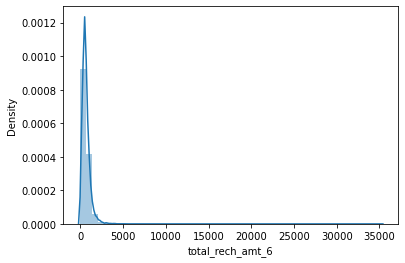

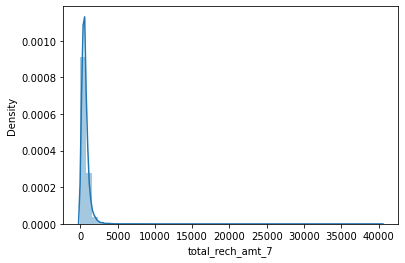

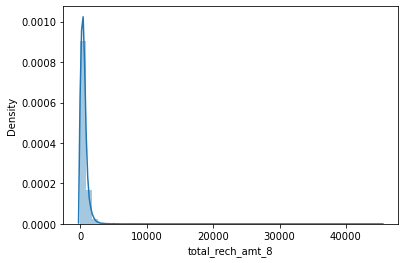

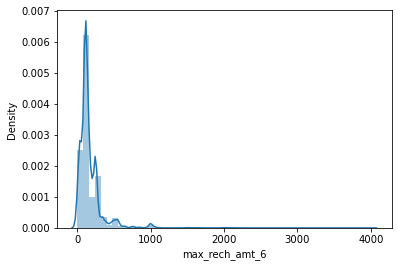

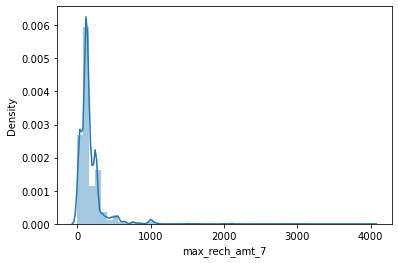

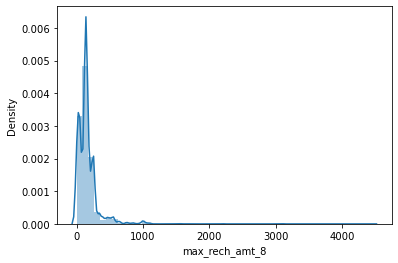

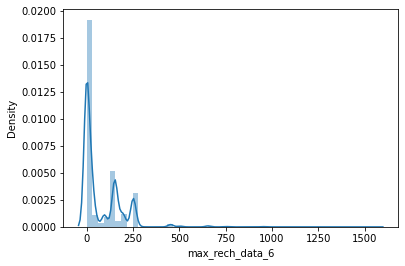

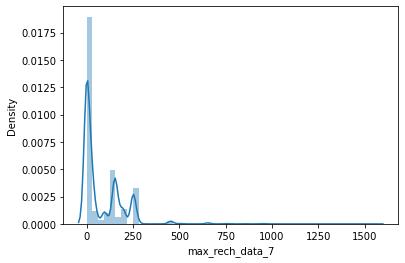

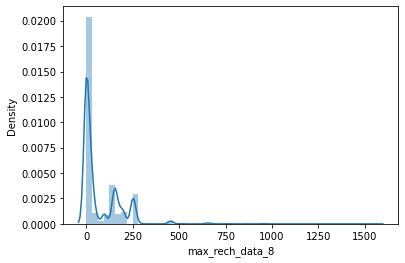

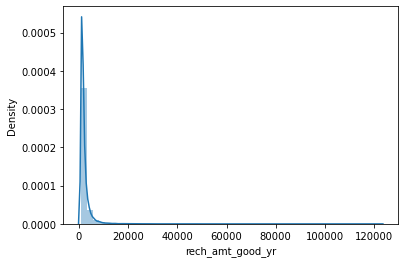

In [126]:
for cols in rech_call_data:
    sns.distplot(high_val[cols], label = cols)
    plt.show()

`Columns related to All kind of calls within the same operator network & outside the network for good & action phase`

In [127]:
onnet_offnet_data =  high_val.columns[high_val.columns.str.contains('onnet|offnet')]
onnet_offnet_data

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8'],
      dtype='object')

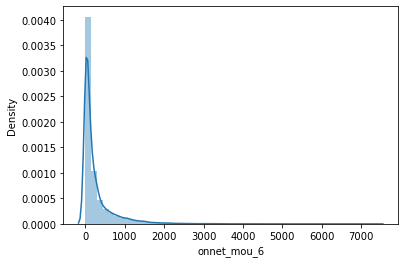

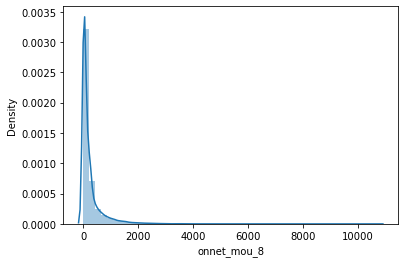

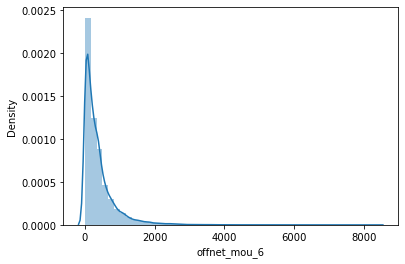

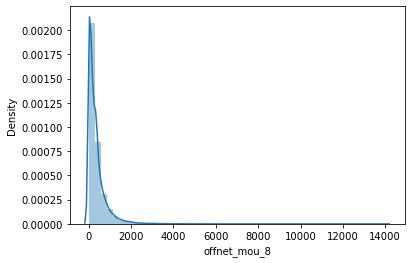

In [128]:
for cols in onnet_offnet_data:
    sns.distplot(high_val[cols], label = cols)
    plt.show()

`Columns related to total outgoing calls & roaming outgoing calls for good & action phase`

In [129]:
og_data =  high_val.columns[high_val.columns.str.contains('total_og|roam_og')]
og_data

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8'],
      dtype='object')

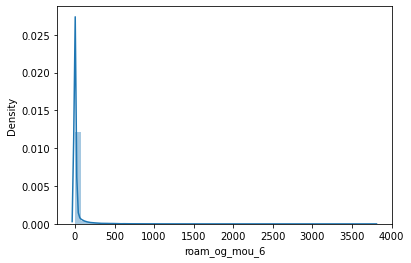

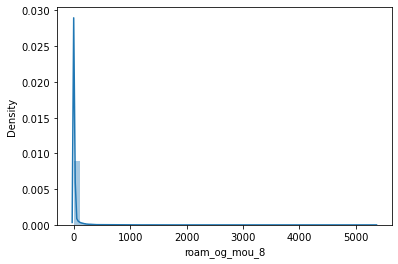

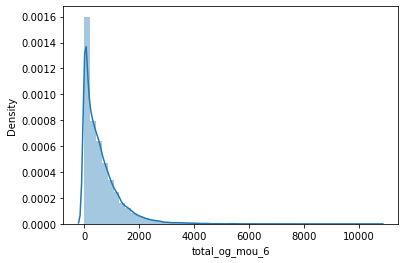

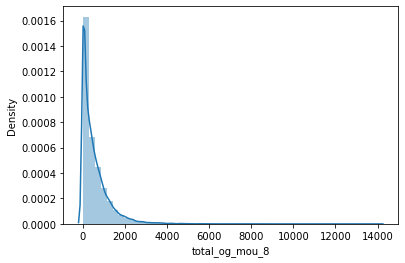

In [130]:
for cols in og_data:
    sns.distplot(high_val[cols], label = cols,kde_kws={'bw':0.1})
    plt.show()

`Columns related to total incoming calls & roaming outgoing calls for good & action phase`

In [131]:
ic_data =  high_val.columns[high_val.columns.str.contains('total_ic|roam_ic')]
ic_data

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8'],
      dtype='object')

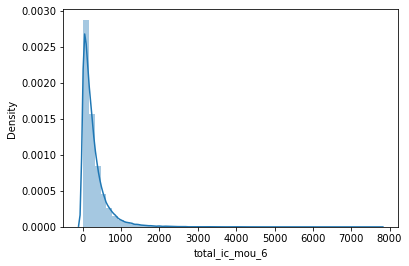

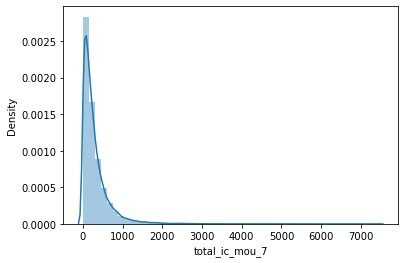

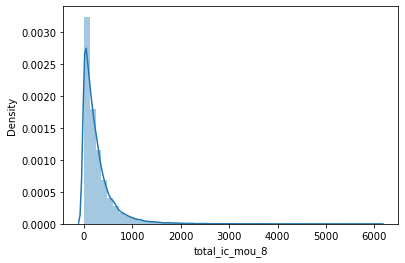

In [132]:
for cols in ic_data:
    sns.distplot(high_val[cols], label = cols, kde_kws={'bw':0.1})
    plt.show()

`Columns related to average revenue per user for good & action phase`

In [133]:
arpu_data =  high_val.columns[high_val.columns.str.contains('arpu')]
arpu_data

Index(['arpu_6', 'arpu_7', 'arpu_8'], dtype='object')

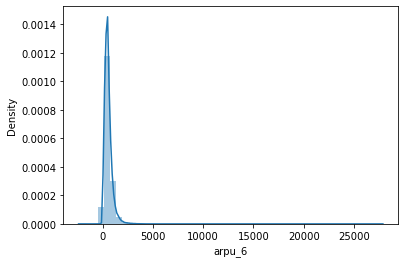

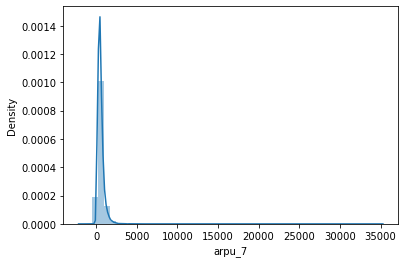

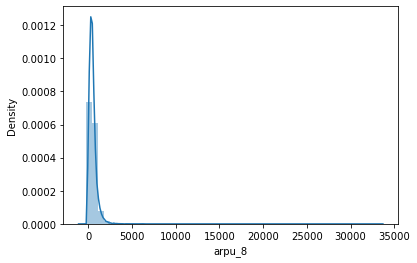

In [134]:
for cols in arpu_data:
    sns.distplot(high_val[cols], label = cols, kde_kws={'bw':0.1})
    plt.show()

<b id ='5'> c.) Observing Numerical columns - Outlier analysis

`Outliers in all types of outgoing calls in  all the months`

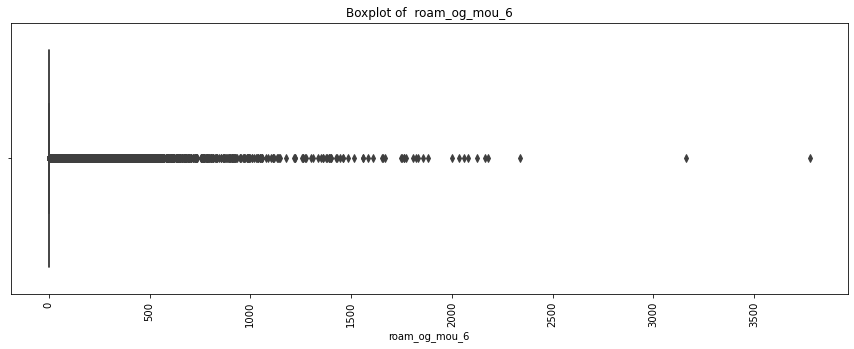

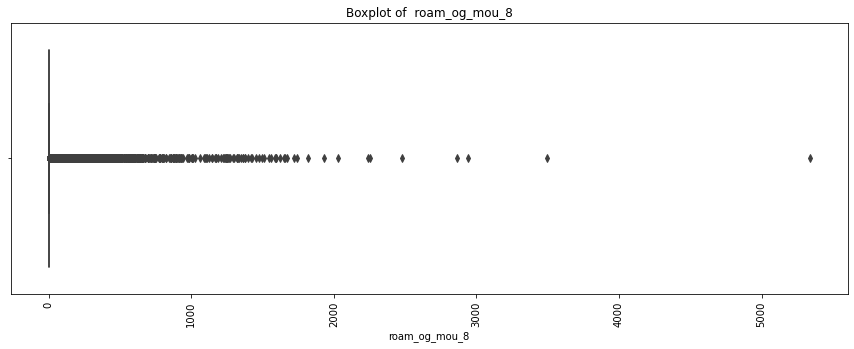

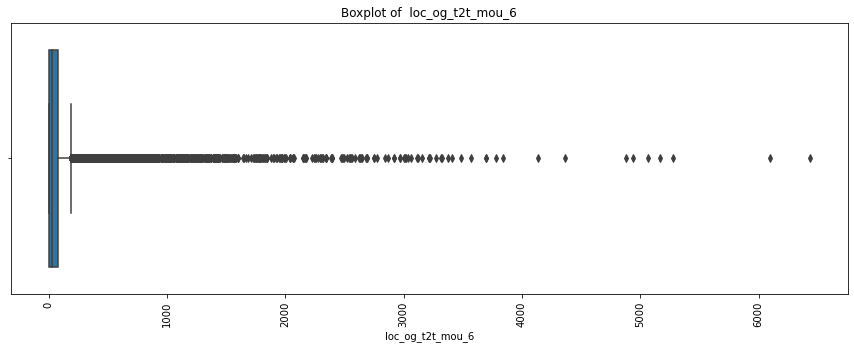

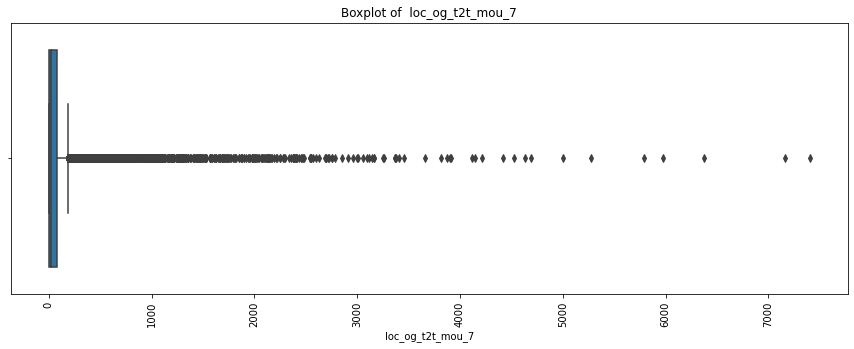

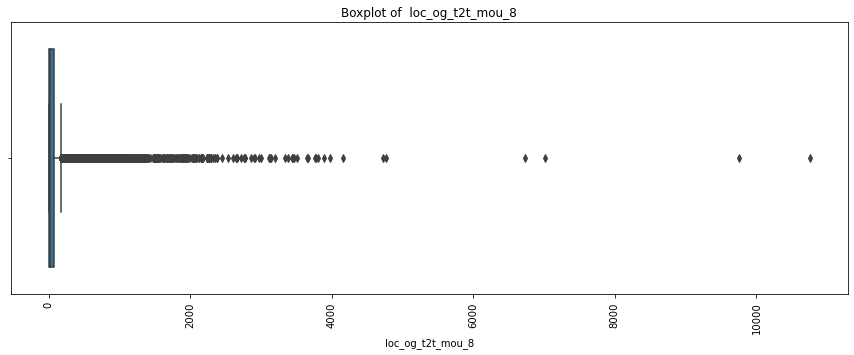

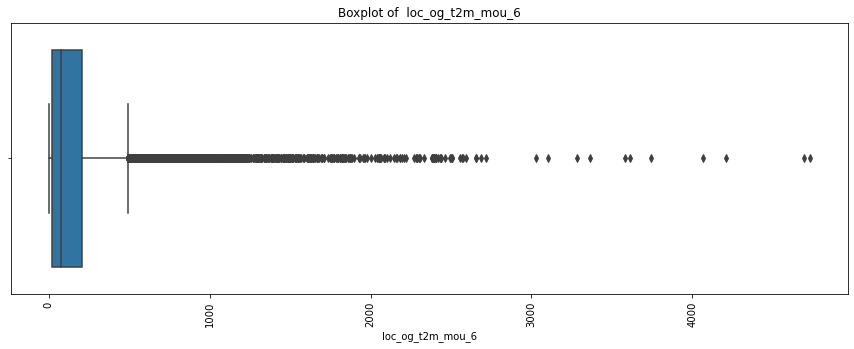

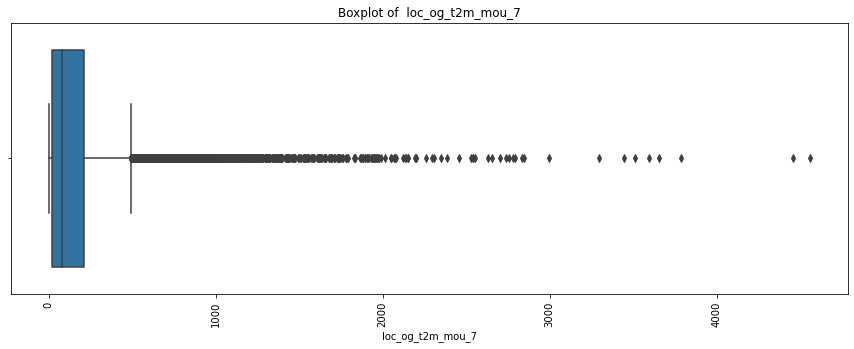

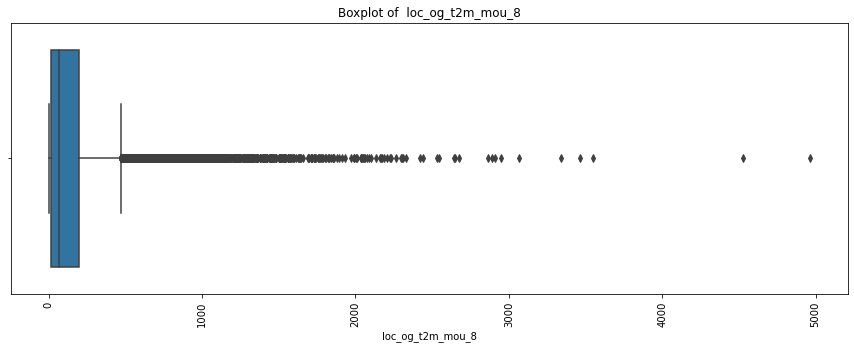

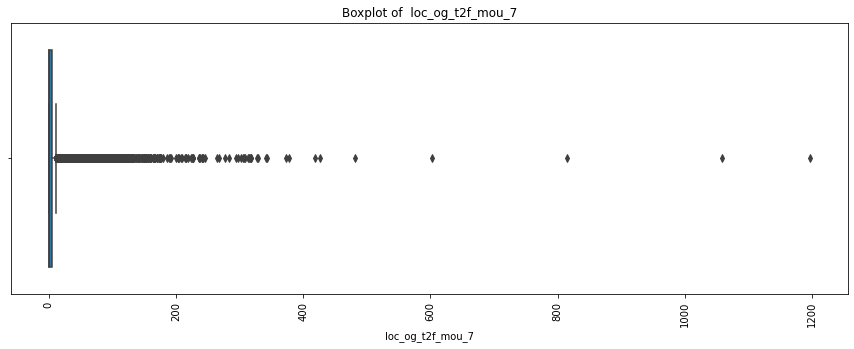

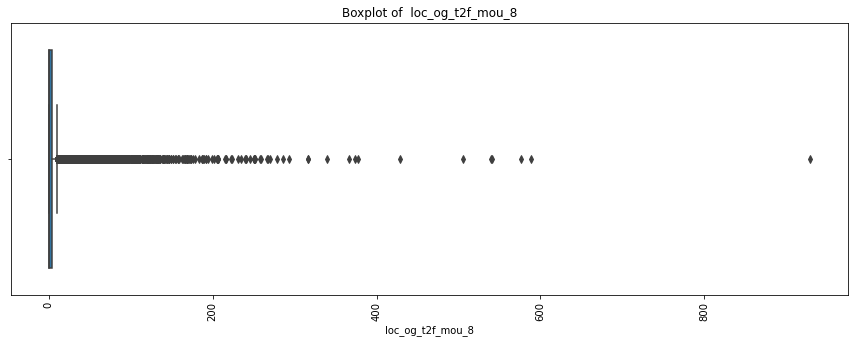

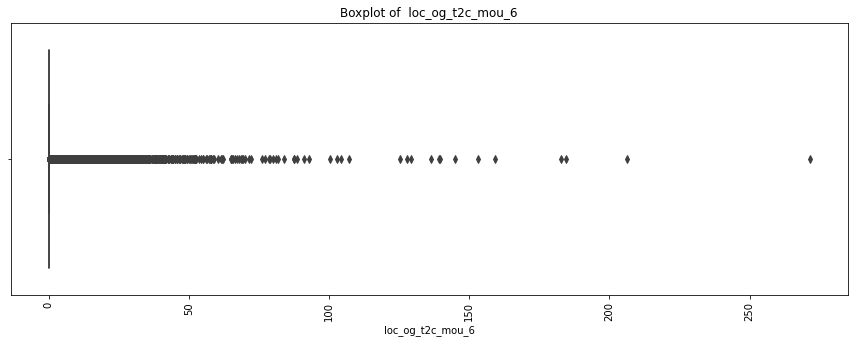

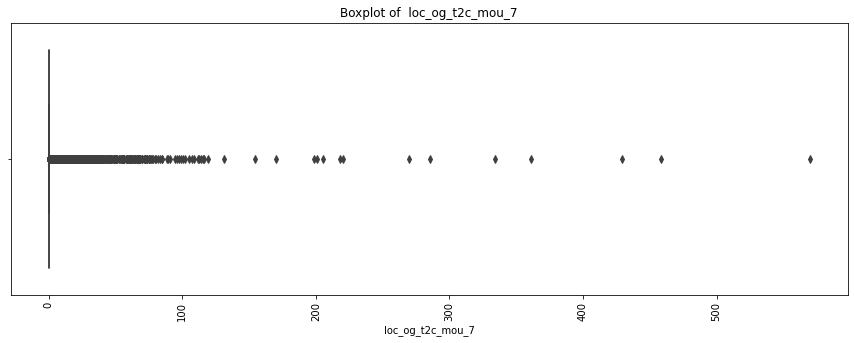

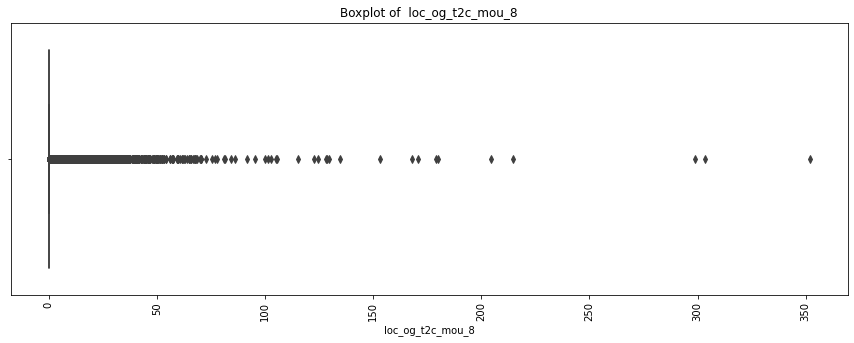

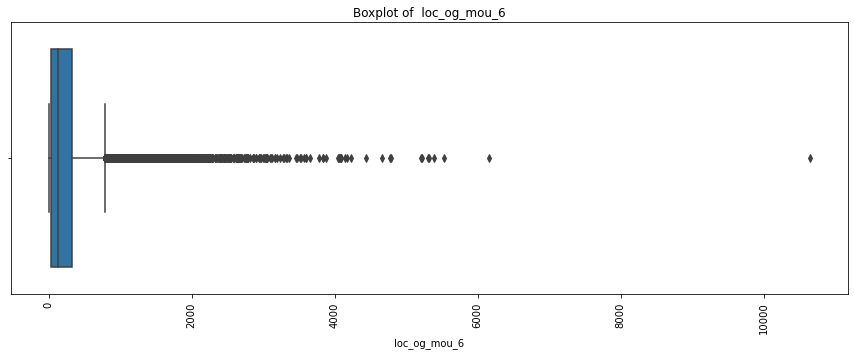

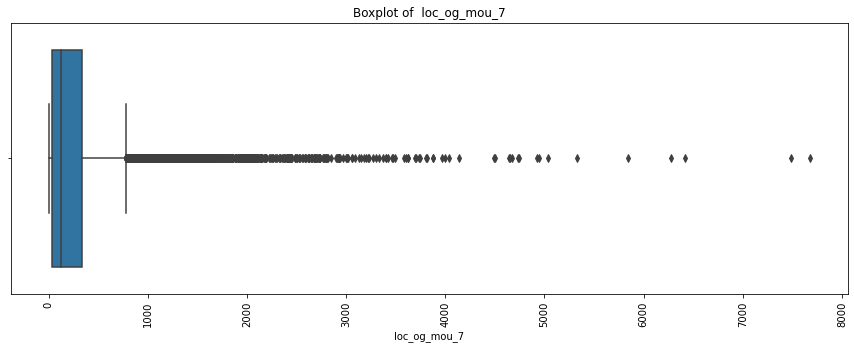

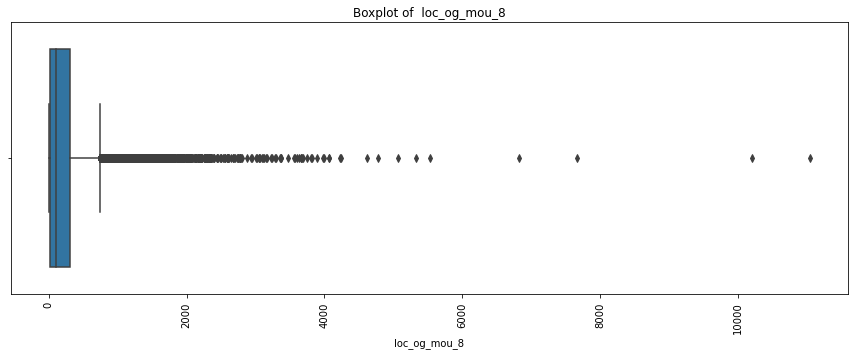

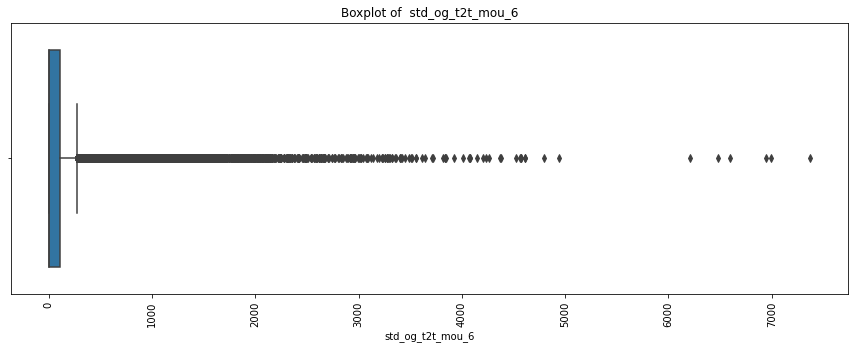

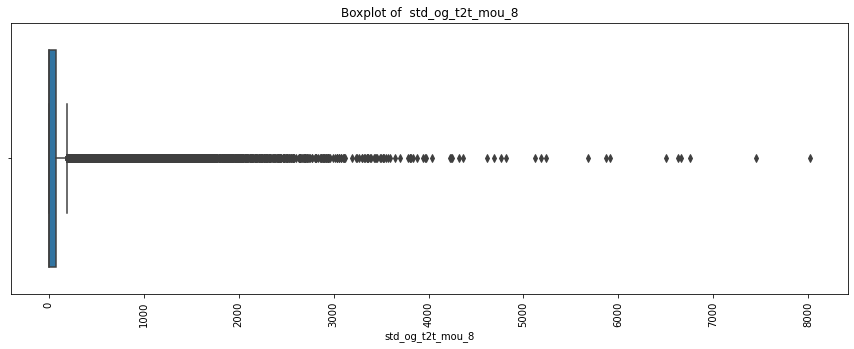

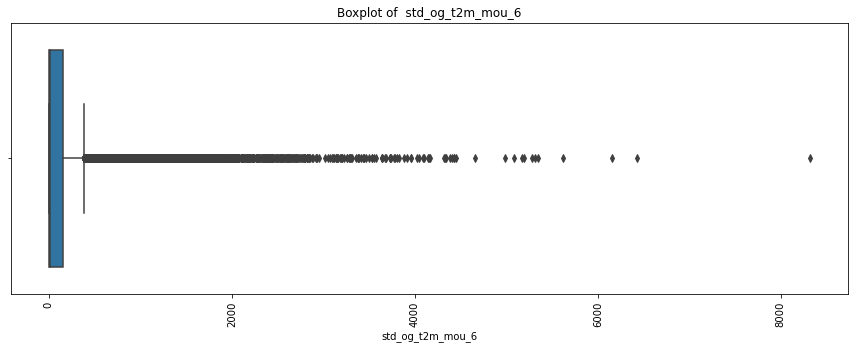

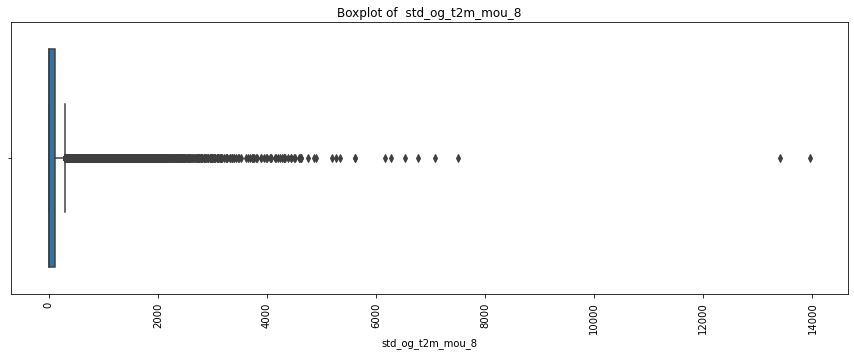

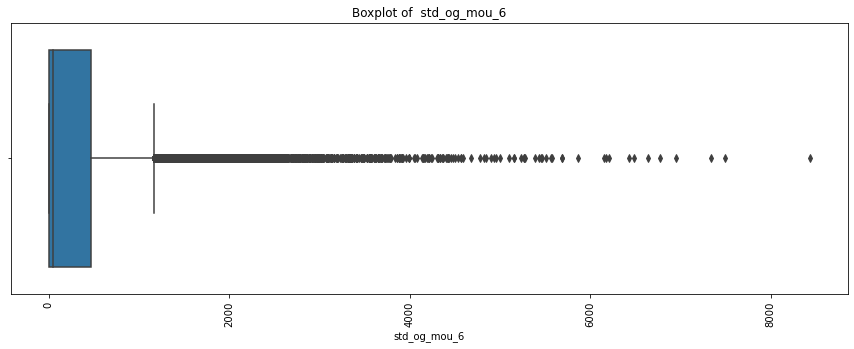

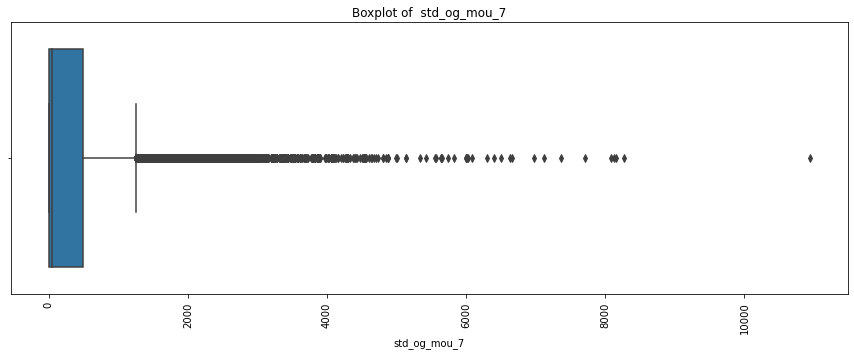

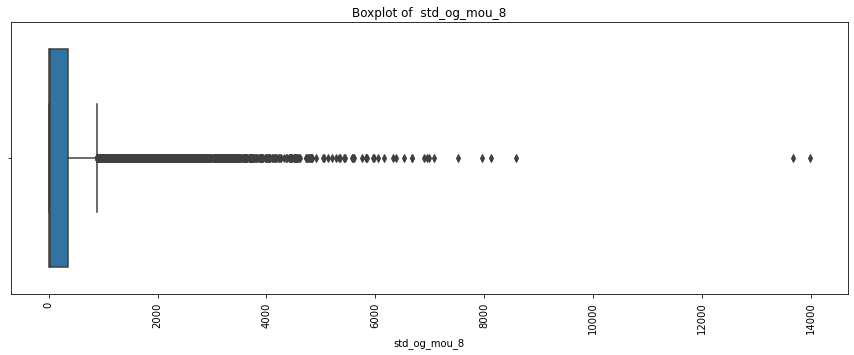

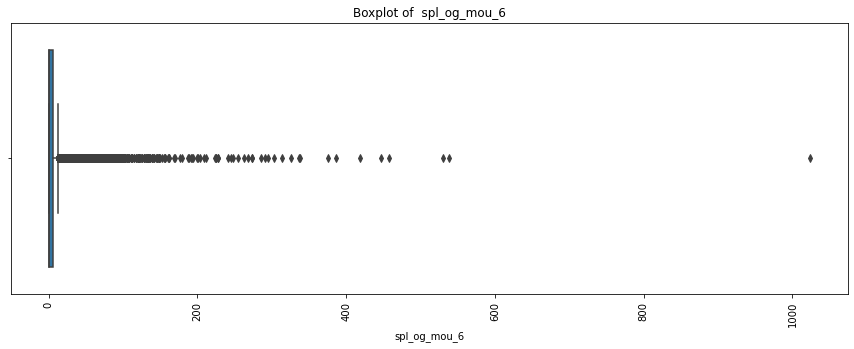

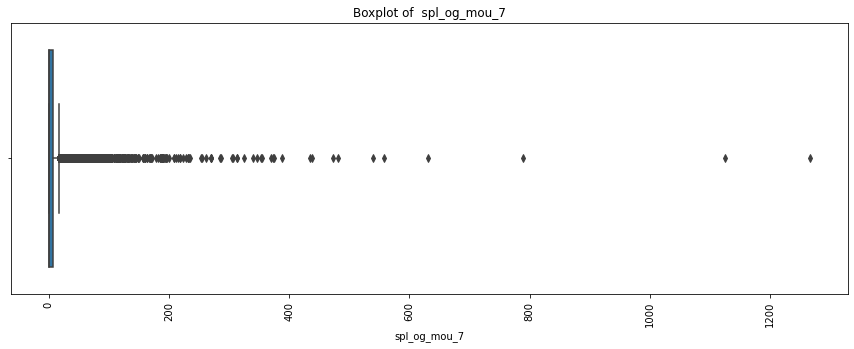

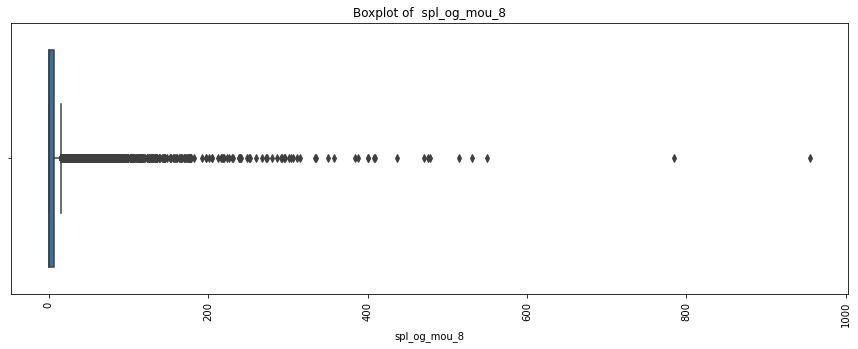

In [135]:
for i in high_val.columns[high_val.columns.str.contains("og")]:
    plt.figure(figsize =(15,5))
    sns.boxplot(high_val[i])
    plt.xticks(rotation = 90)
    plt.title('Boxplot of '+' '+ i)
    plt.xlabel(i)
    plt.show()      

`Outliers in all types of incoming calls in  all the months`

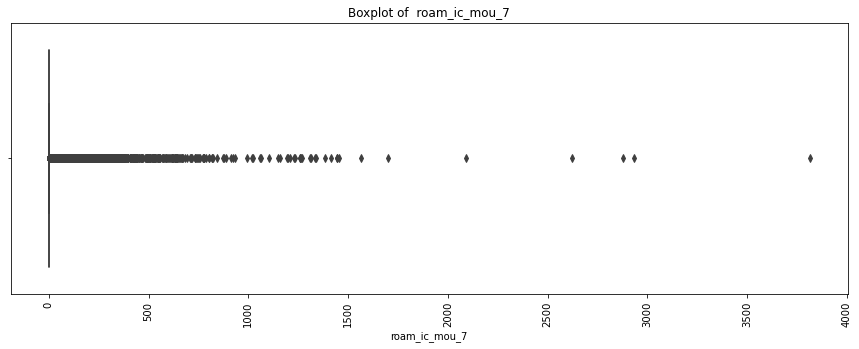

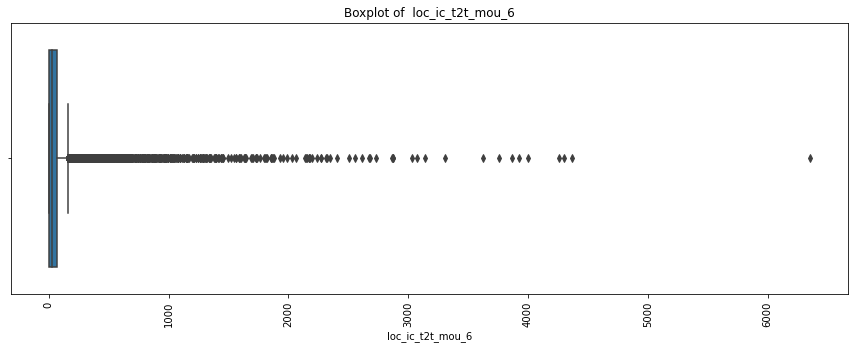

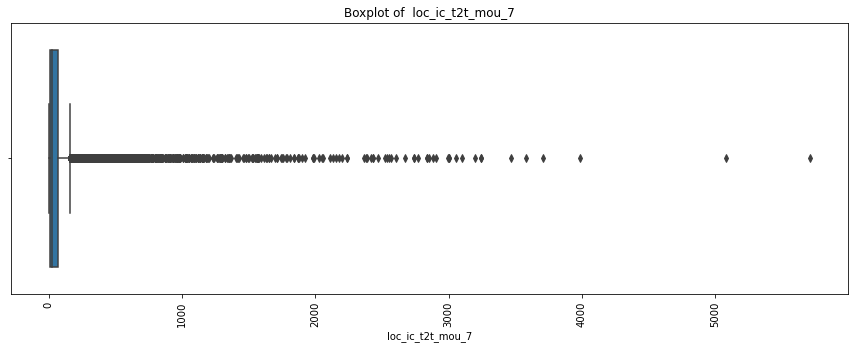

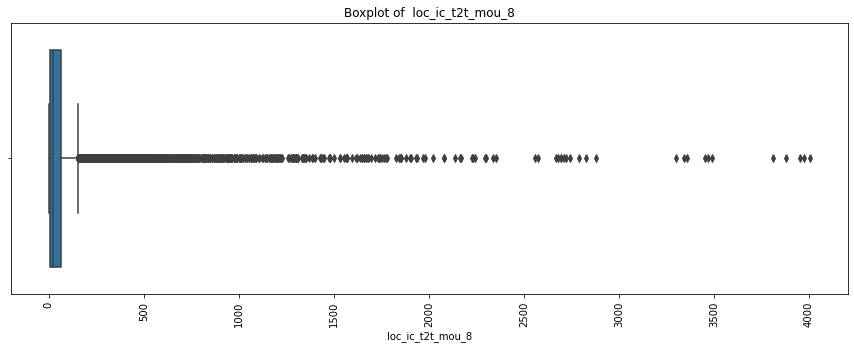

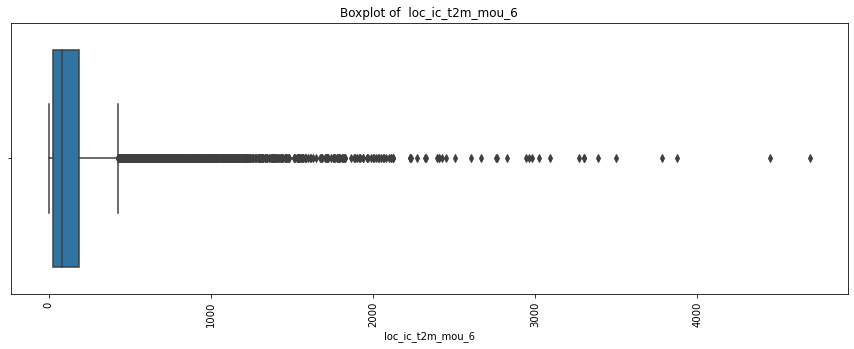

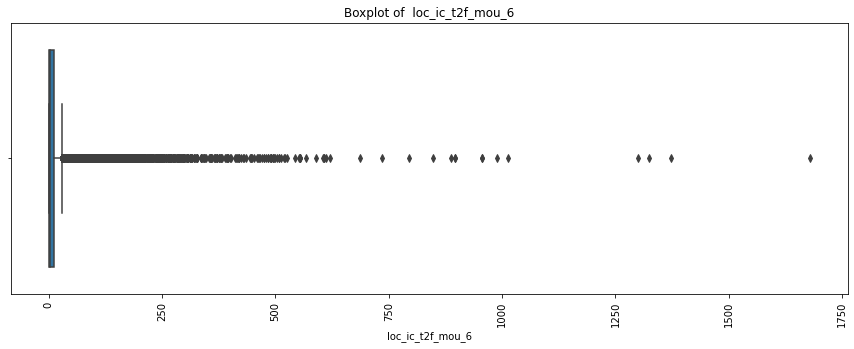

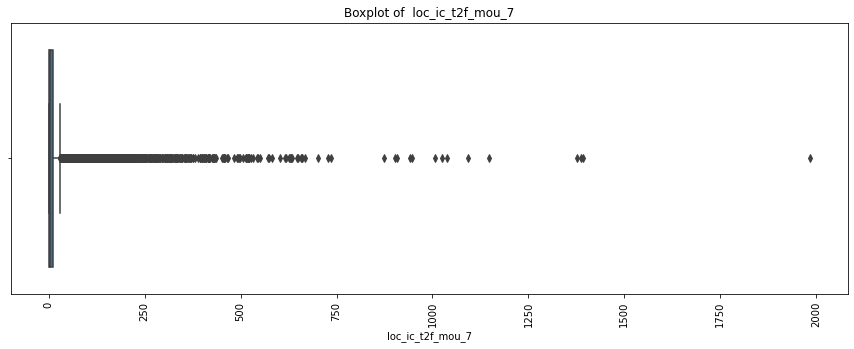

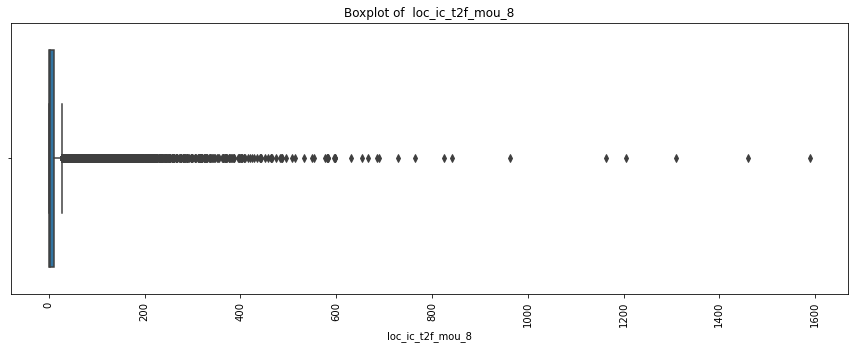

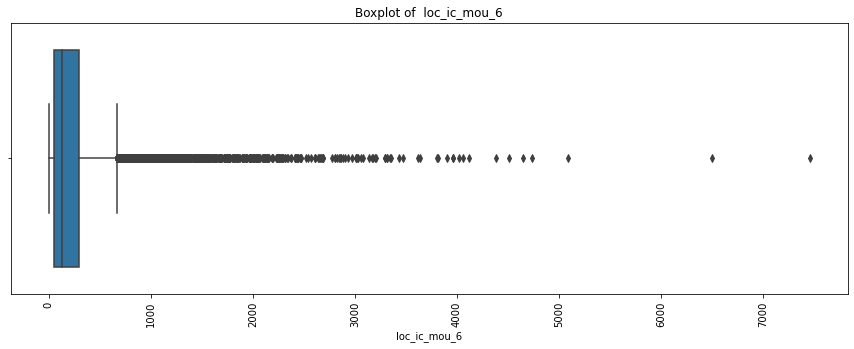

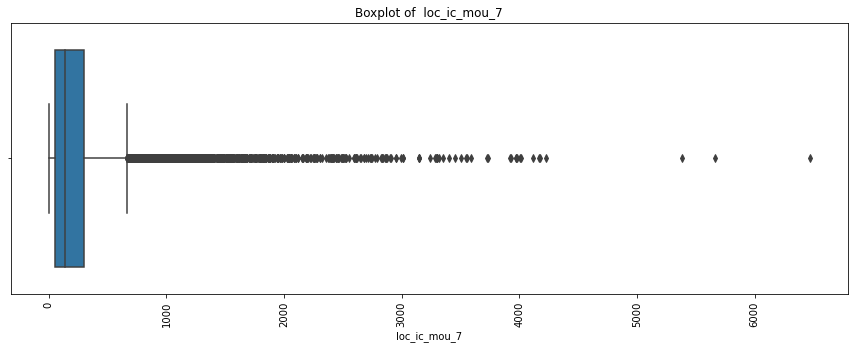

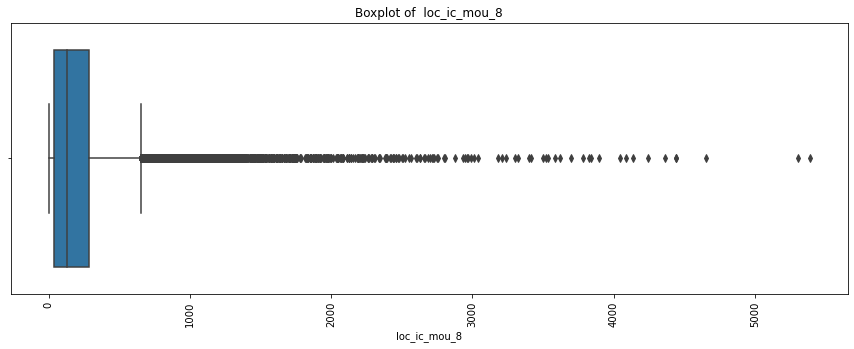

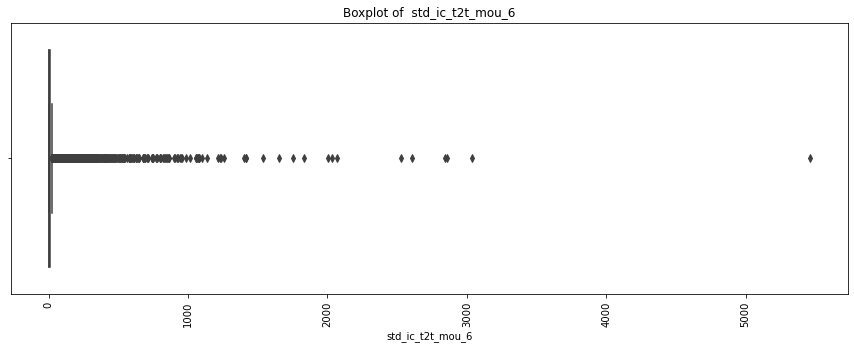

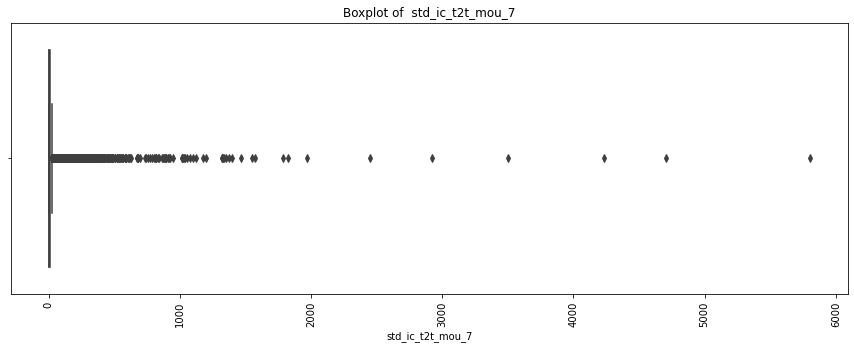

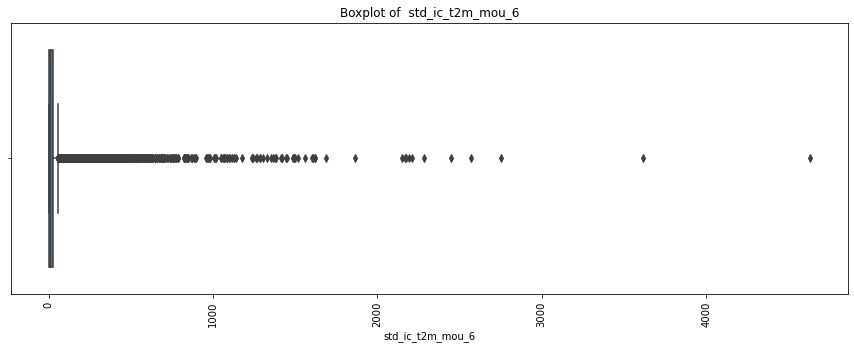

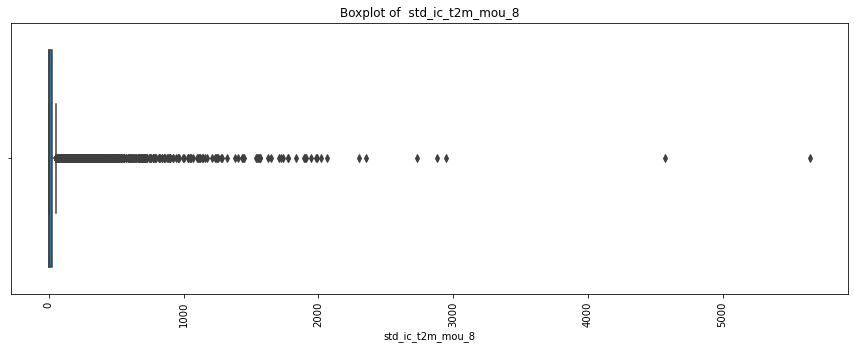

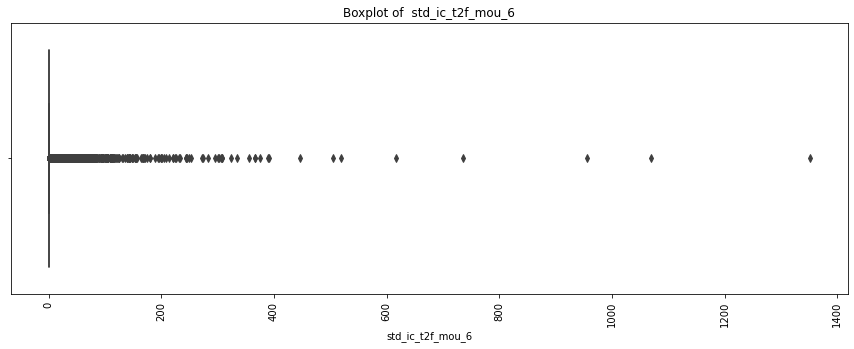

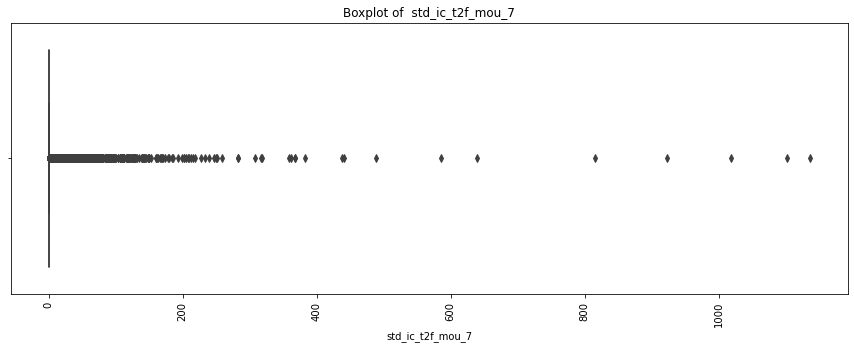

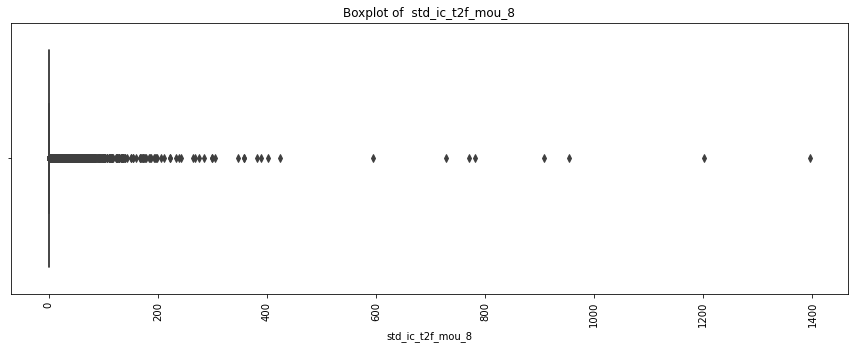

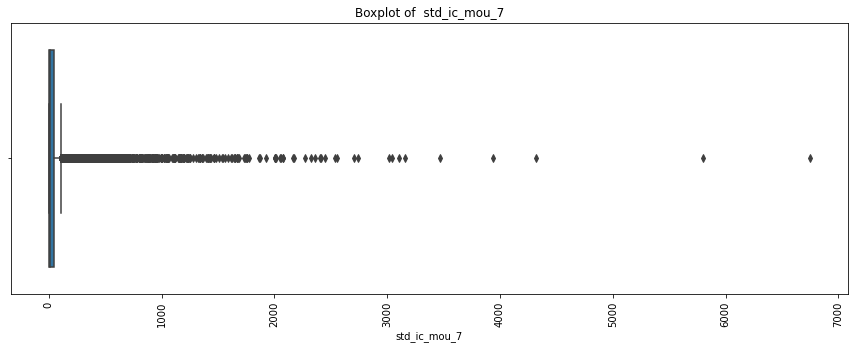

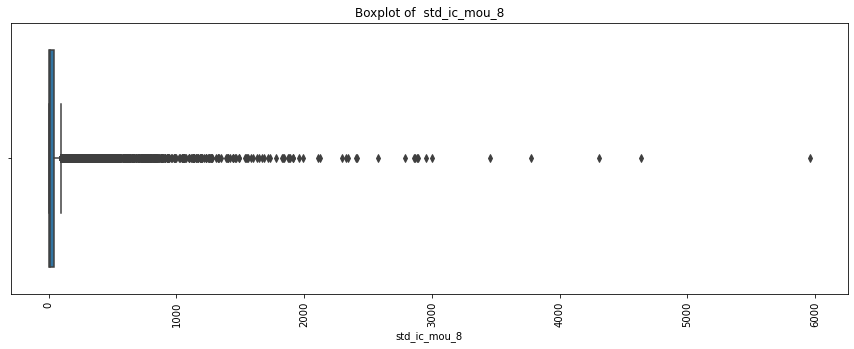

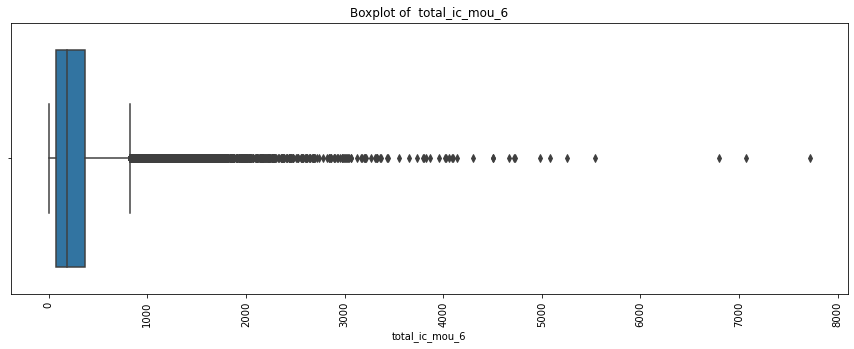

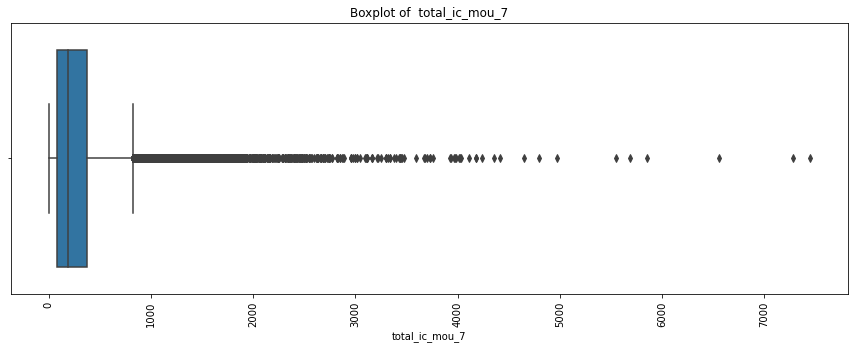

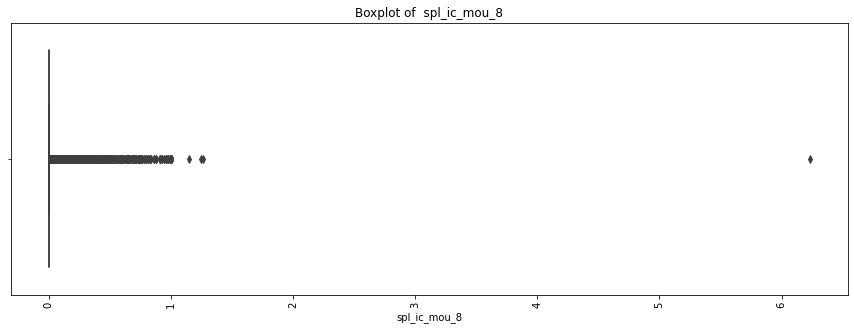

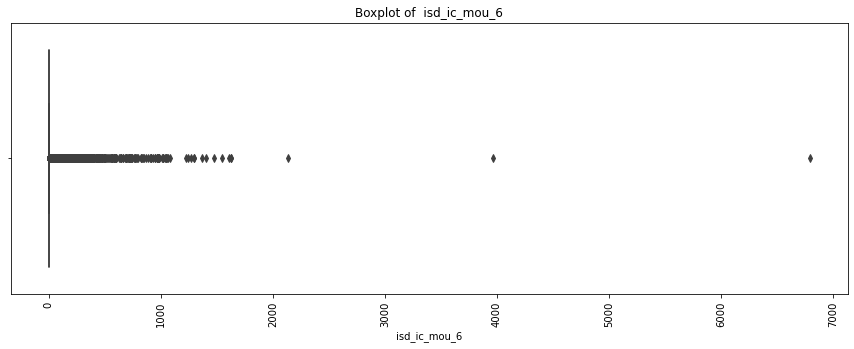

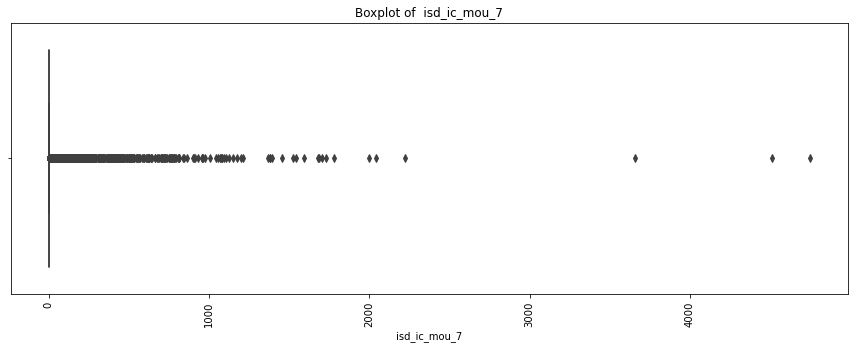

In [136]:
for i in high_val.columns[high_val.columns.str.contains("ic")]:
    plt.figure(figsize =(15,5))
    sns.boxplot(high_val[i])
    plt.xticks(rotation = 90)
    plt.title('Boxplot of '+' '+ i)
    plt.xlabel(i)
    plt.show()      

`Outliers in monthly data recharges done in all the months`

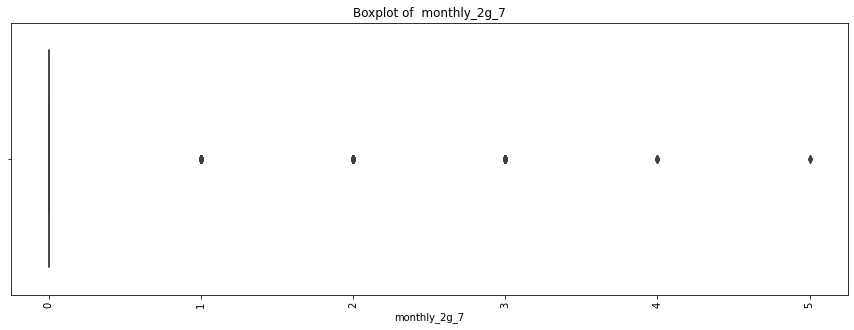

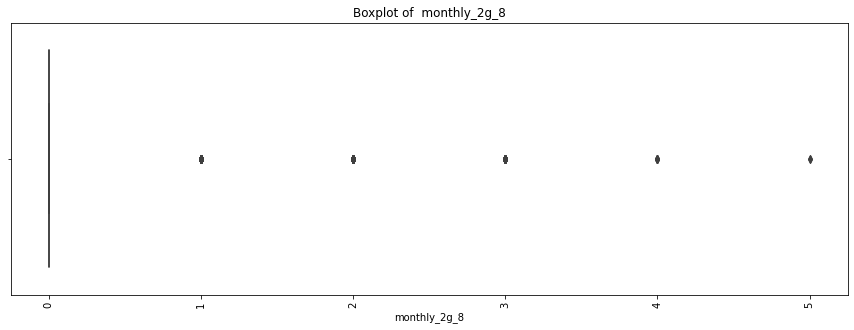

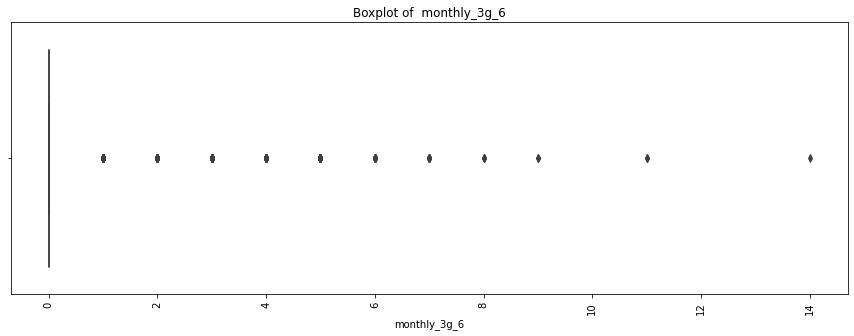

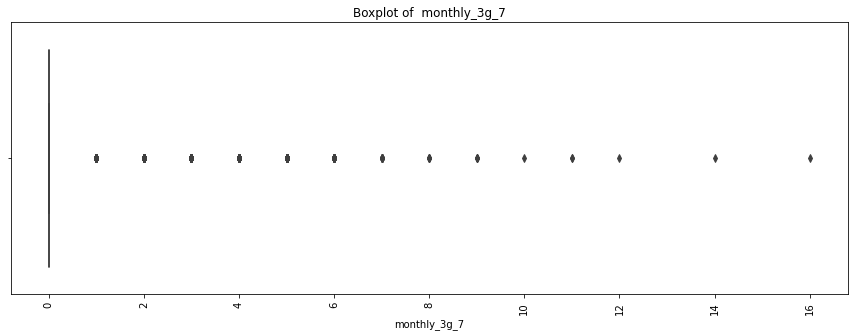

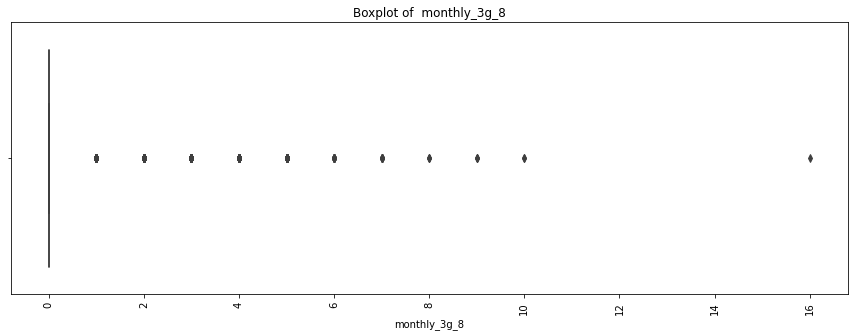

In [137]:
for i in high_val.columns[high_val.columns.str.contains("monthly")]:
        plt.figure(figsize =(15,5))
        sns.boxplot(high_val[i].astype('int'))
        plt.xticks(rotation = 90)
        plt.title('Boxplot of '+' '+ i)
        plt.xlabel(i)
        plt.show()   

`Outliers in sachet recharges done in all the months`

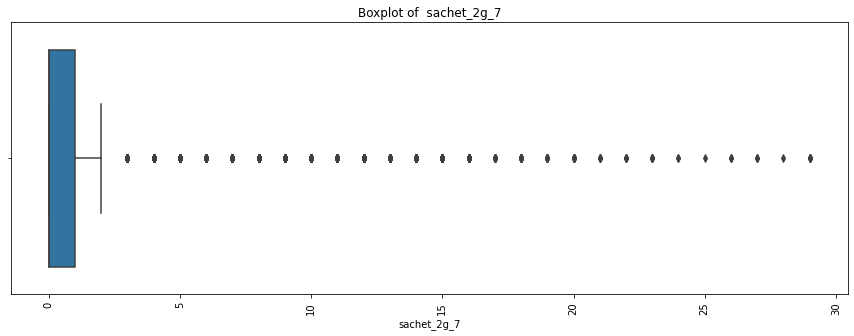

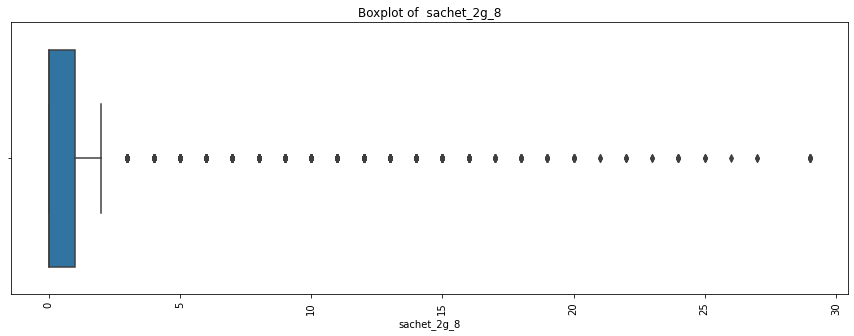

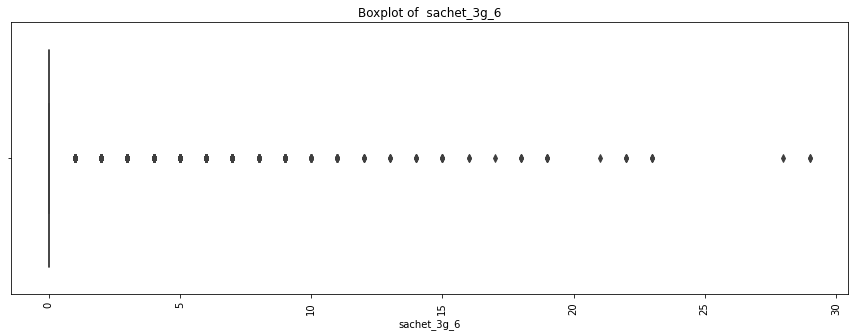

In [138]:
for i in high_val.columns[high_val.columns.str.contains("sachet")]:
        plt.figure(figsize =(15,5))
        sns.boxplot(high_val[i].astype('int'))
        plt.xticks(rotation = 90)
        plt.title('Boxplot of '+' '+ i)
        plt.xlabel(i)
        plt.show()   

`Outliers in All kind of calls within the same operator network in all the months`

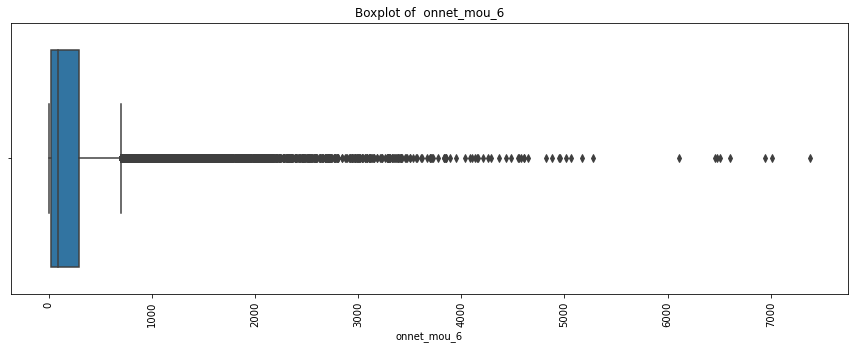

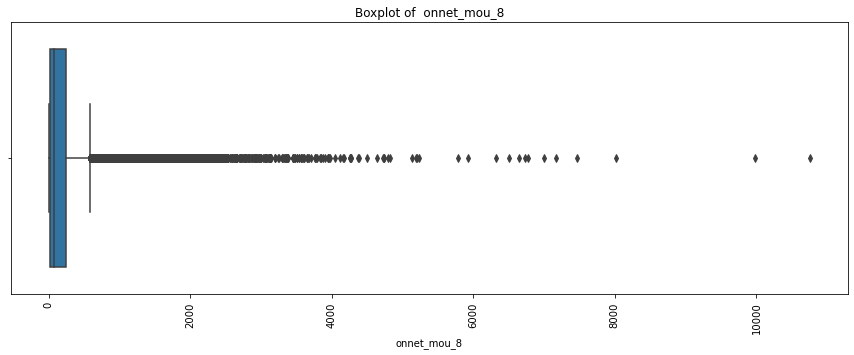

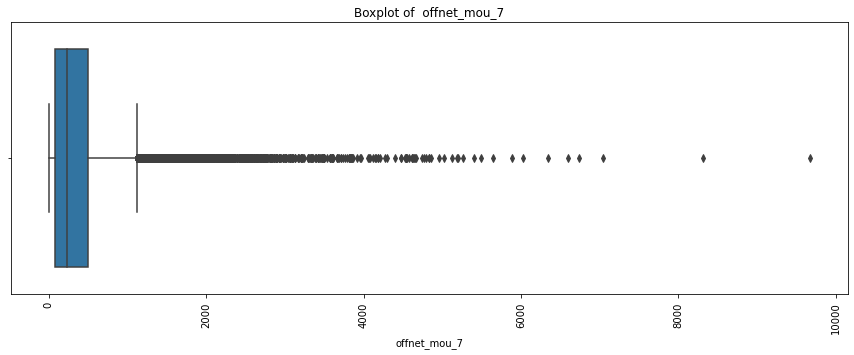

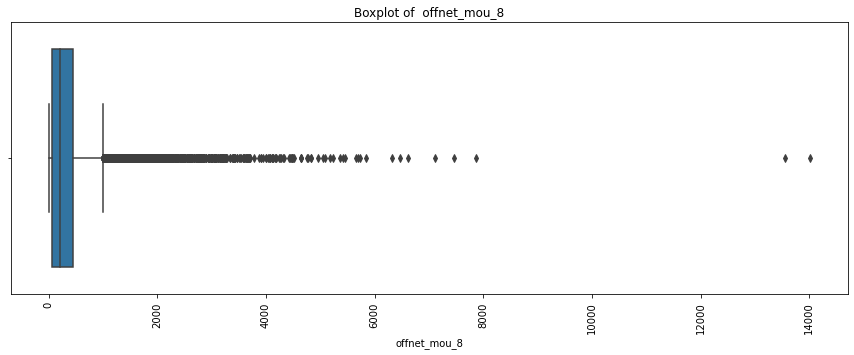

In [139]:
for i in high_val.columns[high_val.columns.str.contains("net")]:
        plt.figure(figsize =(15,5))
        sns.boxplot(high_val[i])
        plt.xticks(rotation = 90)
        plt.title('Boxplot of '+' '+ i)
        plt.xlabel(i)
        plt.show() 

`outliers in alll kind of calls outside the operator network`

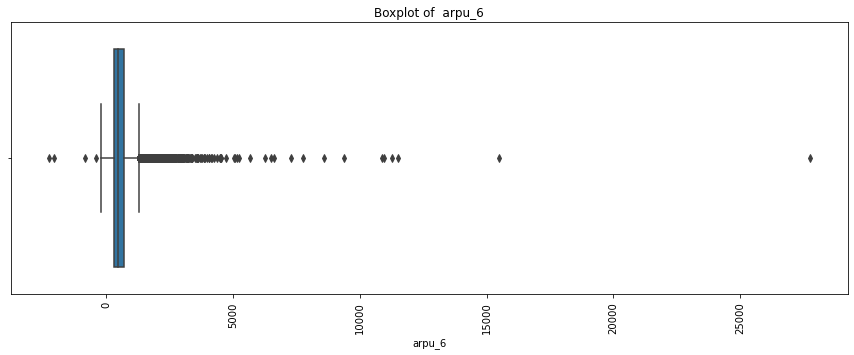

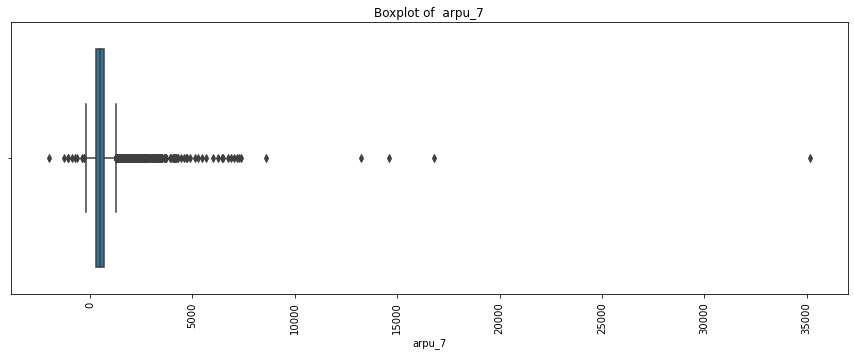

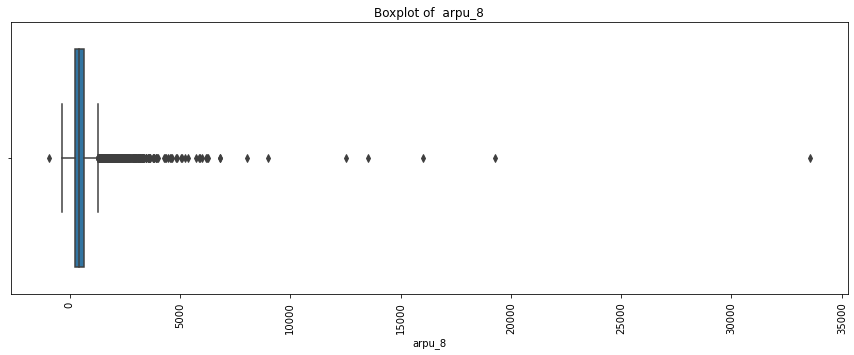

In [140]:
for i in high_val.columns[high_val.columns.str.contains("arpu")]:
        plt.figure(figsize =(15,5))
        sns.boxplot(high_val[i])
        plt.xticks(rotation = 90)
        plt.title('Boxplot of '+' '+ i)
        plt.xlabel(i)
        plt.show() 

<b id ='5'> d.) Observing categorical columns

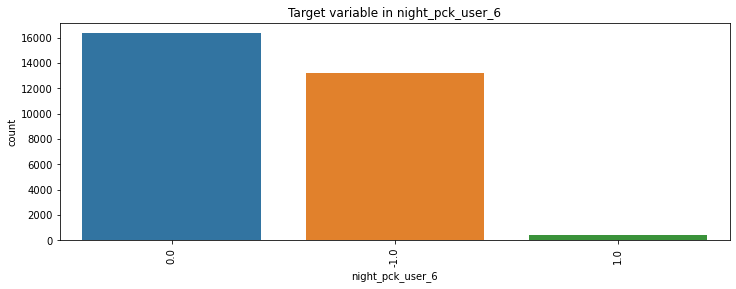

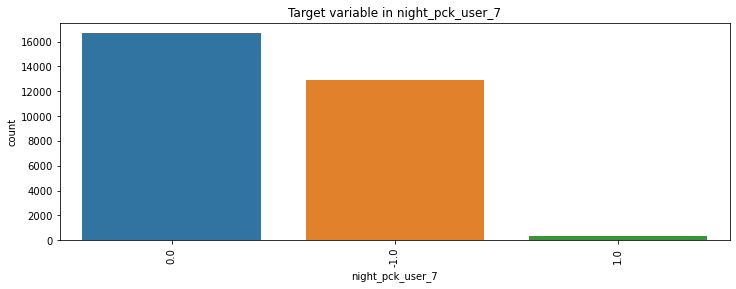

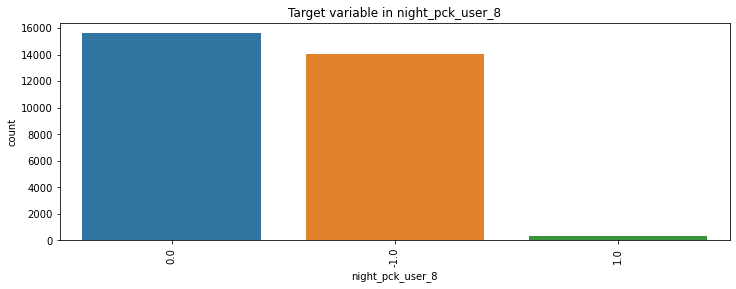

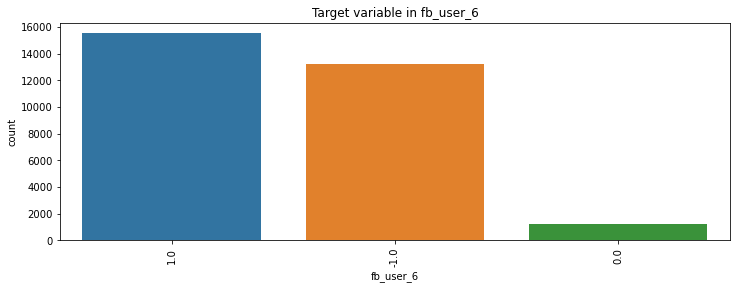

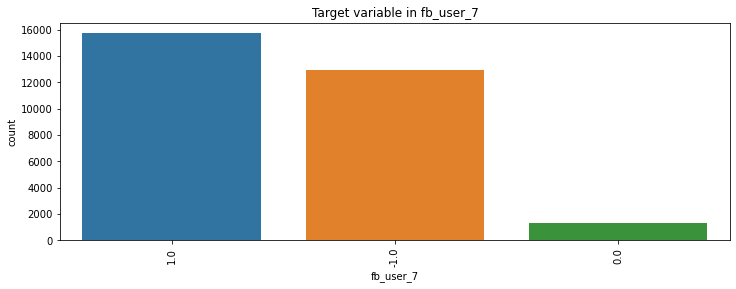

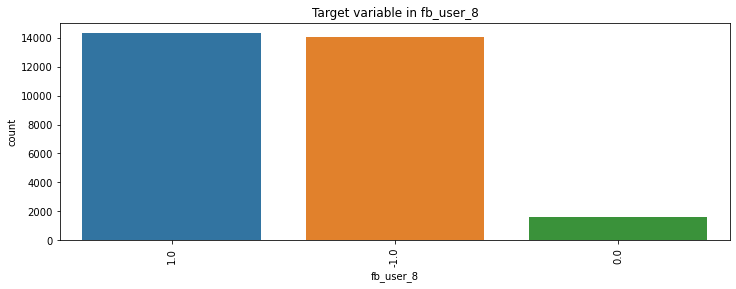

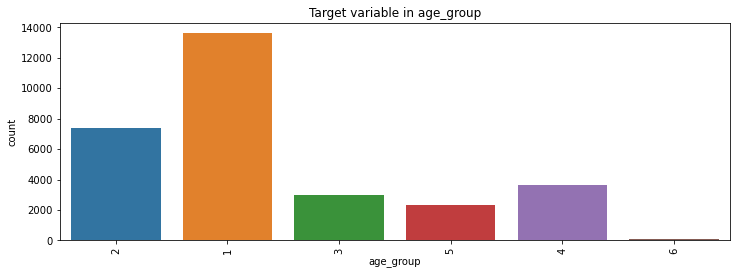

In [141]:
for i in cat_cols:
    if (i != 'churn')|(i != 'age_group'):
        plt.figure(figsize =(12,4))
        sns.countplot(high_val[i])
        plt.xticks(rotation = 90)
        plt.title('Target variable in'+' '+ i)
        plt.xlabel(i)
        plt.show()

<AxesSubplot:xlabel='age_group', ylabel='count'>

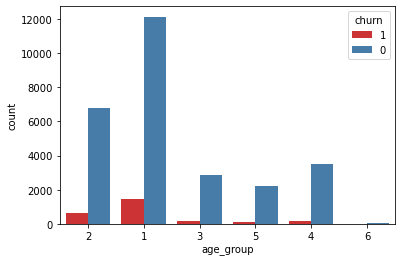

In [142]:
sns.countplot(high_val['age_group'], hue = high_val['churn'], palette="Set1")


## 8. Bivariate Analysis

In [143]:
def bivar_plot(var1, var2,fig):
    plt.figure(figsize = (20,15))
    plt.subplot(4,2, fig)
    if var1.dtype != 'object' and var2.dtype != 'object':
        sns.regplot(var1, var2)
    elif (var1.dtype == 'object' and var2.dtype != 'object') or (var1.dtype != 'object' and var2.dtype == 'object'):        
        sns.boxplot(var1, var2)

<b id ='5'> a.) Analyzing age of network with churn

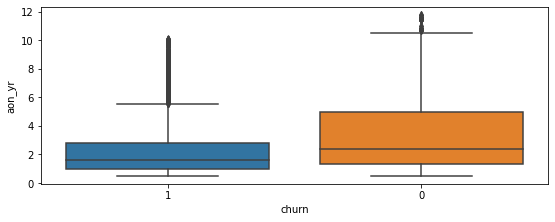

In [144]:
bivar_plot(high_val.churn, high_val.aon_yr,1)

- Average number of days cutomer using the network before churning is less than 1000.

<b id ='5'> b.) Analyzing onnet with churn

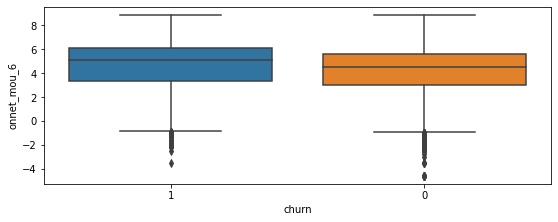

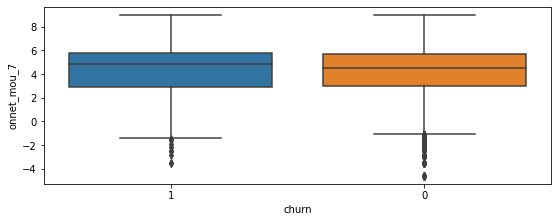

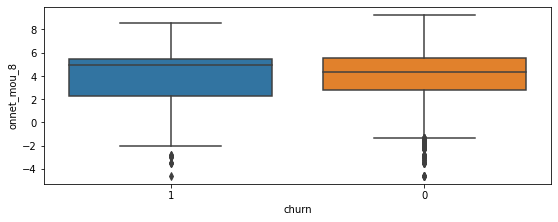

In [145]:
bivar_plot(high_val.churn, np.log(high_val.onnet_mou_6),1)
bivar_plot(high_val.churn, np.log(high_val.onnet_mou_7),2)
bivar_plot(high_val.churn, np.log(high_val.onnet_mou_8),3)

- People who have churned, used most of the calling in moth of June and July on same network, where as in month of August there calling is redcued and it is indicating that the customers are likely to churn

<b id ='5'> c.) Analyzing offnet with churn

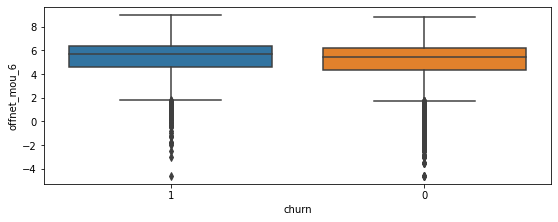

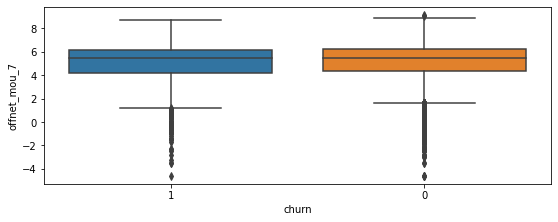

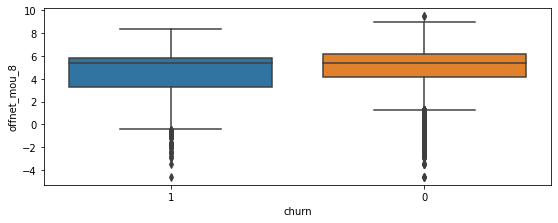

In [146]:
bivar_plot(high_val.churn, np.log(high_val.offnet_mou_6),1)
bivar_plot(high_val.churn, np.log(high_val.offnet_mou_7),2)
bivar_plot(high_val.churn, np.log(high_val.offnet_mou_8),3)

- People who have churned, used most of the calling in month of June and July on different network, where as in month of August there calling is redcued and it is indicating that the customers are likely to churn

<b id ='5'> d.) Analyzing night pack user with churn

In [147]:
pd.crosstab(high_val.churn, high_val.night_pck_user_8, normalize='columns')*100

night_pck_user_8      -1.0        0.0        1.0
churn                                           
0                 85.89123  97.117602  97.360704
1                 14.10877   2.882398   2.639296

<b id ='5'> e.) Analyzing Sachet with churn

In [148]:
pd.crosstab(high_val.churn, high_val.sachet_3g_8)

sachet_3g_8     0     1    2    3    4   5   6   7   8   9   10  11  12  13  \
churn                                                                         
0            24972  1609  399  184  106  86  43  35  28  19  15   8  11  10   
1             2369    48    5    8    4   2   1   0   2   0   0   0   0   1   

sachet_3g_8  14  15  16  17  18  19  20  21  23  25  27  29  
churn                                                        
0             6   6   2   2   3   1   3   3   2   1   1   5  
1             0   0   1   0   0   0   0   0   0   0   0   0

<b id ='5'> f.) Analyzing average revenue per user with churn

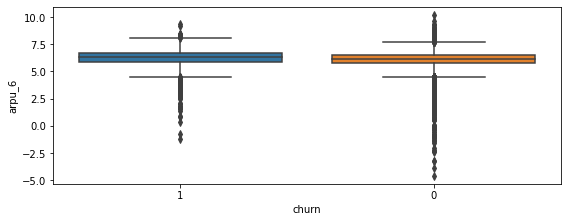

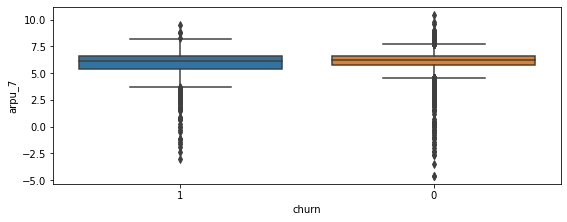

In [149]:
bivar_plot(high_val.churn, np.log(high_val.arpu_6),1)
bivar_plot(high_val.churn, np.log(high_val.arpu_7),2)
bivar_plot(high_val.churn, np.log(high_val.arpu_8),3)

<b id ='5'> g.) Analyzing total recharge amount with churn

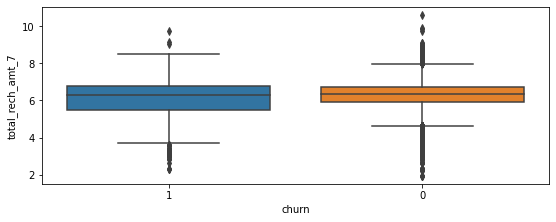

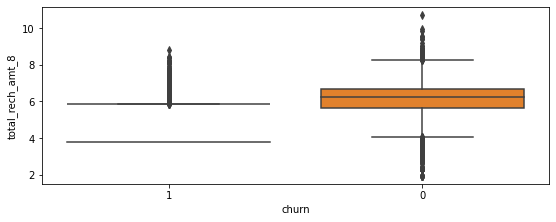

In [150]:
bivar_plot(high_val.churn, np.log(high_val.total_rech_amt_6),1)
bivar_plot(high_val.churn, np.log(high_val.total_rech_amt_7),2)
bivar_plot(high_val.churn, np.log(high_val.total_rech_amt_8),3)

<b id ='5'> h.) Analyzing total recharge number with churn

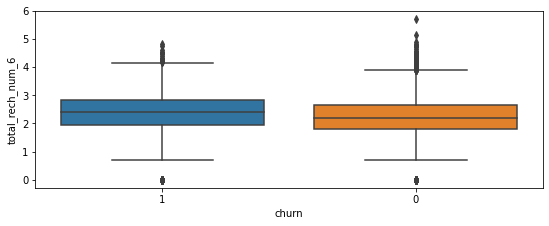

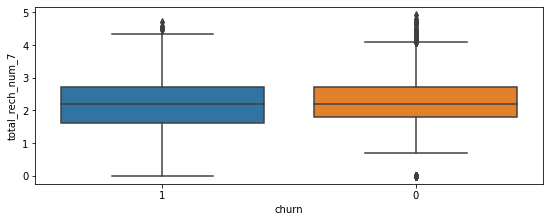

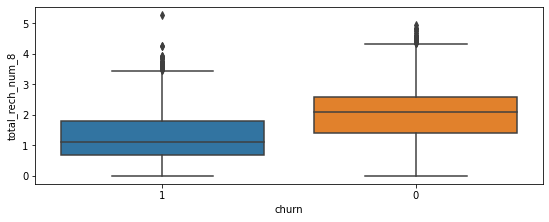

In [151]:
bivar_plot(high_val.churn, np.log(high_val.total_rech_num_6),1)
bivar_plot(high_val.churn, np.log(high_val.total_rech_num_7),2)
bivar_plot(high_val.churn, np.log(high_val.total_rech_num_8),3)

- ###  correlation among the features

In [152]:
# Observing the correlation among these numerical predictor variables

high_val.drop('cust_id',1).corr()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6              1.000000  0.671732  0.612617     0.336453     0.216297   
arpu_7              0.671732  1.000000  0.759858     0.210125     0.314603   
arpu_8              0.612617  0.759858  1.000000     0.149280     0.228424   
onnet_mou_6         0.336453  0.210125  0.149280     1.000000     0.750535   
onnet_mou_7         0.216297  0.314603  0.228424     0.750535     1.000000   
onnet_mou_8         0.189710  0.262084  0.331881     0.623105     0.804010   
offnet_mou_6        0.502537  0.350785  0.276727     0.083203     0.049474   
offnet_mou_7        0.340520  0.483054  0.371073     0.032950     0.078086   
offnet_mou_8        0.290549  0.386365  0.505853     0.034183     0.066898   
roam_ic_mou_6       0.124335  0.091754  0.086975     0.022377     0.037157   
roam_ic_mou_7       0.083370  0.091589  0.075949     0.023556     0.006746   
roam_ic_mou_8       0.091041  0.090830  0.105093     0.043497     0.034671   
roam_og_mou_6       0.193363  0.132734  0.127239     0.075156     0.080366   
roam_og_mou_7       0.143148  0.177293  0.139240     0.074523     0.066691   
roam_og_mou_8       0.125789  0.148744  0.192720     0.072297     0.081077   
loc_og_t2t_mou_6    0.167352  0.106674  0.101287     0.454450     0.343627   
loc_og_t2t_mou_7    0.127683  0.157926  0.133167     0.354099     0.461701   
loc_og_t2t_mou_8    0.123732  0.135348  0.178831     0.310080     0.378938   
loc_og_t2m_mou_6    0.332207  0.215457  0.212069     0.024019    -0.010594   
loc_og_t2m_mou_7    0.245092  0.303201  0.266836    -0.004824     0.008165   
loc_og_t2m_mou_8    0.218150  0.256019  0.352747    -0.011048    -0.000592   
loc_og_t2f_mou_6    0.139434  0.112066  0.120814    -0.032966    -0.039351   
loc_og_t2f_mou_7    0.114368  0.140968  0.135244    -0.040423    -0.036490   
loc_og_t2f_mou_8    0.104302  0.121890  0.160204    -0.041382    -0.037433   
loc_og_t2c_mou_6    0.047680  0.009198  0.002303     0.051830     0.035104   
loc_og_t2c_mou_7    0.010017  0.040485  0.021742     0.030402     0.046920   
loc_og_t2c_mou_8    0.011393  0.032706  0.057143     0.040958     0.058040   
loc_og_mou_6        0.328978  0.213501  0.208515     0.288772     0.198498   
loc_og_mou_7        0.246204  0.304529  0.264931     0.221399     0.298928   
loc_og_mou_8        0.223301  0.255867  0.347333     0.184702     0.234725   
std_og_t2t_mou_6    0.274093  0.166621  0.102718     0.857655     0.639333   
std_og_t2t_mou_7    0.161528  0.260775  0.178728     0.637088     0.858568   
std_og_t2t_mou_8    0.133795  0.219911  0.279686     0.521549     0.692557   
std_og_t2m_mou_6    0.301575  0.203737  0.121118     0.081704     0.062521   
std_og_t2m_mou_7    0.181414  0.307786  0.207492     0.041860     0.084440   
std_og_t2m_mou_8    0.139780  0.239066  0.324865     0.042006     0.079856   
std_og_t2f_mou_6    0.066751  0.051743  0.055607    -0.022823    -0.026040   
std_og_t2f_mou_7    0.053564  0.070678  0.068161    -0.024873    -0.020243   
std_og_t2f_mou_8    0.043895  0.053822  0.071213    -0.026683    -0.024646   
std_og_mou_6        0.385851  0.248495  0.150647     0.623524     0.465711   
std_og_mou_7        0.230380  0.381714  0.259674     0.447273     0.622030   
std_og_mou_8        0.182037  0.305135  0.402110     0.368230     0.505334   
spl_og_mou_6        0.122743  0.067268  0.099936     0.095740     0.059969   
spl_og_mou_7        0.068491  0.114977  0.125051     0.077229     0.107420   
spl_og_mou_8        0.044582  0.070283  0.108328     0.081763     0.107534   
total_og_mou_6      0.554510  0.365323  0.275700     0.709173     0.519785   
total_og_mou_7      0.363276  0.535818  0.401973     0.516228     0.713696   
total_og_mou_8      0.301856  0.429002  0.562003     0.417416     0.563432   
loc_ic_t2t_mou_6    0.082855  0.045888  0.048927     0.087803     0.048353   
loc_ic_t2t_mou_7    0.062961  0.076559  0.071700     0.078901     0.083225   
loc_ic_t2t_mou_8    0.062838  0.074023  0.10

<a> We observe high correlations among many variables. Among these variables, let us see which variables have high correlation and which have least correlation.

In [153]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(high_val.drop('cust_id',1).corr().transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.997 , min negative corr:  -0.655


- ## 9. Outlier analysis

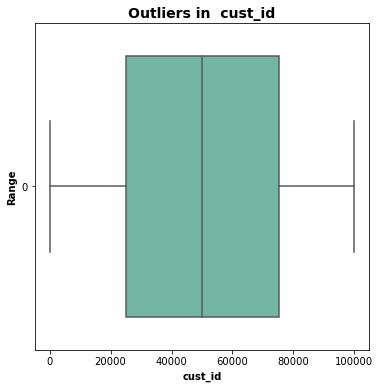

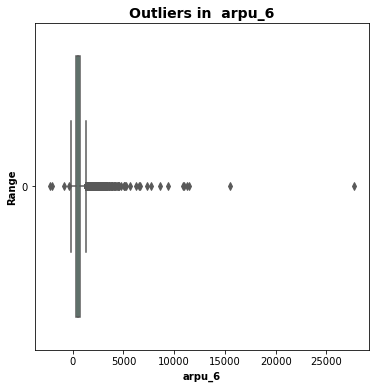

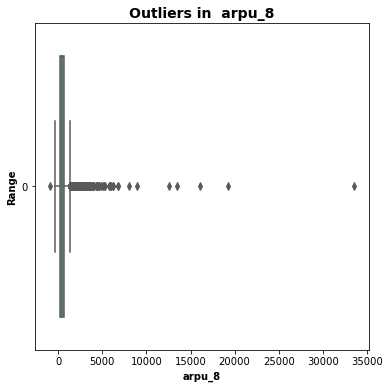

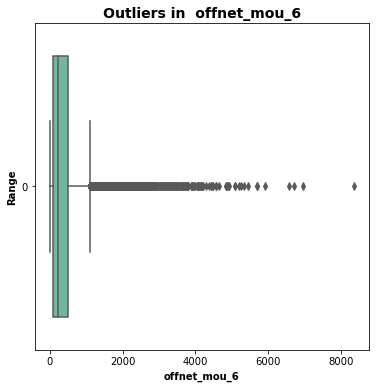

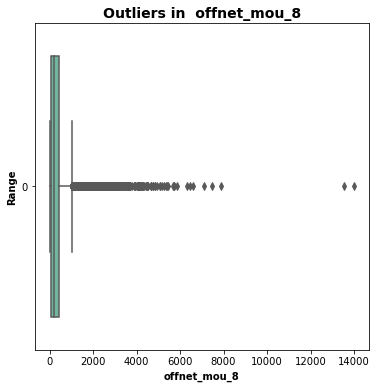

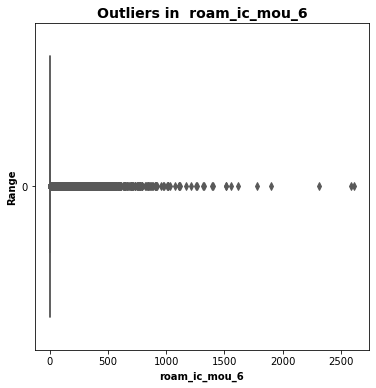

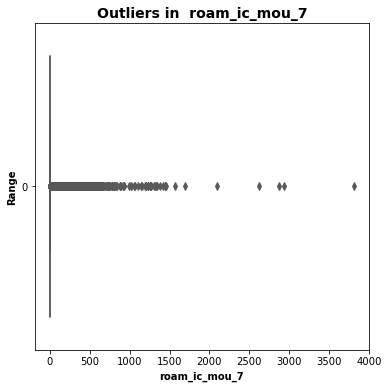

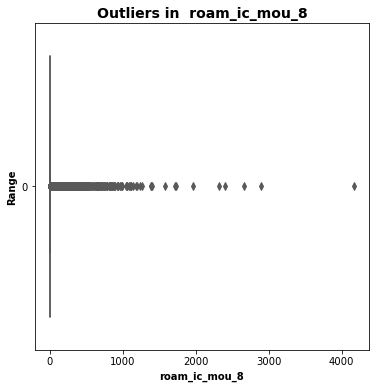

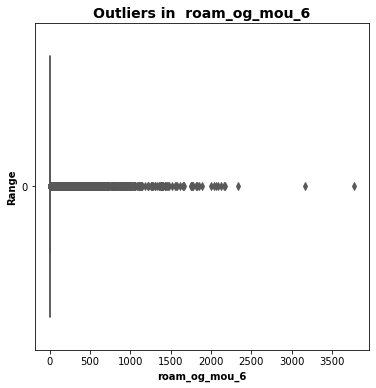

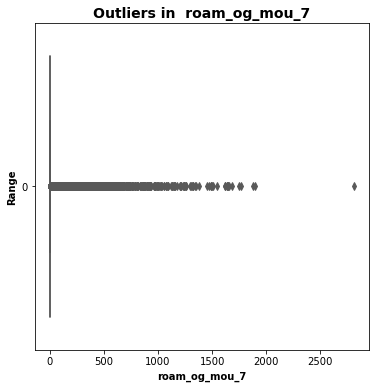

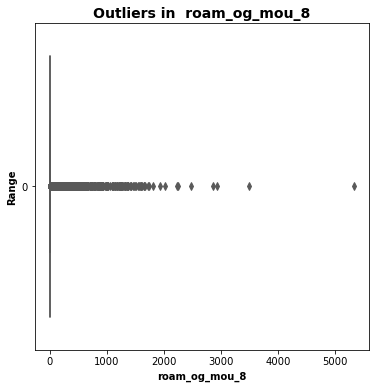

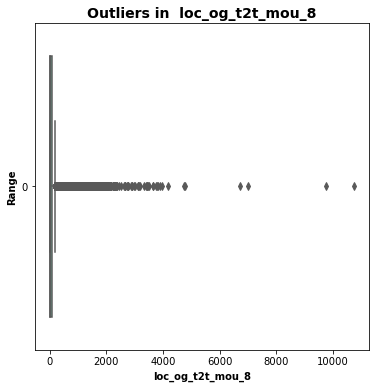

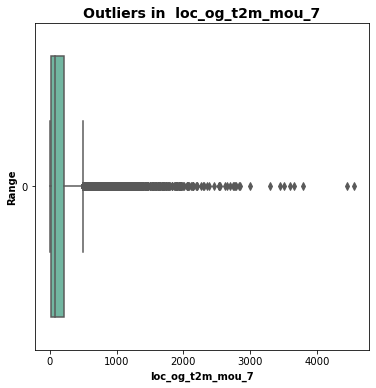

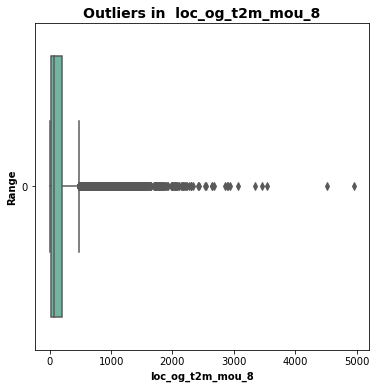

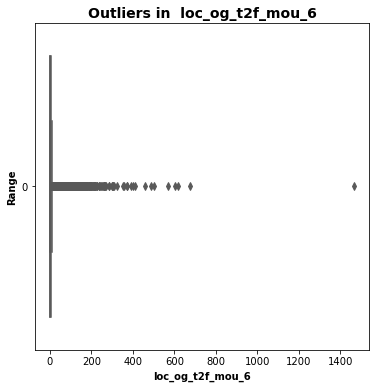

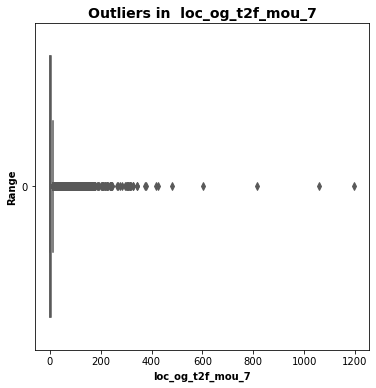

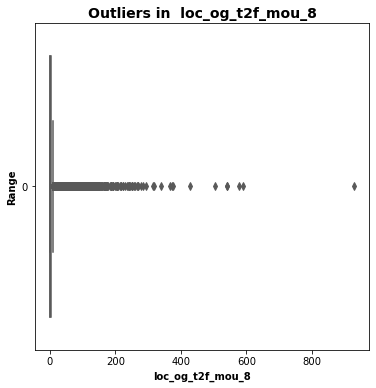

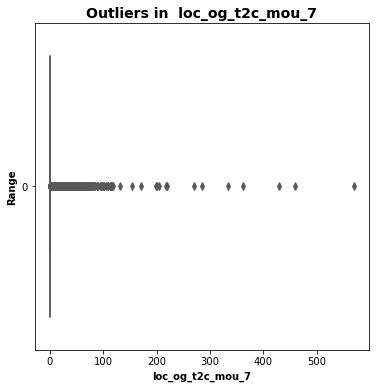

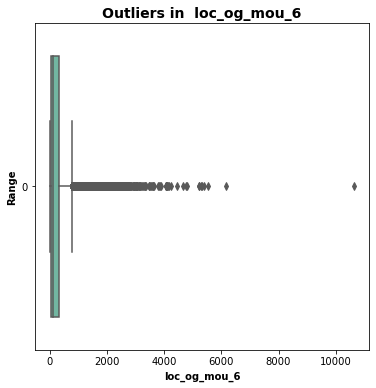

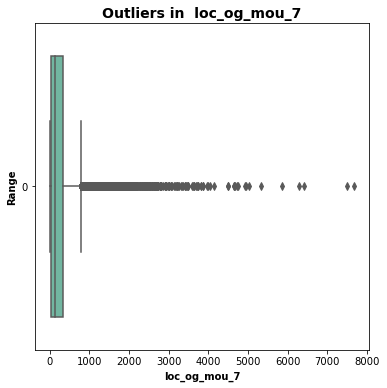

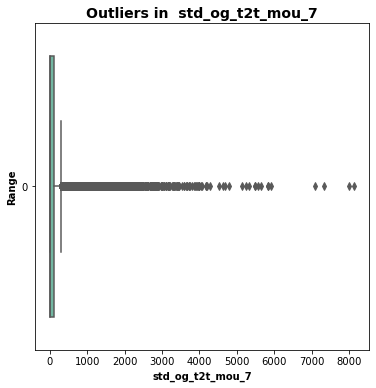

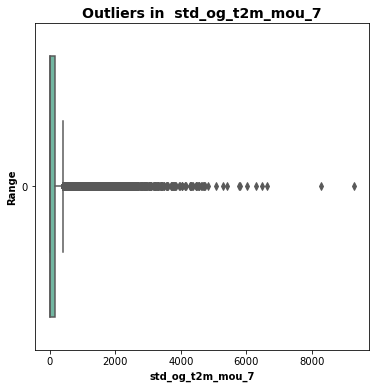

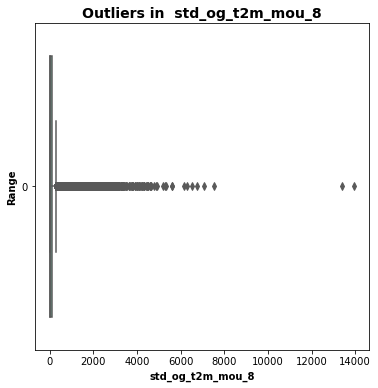

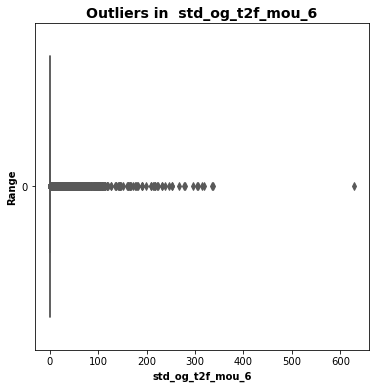

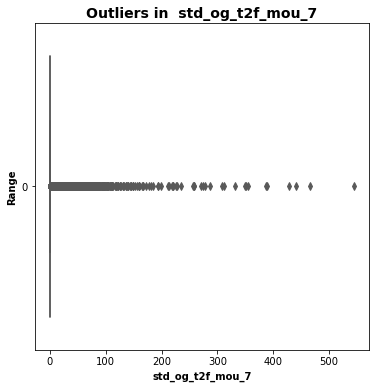

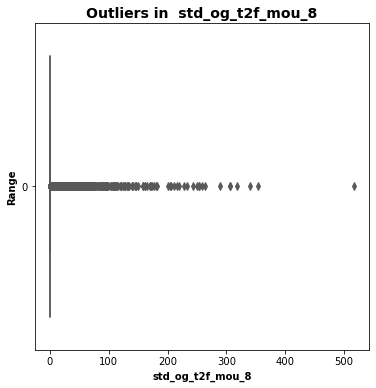

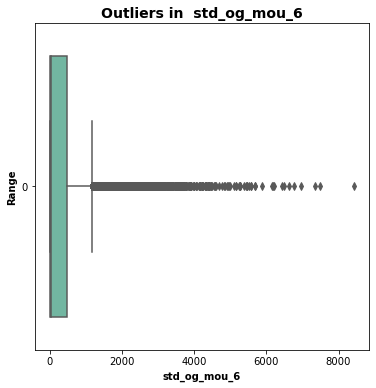

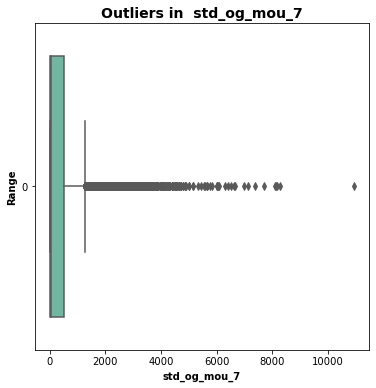

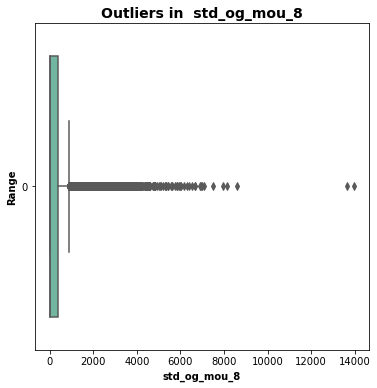

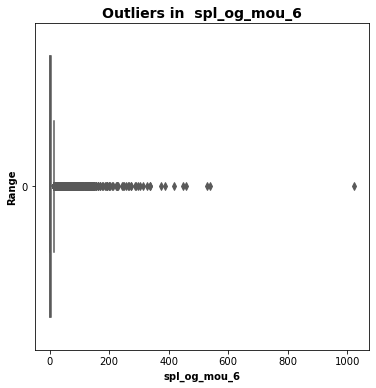

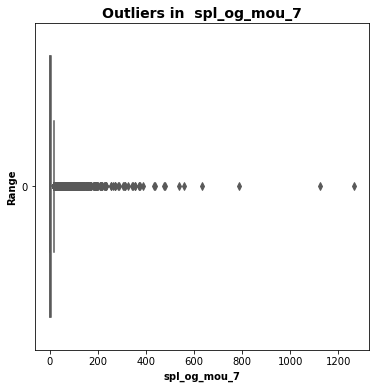

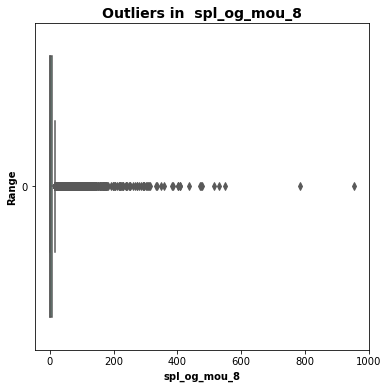

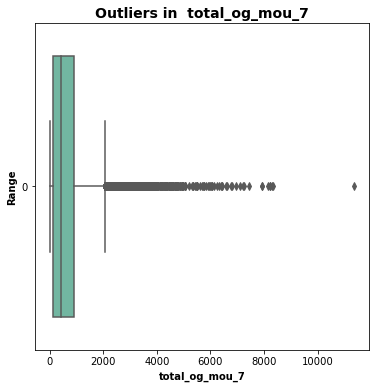

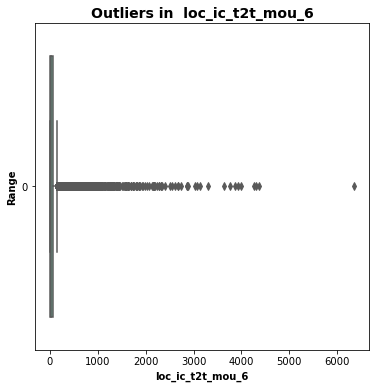

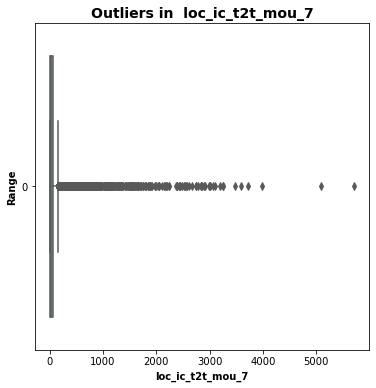

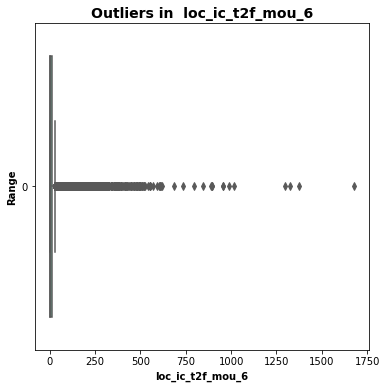

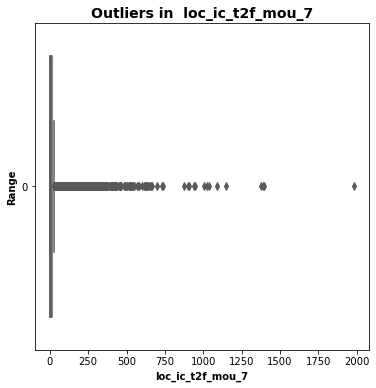

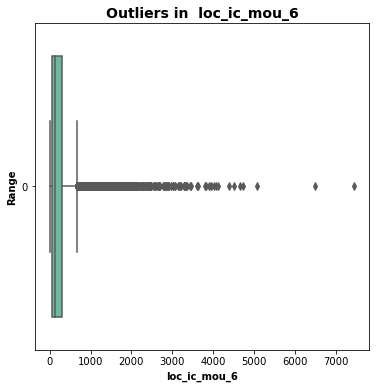

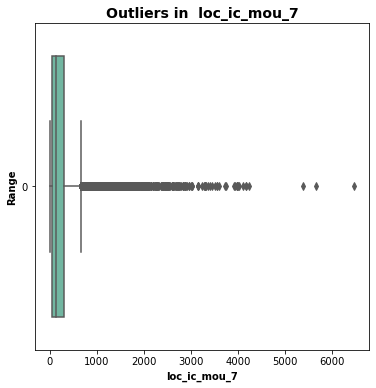

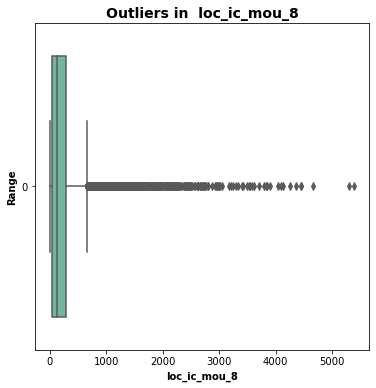

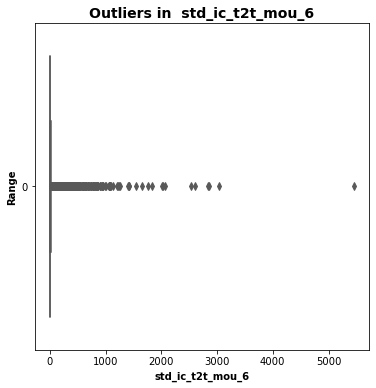

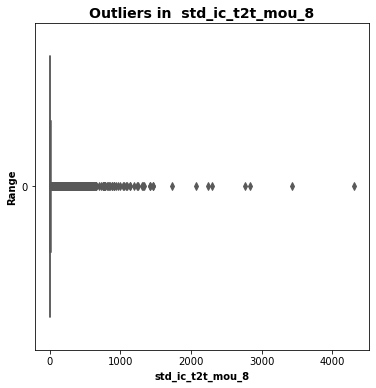

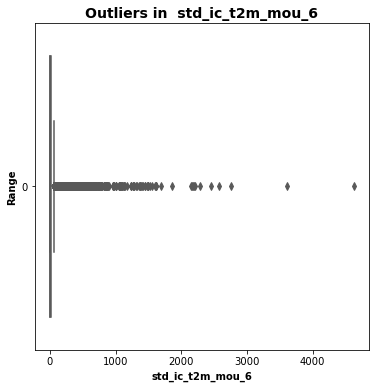

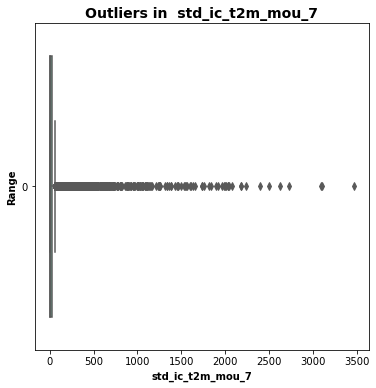

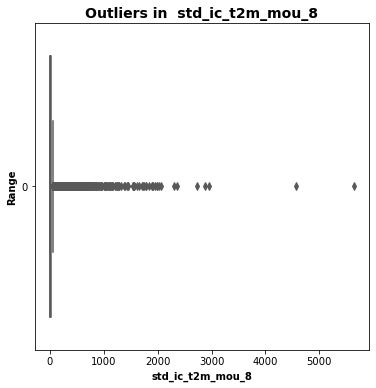

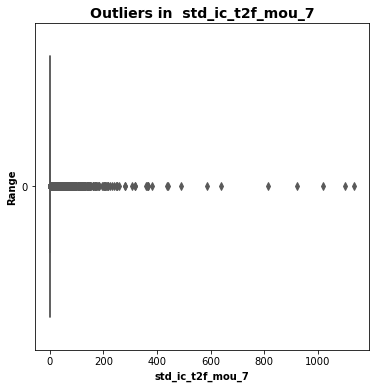

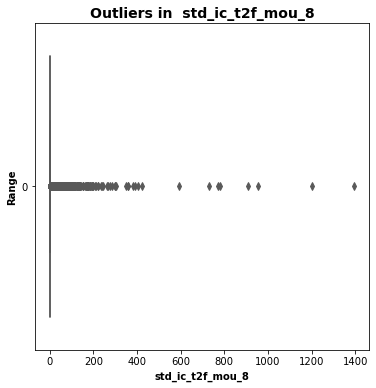

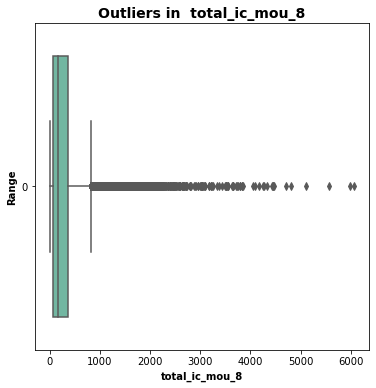

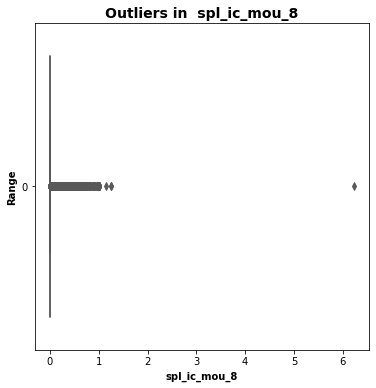

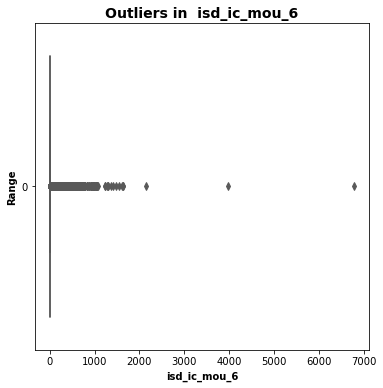

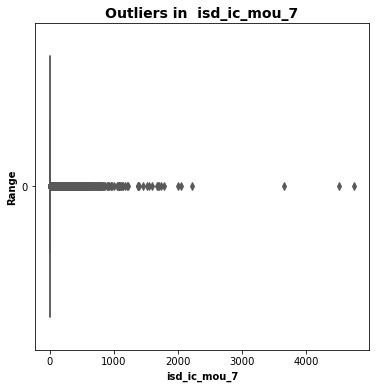

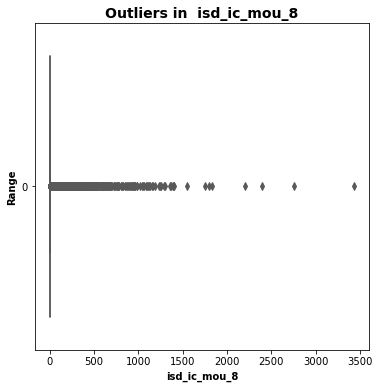

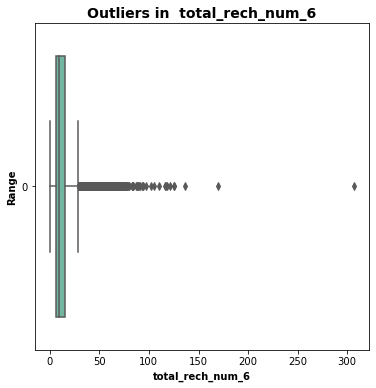

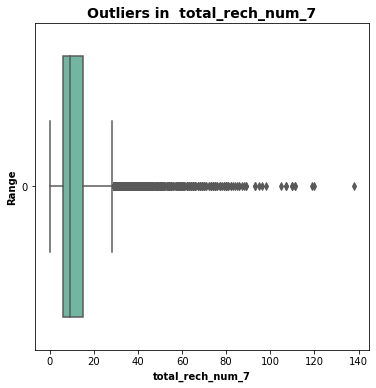

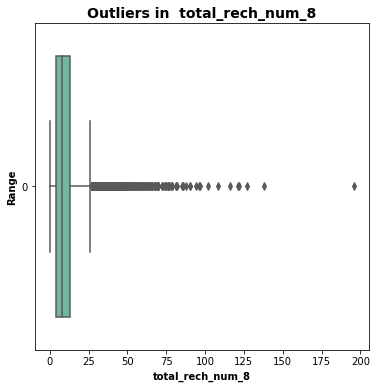

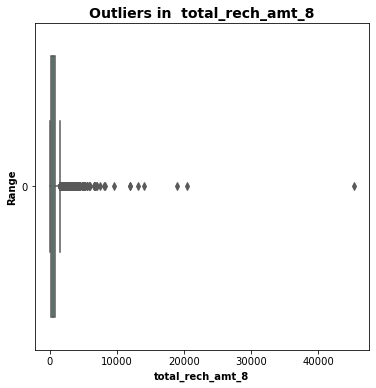

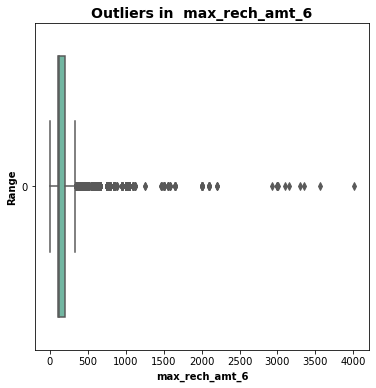

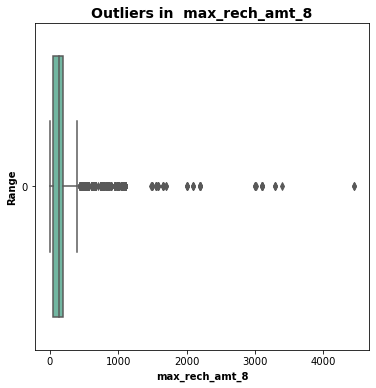

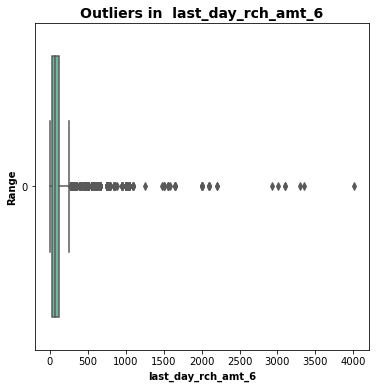

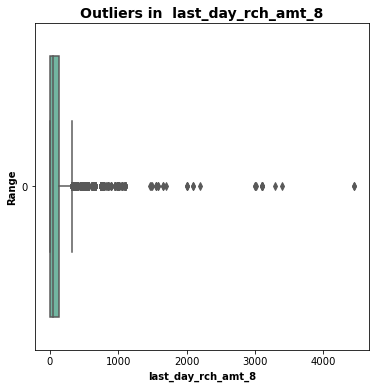

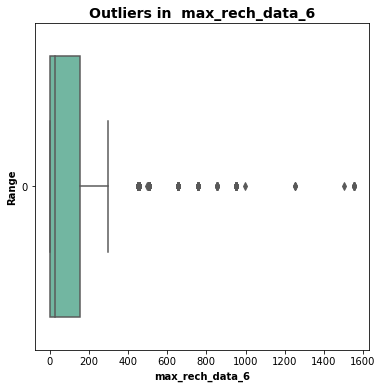

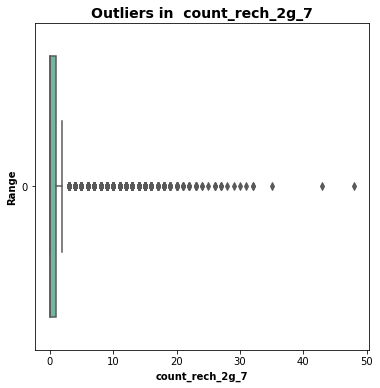

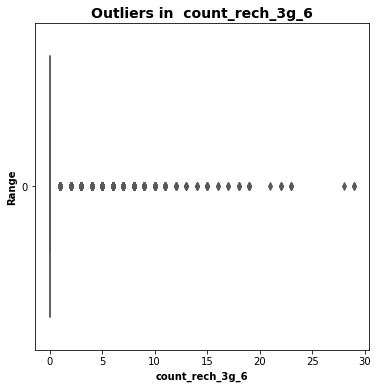

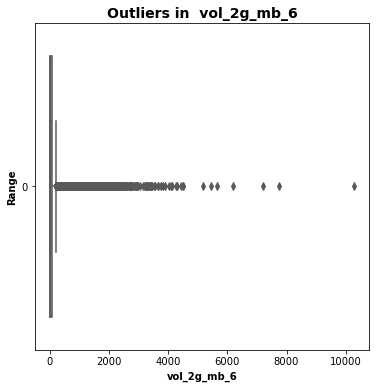

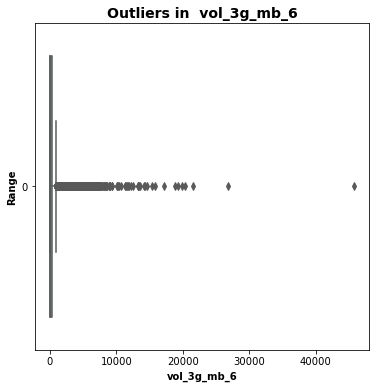

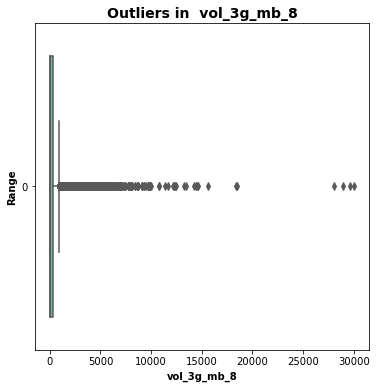

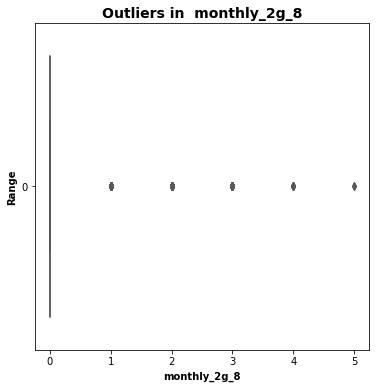

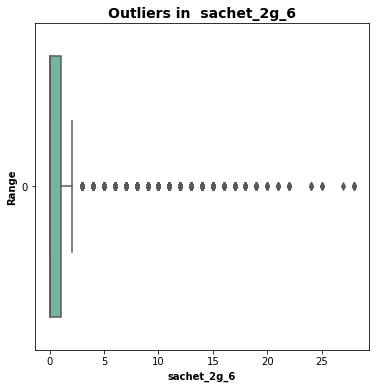

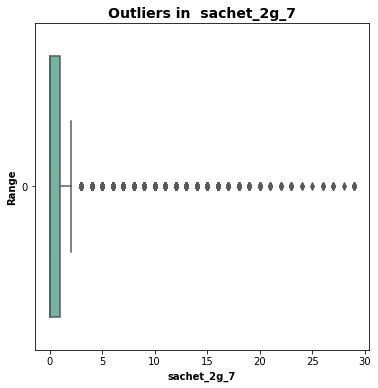

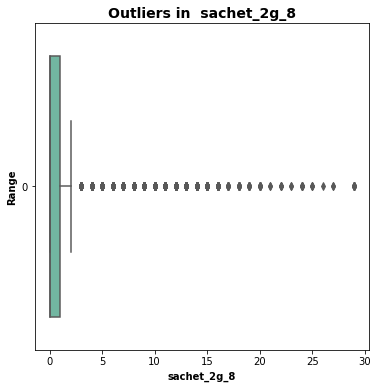

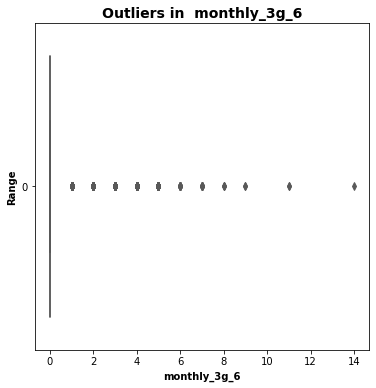

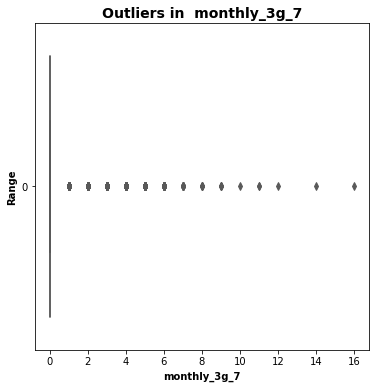

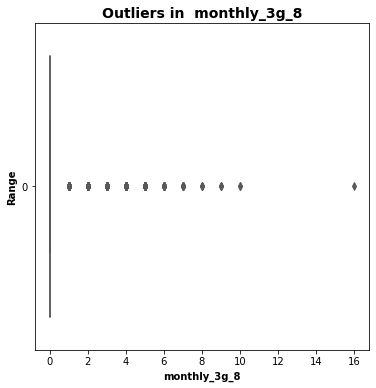

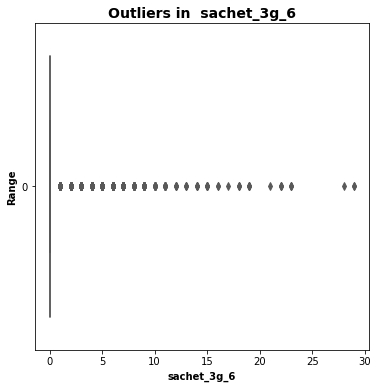

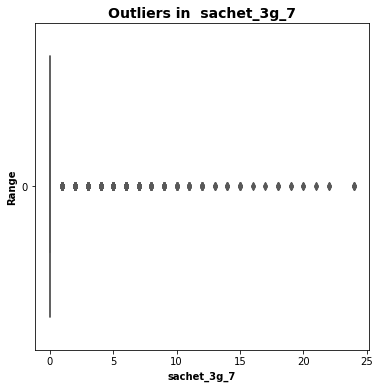

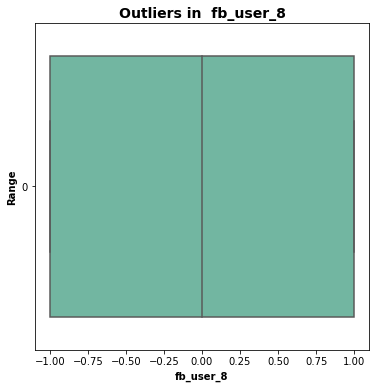

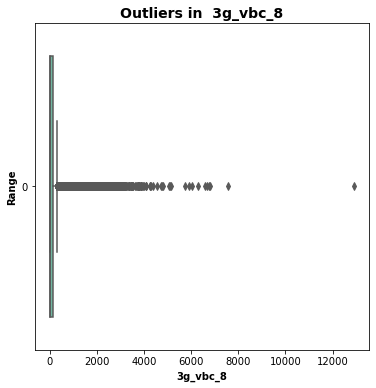

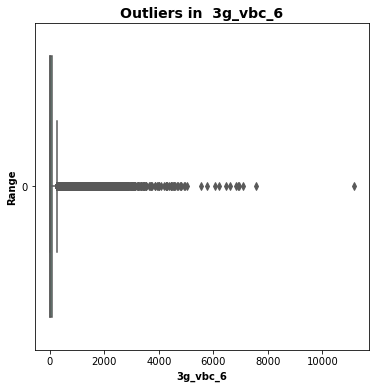

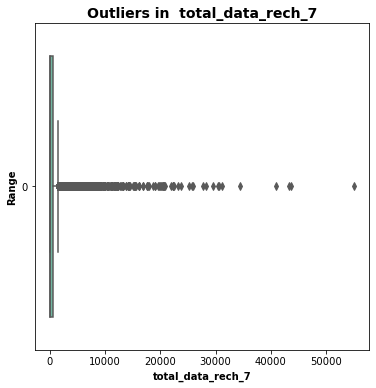

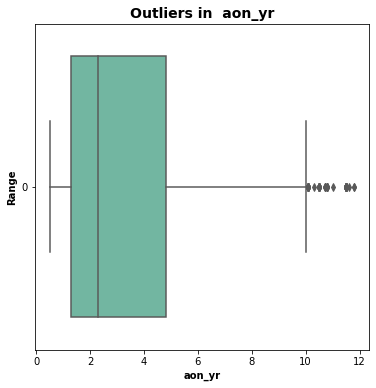

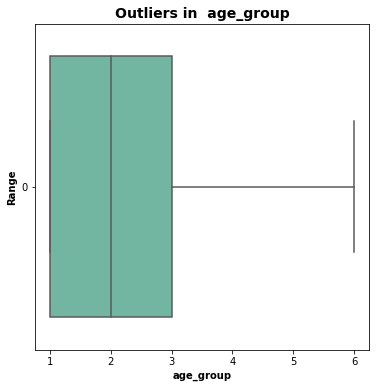

In [154]:
# Outlier analysis

for i  in high_val.drop('churn',1).columns:
    plt.figure(figsize =(6,6))
    ax = sns.boxplot(data = high_val[i], orient="h", palette="Set2" )
    plt.title('Boxplot of '+' '+ i)
    plt.title("Outliers in "+' '+ i, fontsize = 14, fontweight = 'bold')
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel(i, fontweight = 'bold')
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    plt.show()

<a> We observe many extreme data points in our principal components. Let us treat them as these extreme values can affect our clusters.

- ### Outlier Treatment

In [155]:
# Cappign the outliers
for col in high_val.select_dtypes(exclude = 'object').columns:
    perc = high_val[col].quantile([0.05,0.95]).values
    high_val[col]= np.clip(high_val[col],perc[0],perc[1])

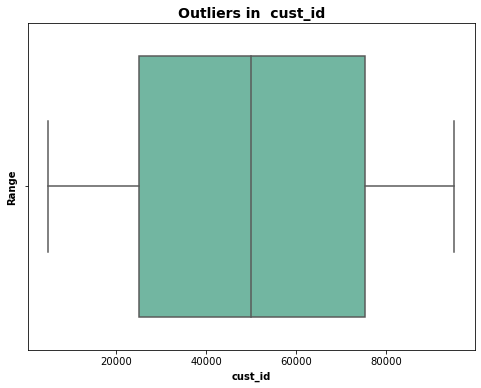

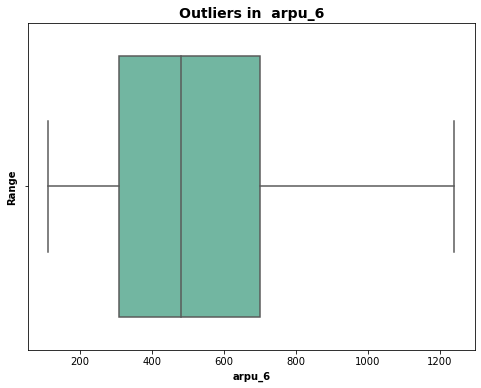

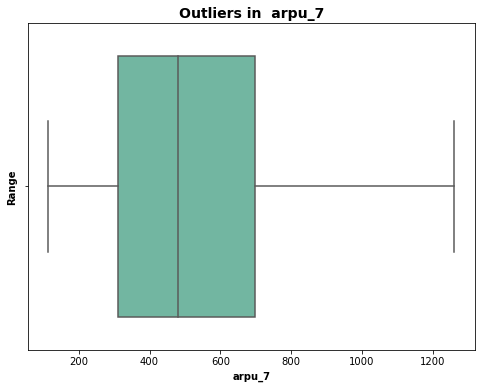

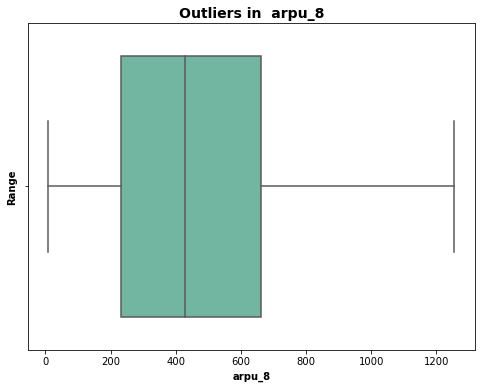

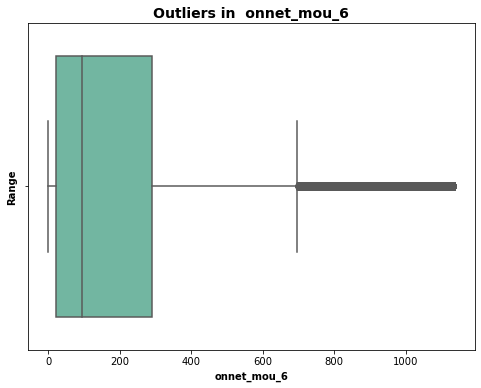

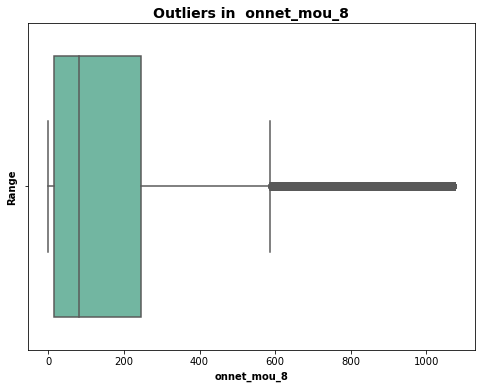

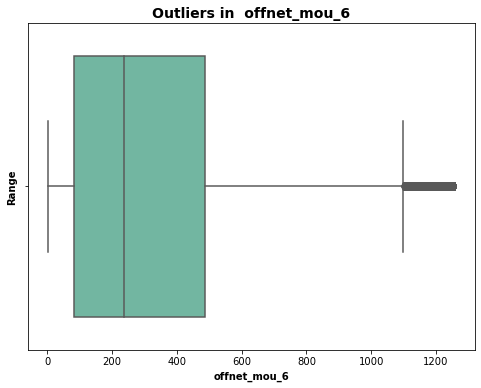

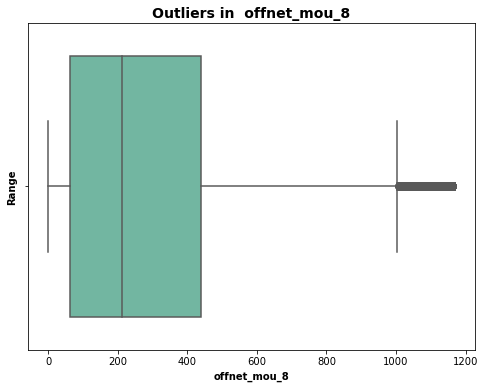

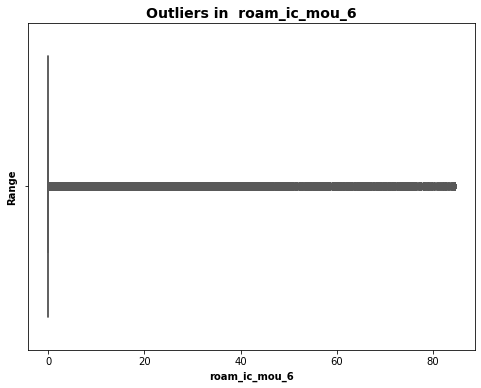

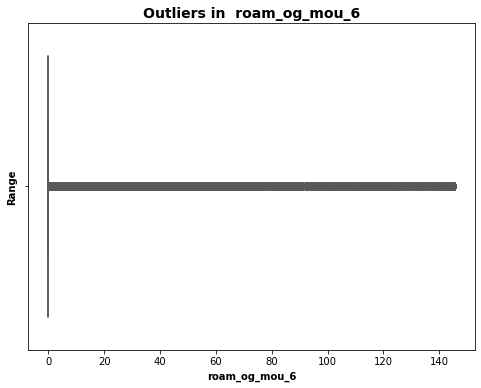

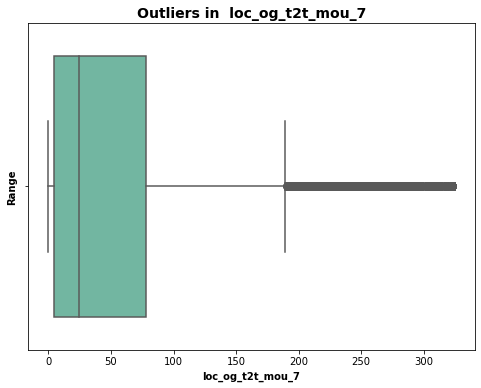

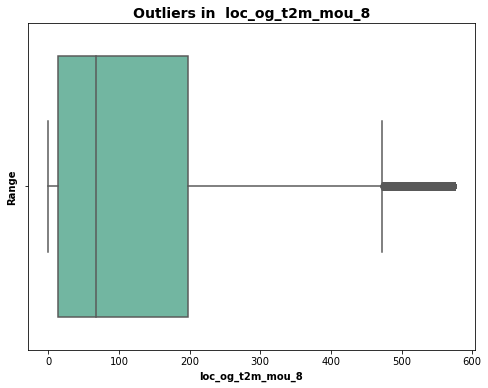

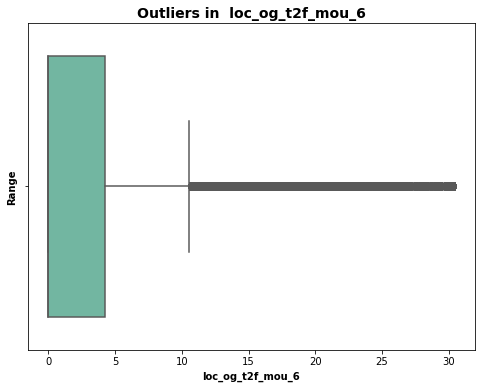

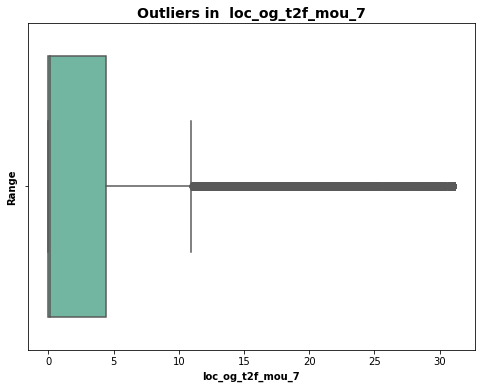

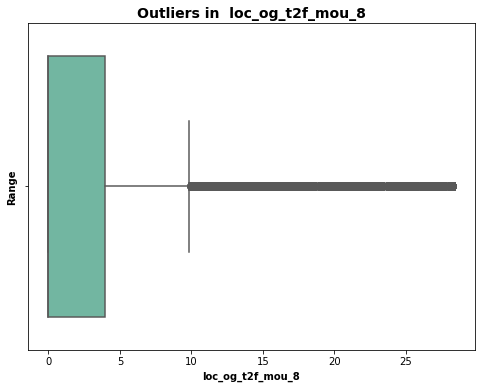

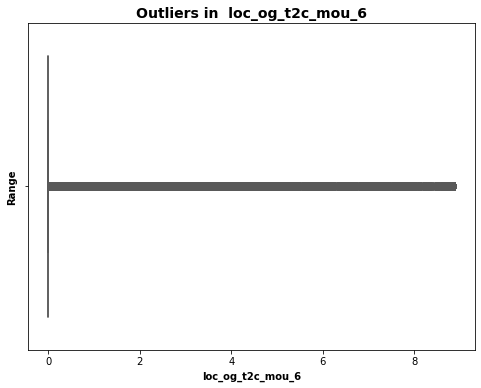

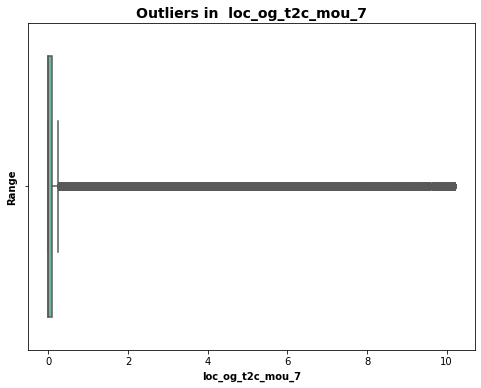

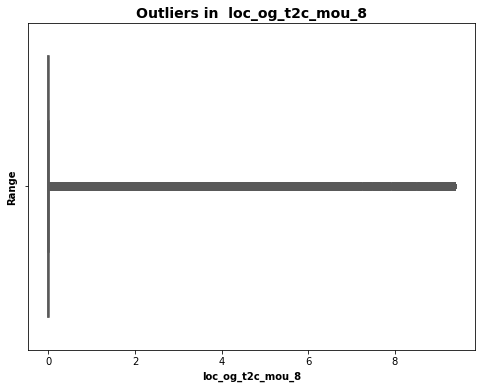

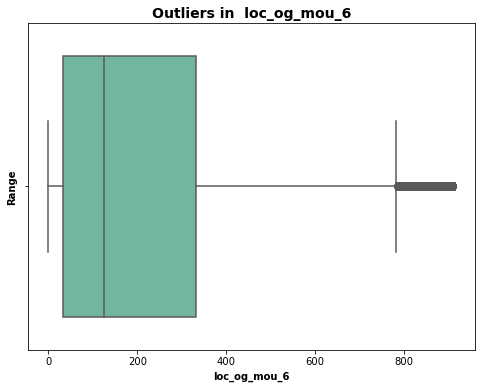

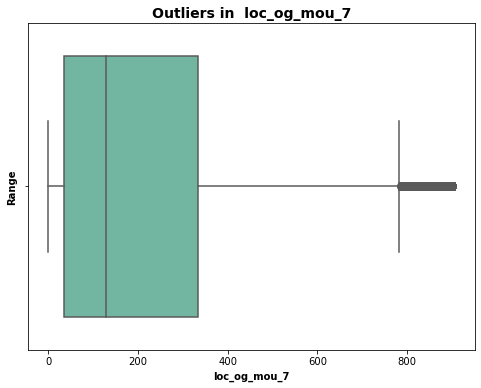

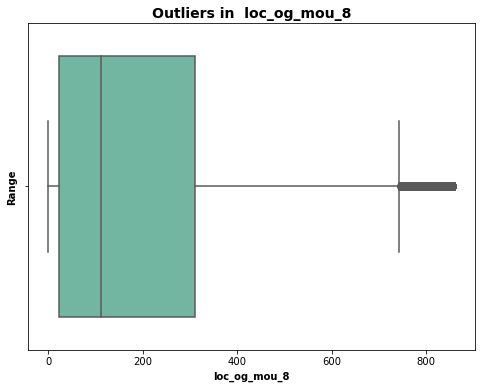

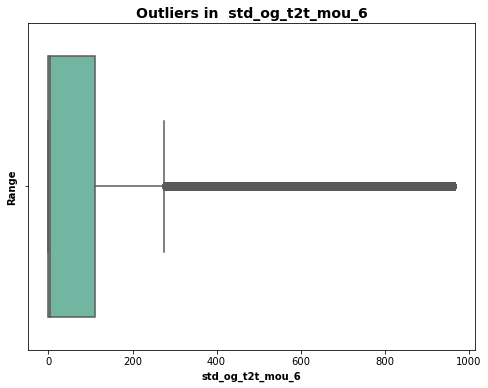

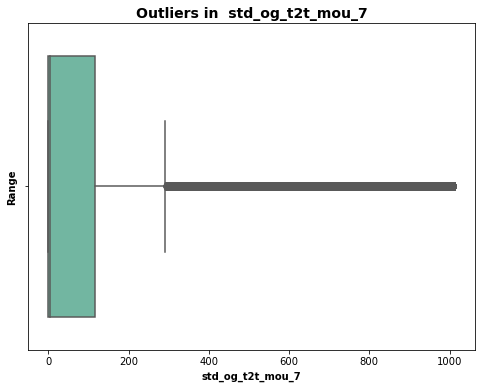

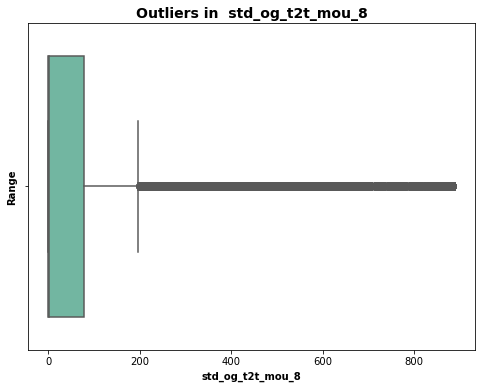

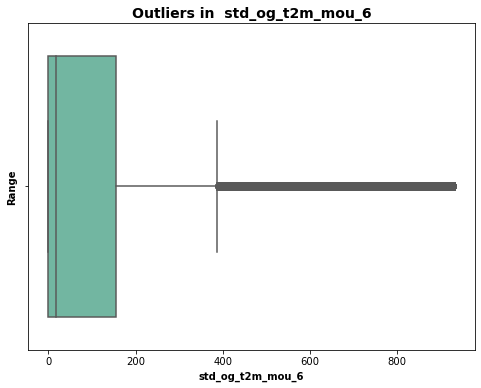

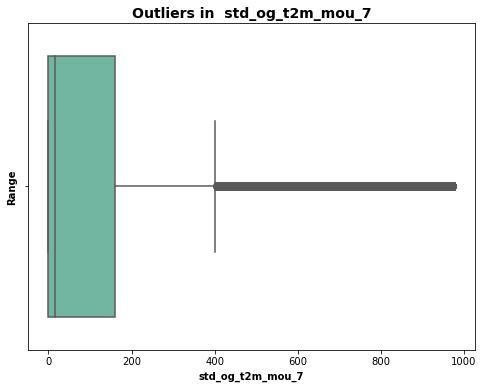

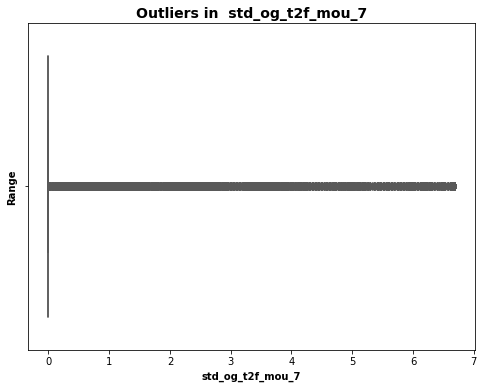

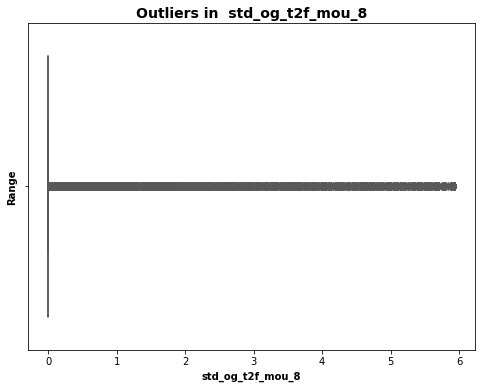

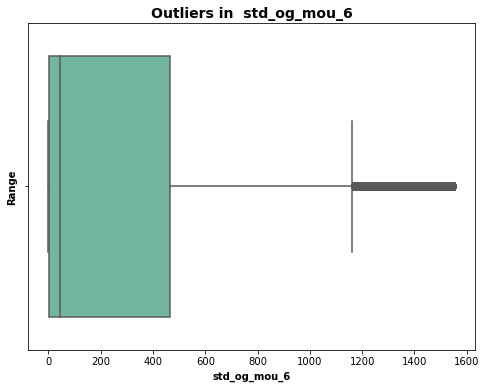

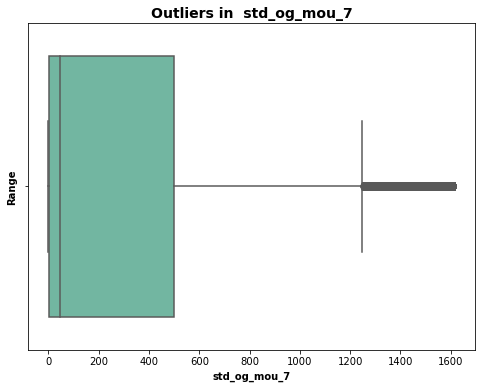

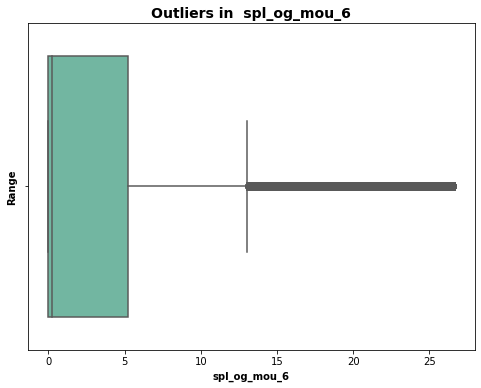

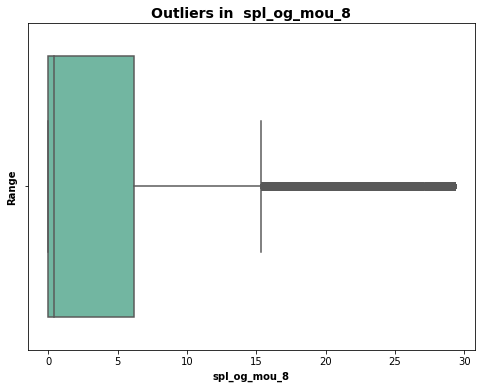

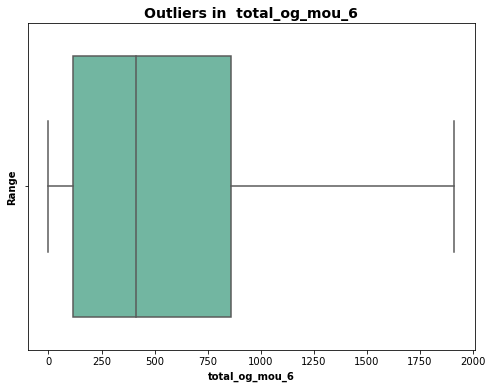

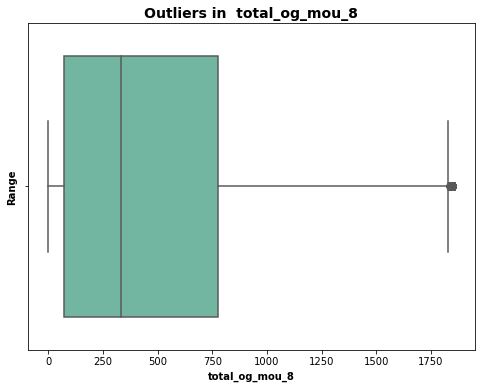

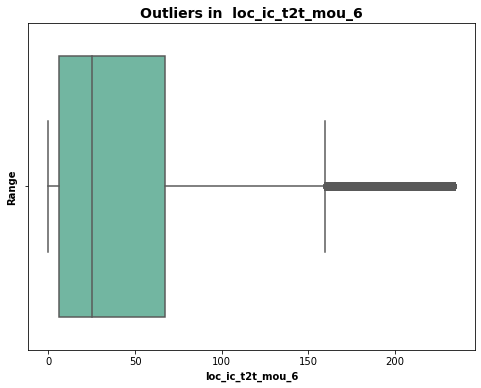

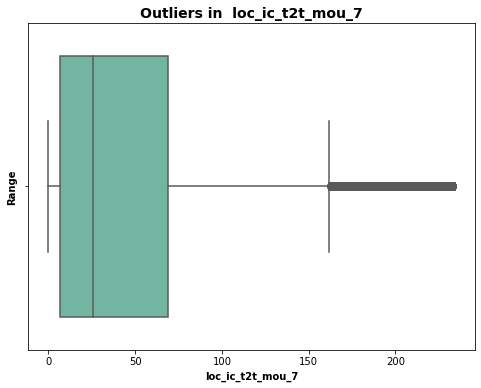

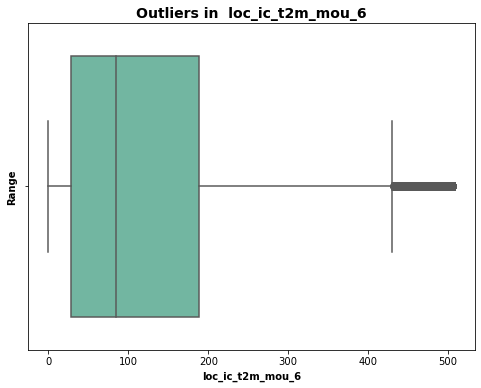

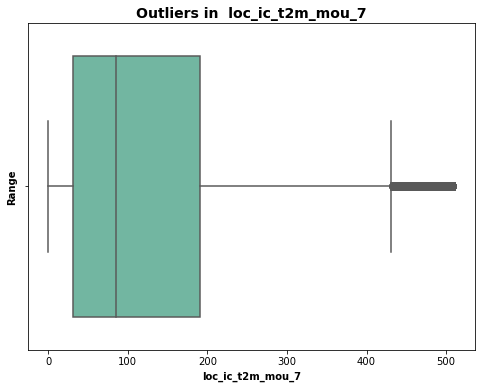

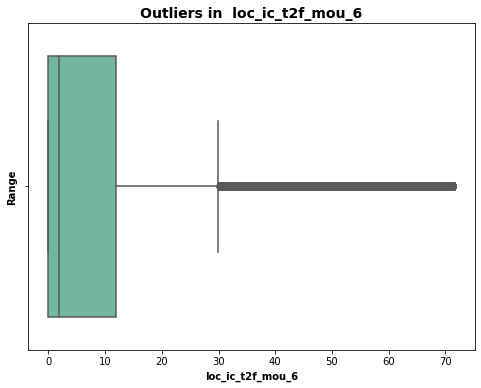

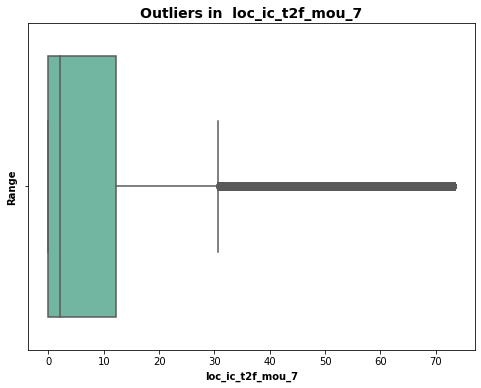

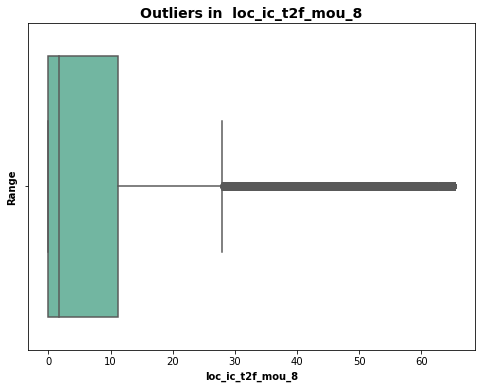

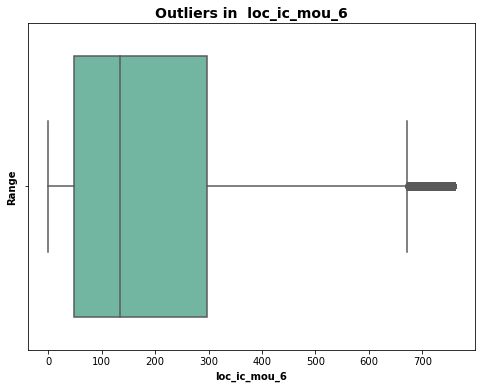

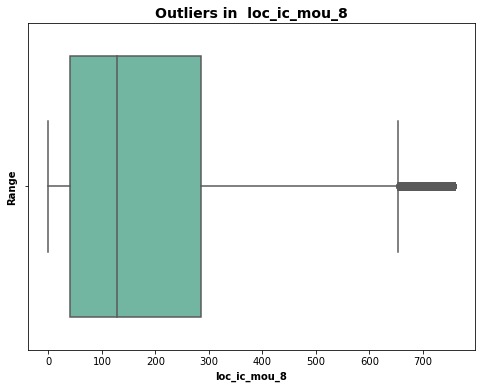

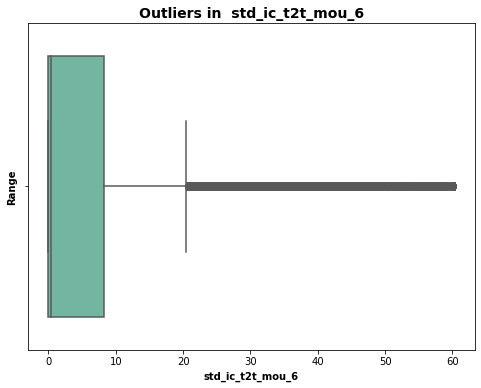

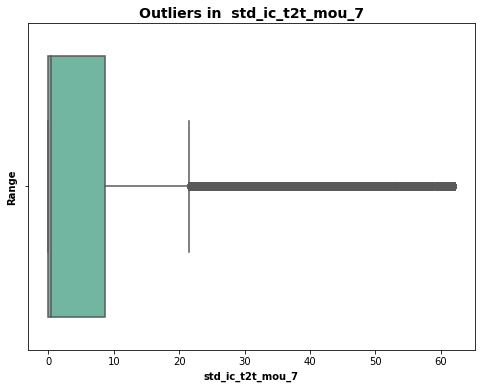

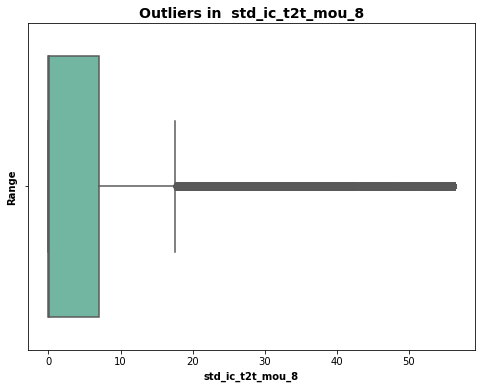

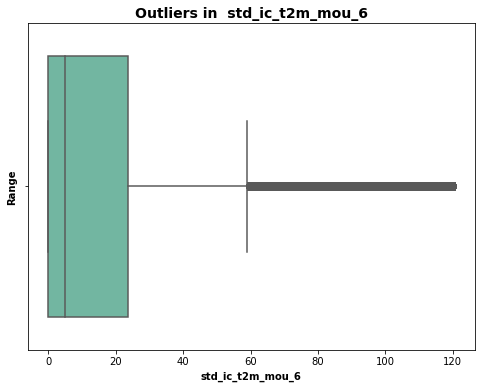

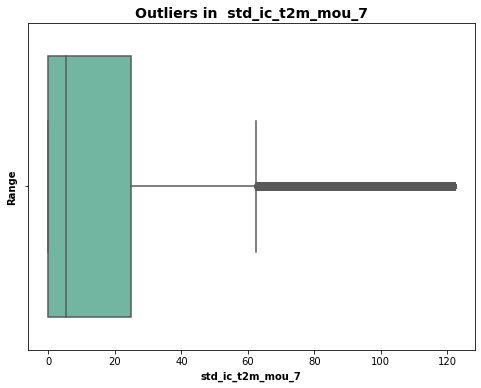

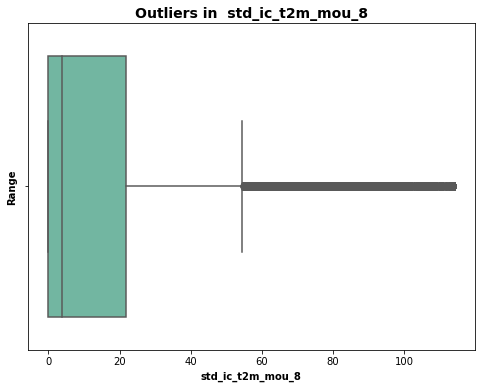

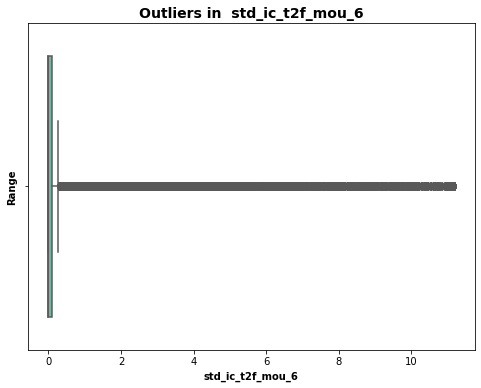

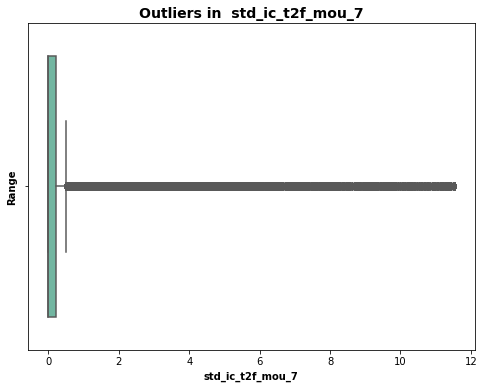

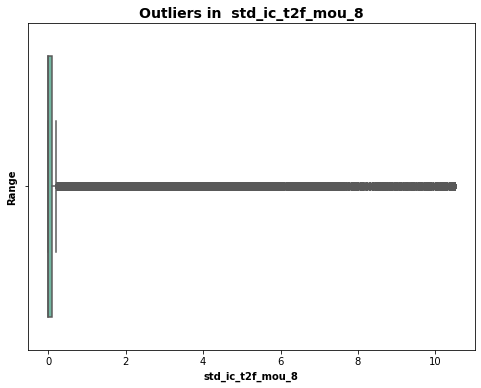

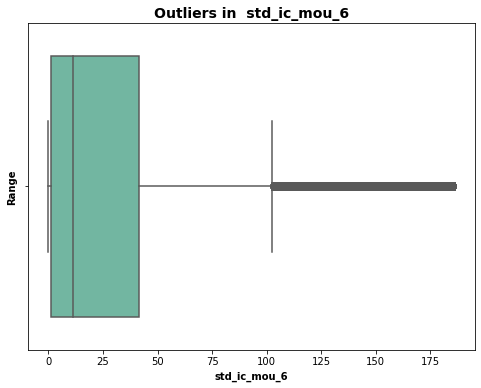

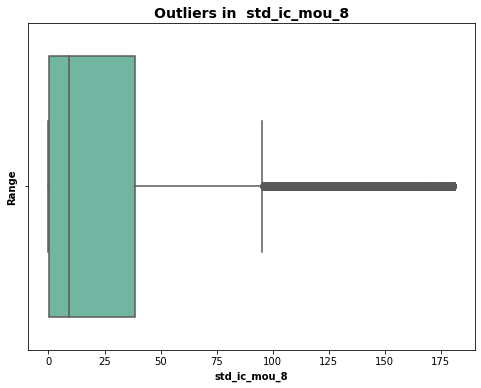

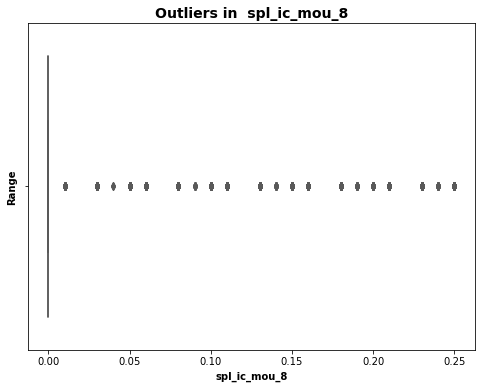

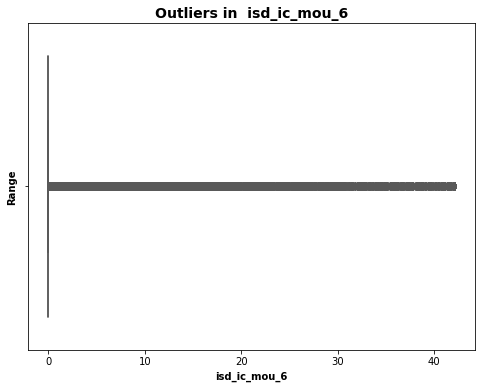

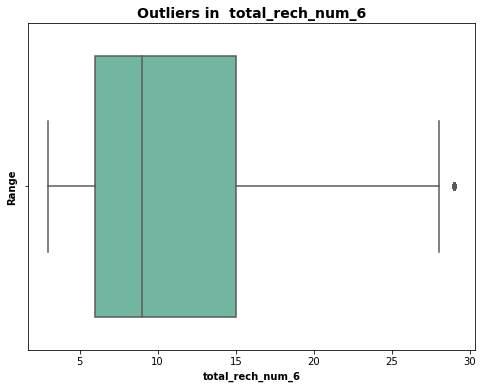

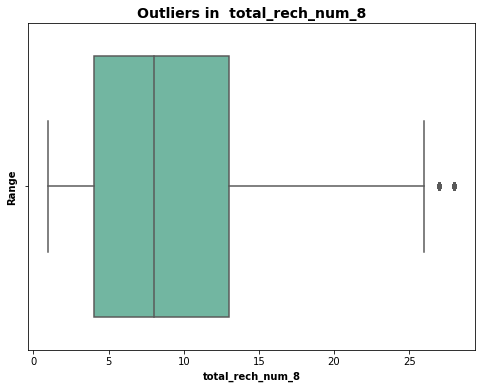

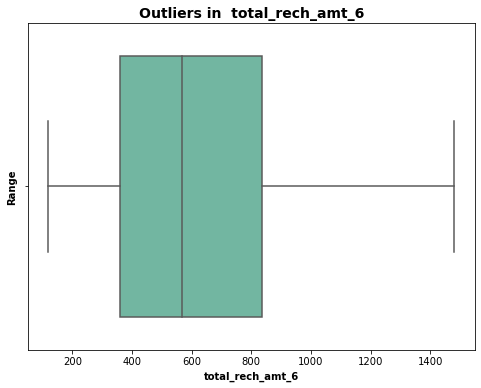

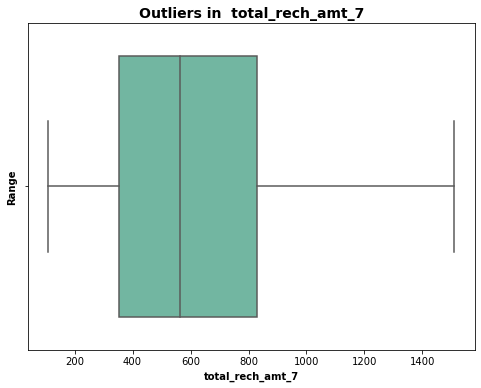

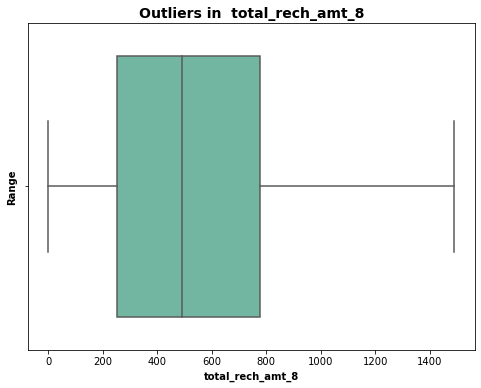

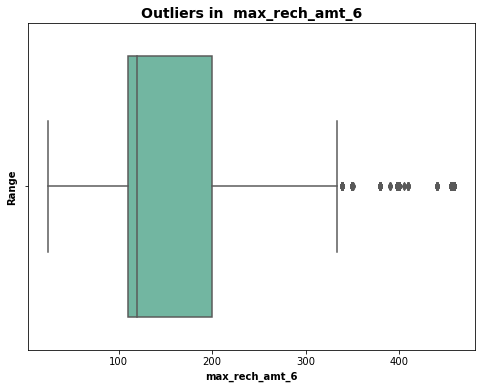

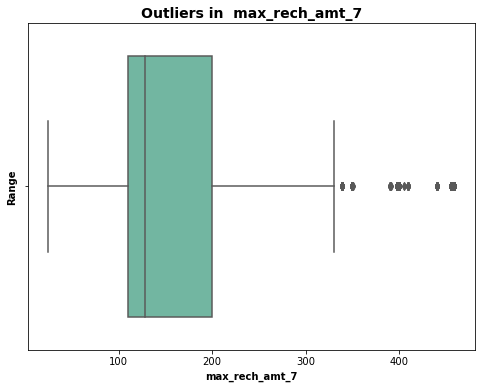

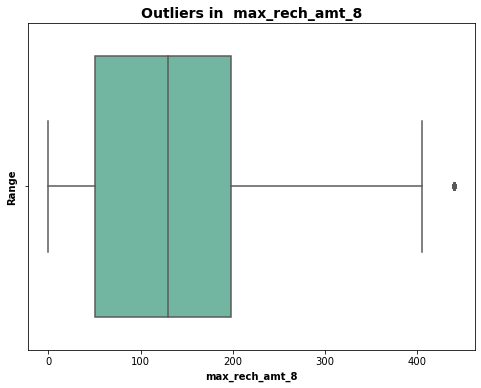

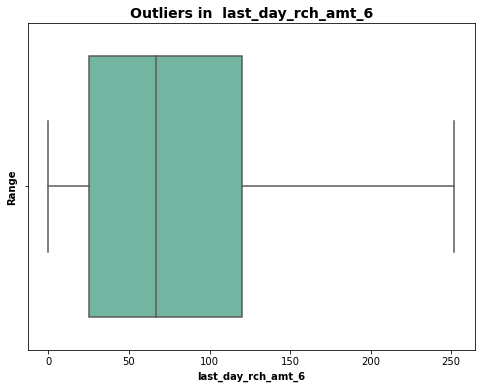

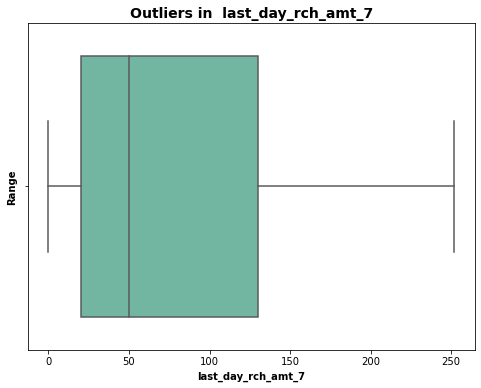

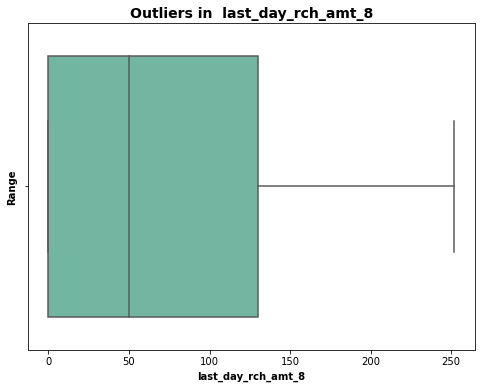

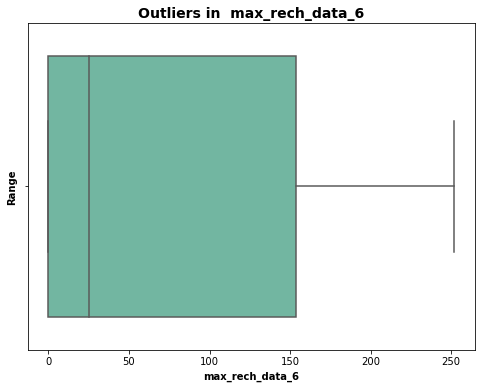

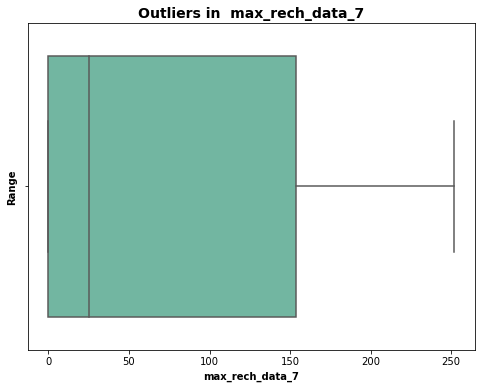

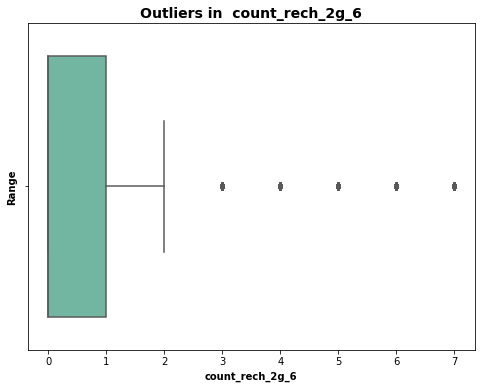

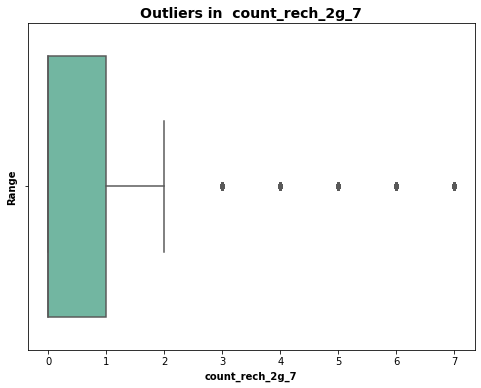

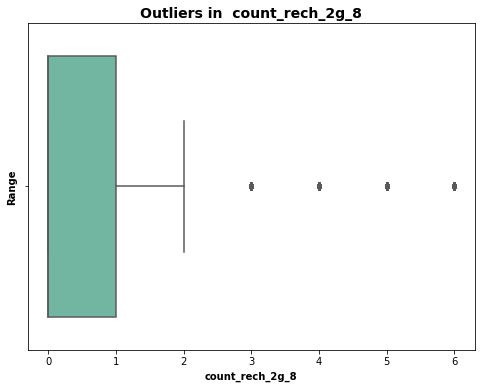

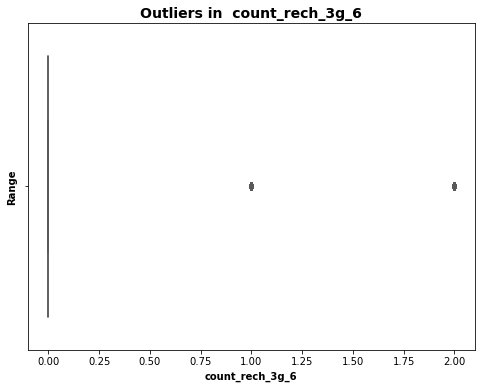

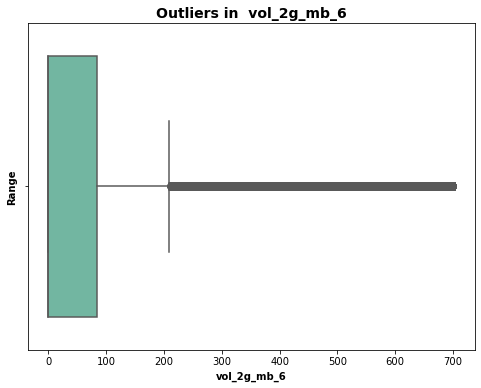

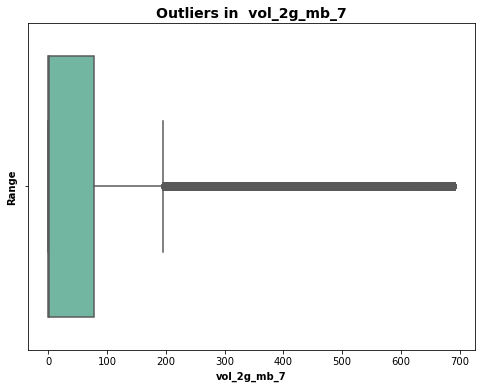

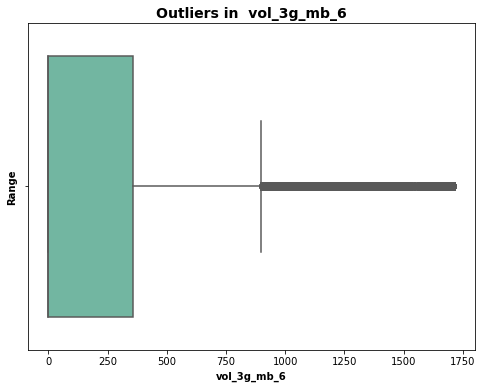

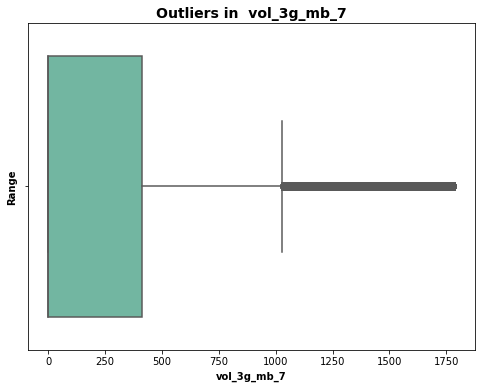

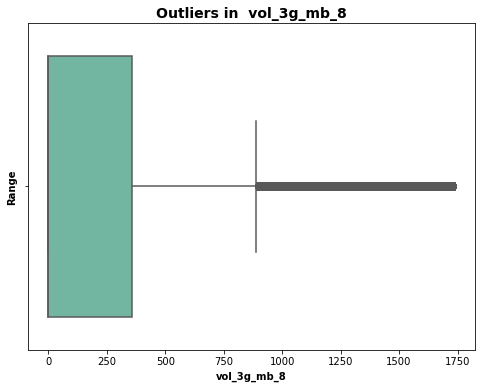

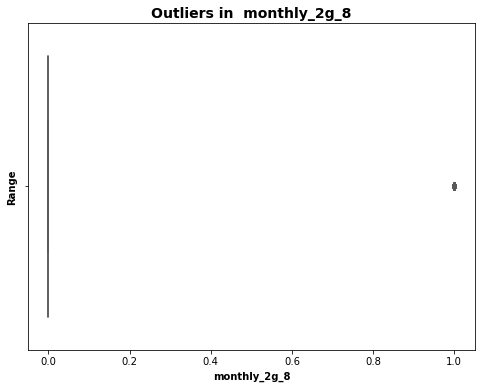

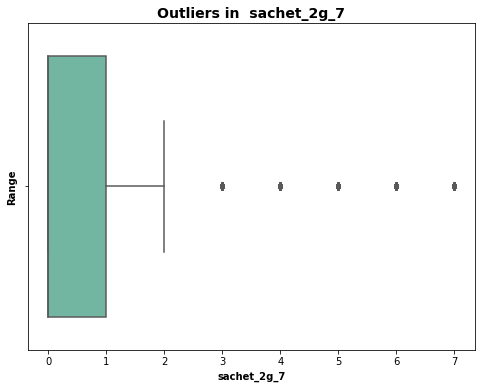

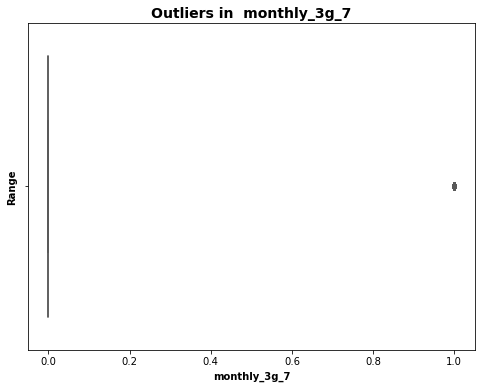

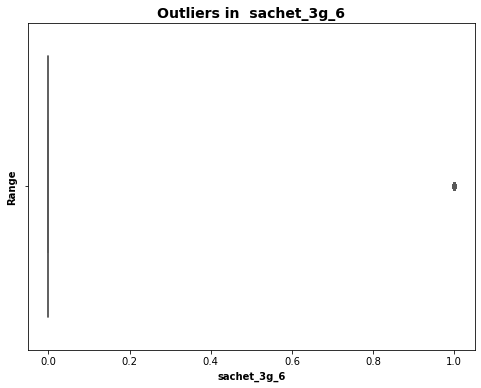

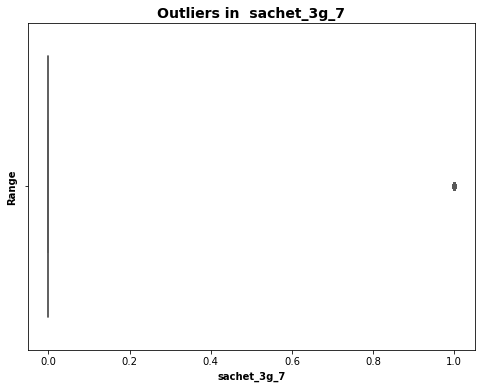

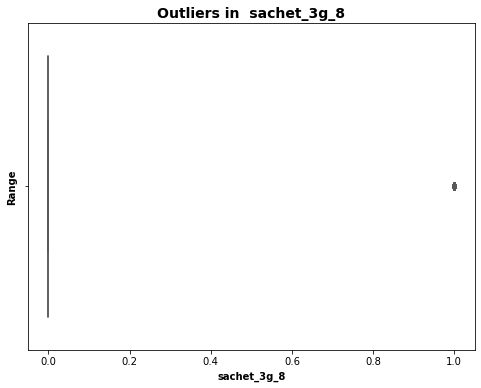

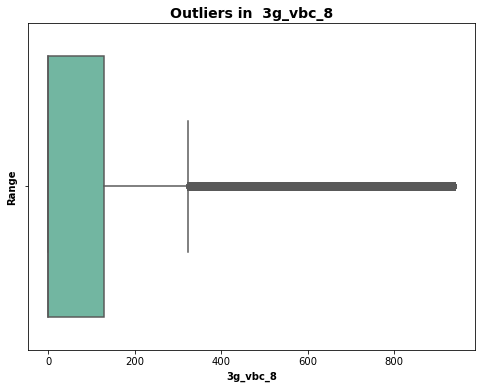

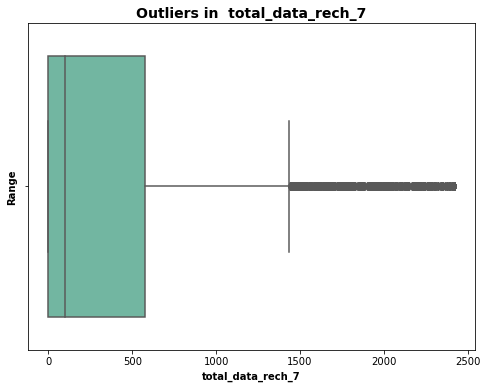

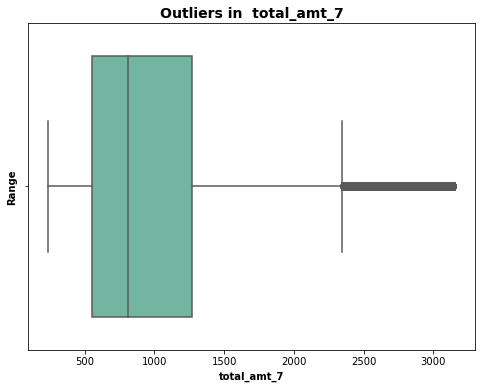

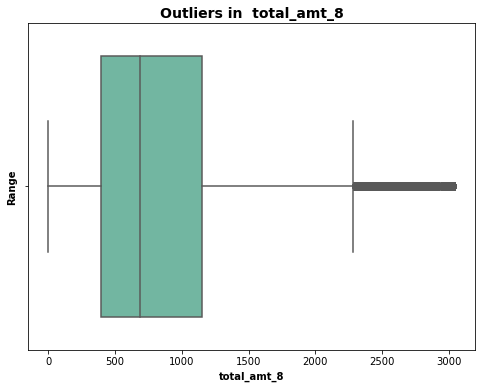

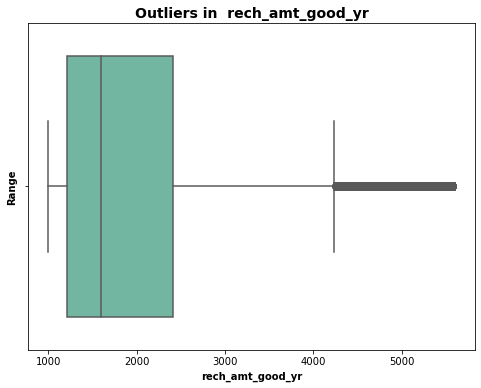

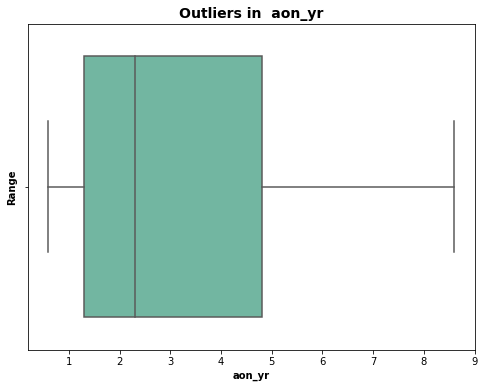

In [156]:
# Cheking whether any Outlier exists or not

for i  in high_val.drop('churn',1).select_dtypes(exclude = 'object').columns:
    plt.figure(figsize =(8,6))
    ax = sns.boxplot(high_val[i], orient="h", palette="Set2", whis = 1.5 )
    plt.title('Boxplot of '+' '+ i)
    plt.title("Outliers in "+' '+ i, fontsize = 14, fontweight = 'bold')
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel(i, fontweight = 'bold')
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    plt.show()

<a> We observe that after treating our dataset for outliers, only few extreme values remain. We choose to proceed with this dataset as treating them beyond this point will hamper our dataset.
    

------------------------------

## 9. Data Modeling and Model Evaluation 

## `PART 1: - Non Interpretable models`

### A) *Data Preparation*

### 1) Copying data and changing Data type

In [157]:
#Replacing  original data with treated data
high_logreg = high_val.copy()
#changing churn column to numeric
high_logreg.churn= high_logreg.churn.astype("int")


In [158]:
high_logreg.head()

cust_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0    4919.0   197.385   214.816   213.803   265.618262    272.70047   
7    4919.0  1069.180  1261.272  1255.019    57.840000     54.68000   
8    4919.0   378.721   492.223   137.362   413.690000    351.03000   
21   4919.0   514.453   597.753   637.760   102.410000    132.11000   
23   4919.0   112.510   193.897   366.966    48.960000     50.66000   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00    380.608111    384.994337          0.86      16.408431   
7         52.29    453.430000    567.160000        325.91      16.230000   
8         35.08     94.660000     80.630000        136.48       0.000000   
21        85.14    757.930000    896.680000        983.39       0.000000   
23        33.58     85.410000     89.360000        205.89       0.000000   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0       12.872921           0.00      27.063178       20.51937           0.00   
7       33.490000          31.64      23.740000       12.59000          38.06   
8        0.000000           0.00       0.000000        0.00000           0.00   
21       0.000000           0.00       0.000000        0.00000           0.00   
23       0.000000           0.00       0.000000        0.00000           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             30.43             31.13   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              28.39               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0              9.38   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66              6.68              5.93   
8              75.69              0.00              0.00              0.00   
21            842.83              0.00          

### 2) Creating dummies for categorical columns

In [159]:
dummies = pd.get_dummies(high_logreg[cat_cols])
dummies.head()

night_pck_user_6_-1.0  night_pck_user_6_0.0  night_pck_user_6_1.0  \
0                       0                     1                     0   
7                       1                     0                     0   
8                       1                     0                     0   
21                      1                     0                     0   
23                      1                     0                     0   

    night_pck_user_7_-1.0  night_pck_user_7_0.0  night_pck_user_7_1.0  \
0                       0                     1                     0   
7                       1                     0                     0   
8                       0                     1                     0   
21                      1                     0                     0   
23                      0                     1                     0   

    night_pck_user_8_-1.0  night_pck_user_8_0.0  night_pck_user_8_1.0  \
0                       0                     1                     0   
7                       1                     0                     0   
8                       0                     1                     0   
21                      1                     0                     0   
23                      0                     1                     0   

    fb_user_6_-1.0  fb_user_6_0.0  fb_user_6_1.0  fb_user_7_-1.0  \
0                0              0              1               0   
7                1              0              0               1   
8                1              0              0               0   
21               1              0              0               1   
23               1              0              0               0   

    fb_user_7_0.0  fb_user_7_1.0  fb_user_8_-1.0  fb_user_8_0.0  \
0               0              1               0              0   
7               0              0               1              0   
8               0              1               0              0   
21              0              0               1              0   
23              0              1               0              0   

    fb_user_8_1.0  age_group_1  age_group_2  age_group_3  age_group_4  \
0               1            0            1            0            0   
7               0            0            1            0            0   
8               1            1            0            0            0   
21              0            1            0            0            0   
23              1            1            0            0            0   

    age_group_5  age_group_6  
0             0            0  
7             0            0  
8             0            0  
21            0            0  
23            0            0

In [160]:
dummies.shape

(30001, 24)

In [161]:
#Dropping all the night pack & FB user categories wtih -1.0 and age_group 1
cols_to_drop = ['night_pck_user_6_-1.0','night_pck_user_7_-1.0','night_pck_user_8_-1.0','fb_user_6_-1.0','fb_user_7_-1.0','fb_user_8_-1.0','age_group_1']

dummies.drop(cols_to_drop, axis =1, inplace = True)
dummies.head()

night_pck_user_6_0.0  night_pck_user_6_1.0  night_pck_user_7_0.0  \
0                      1                     0                     1   
7                      0                     0                     0   
8                      0                     0                     1   
21                     0                     0                     0   
23                     0                     0                     1   

    night_pck_user_7_1.0  night_pck_user_8_0.0  night_pck_user_8_1.0  \
0                      0                     1                     0   
7                      0                     0                     0   
8                      0                     1                     0   
21                     0                     0                     0   
23                     0                     1                     0   

    fb_user_6_0.0  fb_user_6_1.0  fb_user_7_0.0  fb_user_7_1.0  fb_user_8_0.0  \
0               0              1              0              1              0   
7               0              0              0              0              0   
8               0              0              0              1              0   
21              0              0              0              0              0   
23              0              0              0              1              0   

    fb_user_8_1.0  age_group_2  age_group_3  age_group_4  age_group_5  \
0               1            1            0            0            0   
7               0            1            0            0            0   
8               1            0            0            0            0   
21              0            0            0            0            0   
23              1            0            0            0            0   

    age_group_6  
0             0  
7             0  
8             0  
21            0  
23            0

In [162]:
dummies.shape

(30001, 17)

In [163]:
#concatenating the dummy variables with Original DataFrame
high_logreg = pd.concat([high_logreg,dummies], axis =1)
high_logreg.shape

(30001, 155)

In [164]:
# drop duplicate columns
high_logreg.drop(cat_cols,axis =1, inplace = True)

high_logreg.shape

(30001, 148)

### 3) Train Test Split

In [165]:
# Putting response variable to y
y = high_logreg.pop('churn')

# Putting feature variables to X
X = high_logreg.drop('cust_id',1)

In [166]:
X.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803   265.618262    272.70047         0.00   
7   1069.180  1261.272  1255.019    57.840000     54.68000        52.29   
8    378.721   492.223   137.362   413.690000    351.03000        35.08   
21   514.453   597.753   637.760   102.410000    132.11000        85.14   
23   112.510   193.897   366.966    48.960000     50.66000        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     380.608111    384.994337          0.86      16.408431      12.872921   
7     453.430000    567.160000        325.91      16.230000      33.490000   
8      94.660000     80.630000        136.48       0.000000       0.000000   
21    757.930000    896.680000        983.39       0.000000       0.000000   
23     85.410000     89.360000        205.89       0.000000       0.000000   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00      27.063178       20.51937           0.00   
7           31.64      23.740000       12.59000          38.06   
8            0.00       0.000000        0.00000           0.00   
21           0.00       0.000000        0.00000           0.00   
23           0.00       0.000000        0.00000           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             30.43             31.13   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              28.39               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0              9.38   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66              6.68              5.93   
8              75.69              0.00              0.00              0.00   
21            842.83              0.00              0.00              0.00   
23             39.61      

In [167]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

Size of Feature variables dataset is: (30001, 146)
Size of response variable dataset is: (30001,)


In [168]:
# Split data into train & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [169]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21000, 146), (9001, 146), (21000,), (9001,))

### 4) Feature scaling

In [170]:
print("Glimpse of Feature variables train dataset - x_train:")
X_train.head()

Glimpse of Feature variables train dataset - x_train:


arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
81898  271.831  199.033  393.619         2.09         2.03         3.63   
33489  337.141  348.726  285.105       111.68       284.11       144.29   
21296  569.597  837.682  668.214       300.36       323.21       302.56   
85765  512.213  587.604  329.858        59.24        80.03        14.06   
51152  285.673  161.771  176.107         7.73         3.13         4.04   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
81898        111.39         53.43        115.46           0.00            0.0   
33489         60.78        125.28        134.38          52.16            0.0   
21296        486.24        404.33        554.08           0.00            0.0   
85765        814.98        964.93        455.48           0.00            0.0   
51152         35.89         28.44         30.34           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
81898           0.00           0.00            0.0           0.00   
33489           0.00          45.79            0.0           0.00   
21296           0.00           0.00            0.0           0.00   
85765          34.04           0.00            0.0          31.44   
51152           0.00           0.00            0.0           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
81898              2.09              2.03              3.63            110.28   
33489              6.04             40.09             83.24              6.99   
21296            279.24            314.94            298.78            431.99   
85765             58.76             80.03              8.66            319.78   
51152              7.73              3.13              4.04             26.33   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
81898             41.83            107.13              0.00              7.23   
33489             41.51             70.38              0.00              1.35   
21296            351.38            473.18             16.23             22.06   
85765            170.66             88.61              0.00              0.00   
51152             28.13             30.34              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
81898              4.51              0.00              4.36               0.0   
33489              2.03              0.00             10.19               0.0   
21296             13.81              0.00              0.00               0.0   
85765              0.90              0.00              0.00               0.0   
51152              0.00              8.88              0.31               0.0   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
81898        112.38         51.09        115.28              0.00   
33489         13.04         82.96        155.66             87.28   
21296        727.48        688.39        787.98             21.11   
85765        378.54        250.69         98.18              0.48   
51152         34.06         31.26         34.39              0.00   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
81898              0.00              0.00              0.00              0.00   
33489            244.01             61.04             29.13             64.48   
21296              8.26              1.58             36.71             28.79   
85765              0.00              4.51            469.78            716.39   
51152              0.00              0.00              0.00              0.00   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
81898              1.13              1.11              0.00              2.68   
33489             61.96              0.00              0.00              0.00   
21296             67.08              0.00        

In [171]:
num_var = X_train.select_dtypes(exclude='object').drop(dummies.columns,1)
num_col = num_var.columns

In [172]:
## Scaling the train and test data
scale = StandardScaler()
X_train[num_col] = scale.fit_transform(X_train[num_col])
X_test[num_col] = scale.fit_transform(X_test[num_col])
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
81898 -0.870423 -1.107163 -0.263380    -0.727518    -0.714518    -0.700221   
33489 -0.653475 -0.615210 -0.592784    -0.379013     0.145047    -0.214628   
21296  0.118702  0.991702  0.570178     0.221004     0.264195     0.331759   
85765 -0.071917  0.169842 -0.456932    -0.545777    -0.476834    -0.664214   
51152 -0.824443 -1.229621 -0.923658    -0.709583    -0.711166    -0.698806   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
81898     -0.680964     -0.839096     -0.616762      -0.378627      -0.357029   
33489     -0.827675     -0.634940     -0.557875       2.083767      -0.357029   
21296      0.405673      0.157959      0.748402      -0.378627      -0.357029   
85765      1.358643      1.750860      0.441519      -0.378627      -0.357029   
51152     -0.899828     -0.910104     -0.881690      -0.378627      -0.357029   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
81898      -0.379902      -0.383499      -0.361462      -0.378344   
33489      -0.379902       0.853791      -0.361462      -0.378344   
21296      -0.379902      -0.383499      -0.361462      -0.378344   
85765       2.054197      -0.383499      -0.361462       0.874866   
51152      -0.379902      -0.383499      -0.361462      -0.378344   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
81898         -0.689998         -0.692228         -0.657212         -0.200606   
33489         -0.644067         -0.251538          0.335284         -0.813582   
21296          2.532734          2.930898          3.022418          1.708587   
85765         -0.031033          0.210920         -0.594504          1.042675   
51152         -0.624415         -0.679491         -0.652101         -0.698808   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
81898         -0.614137         -0.169209         -0.531468          0.332973   
33489         -0.616049         -0.395898         -0.531468         -0.371748   
21296          1.235650          2.088736          1.456612          2.110357   
85765          0.155717         -0.283448         -0.531468         -0.533546   
51152         -0.696004         -0.642881         -0.531468         -0.533546   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
81898          0.059991         -0.416948          1.169729         -0.420458   
33489         -0.263561         -0.416948          3.304101         -0.420458   
21296          1.273309         -0.416948         -0.426474         -0.420458   
85765         -0.410986         -0.416948         -0.426474         -0.420458   
51152         -0.528404          3.335723         -0.312983         -0.420458   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
81898     -0.441989     -0.691825     -0.384018         -0.506176   
33489     -0.831155     -0.566069     -0.218375         -0.177554   
21296      1.967675      1.822908      2.375454         -0.426694   
85765      0.600697      0.095780     -0.454163         -0.504369   
51152     -0.748809     -0.770073     -0.715835         -0.506176   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
81898         -0.506879         -0.478776         -0.569055         -0.565179   
33489          0.364020         -0.223194         -0.455188         -0.326636   
21296         -0.477398         -0.472160         -0.425559         -0.458671   
85765         -0.506879         -0.459892          1.267272          2.085103   
51152         -0.506879         -0.478776         -0.569055         -0.565179   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
81898         -0.533098          0.321426         -0.335223          1.521341   
33489         -0.265933         -0.336090         -0.335223         -0.326112   
21296         -0.243446         

### 5) Applying PCA

        In the exploratory data analaysis we saw that some columns have significant correlation among themselves. This collinearity can hamper our interpretations. Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the industry. So let us adopt PCA to solve this problem. PCA will also help in dimensionality reduction.

In [173]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state = 42)

In [174]:
#Performing PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [175]:
# Let us observe pricipal components created
print("The Principal components are:")
pca.components_

The Principal components are:


array([[ 1.37875449e-01,  1.48158746e-01,  1.45639853e-01, ...,
         9.79369270e-03,  6.97338662e-03,  3.32220218e-04],
       [-1.57884707e-02, -1.75993843e-02,  1.35326112e-02, ...,
         1.35413542e-02,  1.00449679e-02,  5.52716839e-04],
       [ 1.07797002e-01,  1.47756133e-01,  1.48784019e-01, ...,
        -1.11998605e-02, -8.08486402e-03, -2.68168783e-04],
       ...,
       [-4.18786020e-16, -3.05371667e-17, -1.98224333e-16, ...,
        -2.28246817e-16, -3.02455223e-16,  1.24030880e-16],
       [-0.00000000e+00, -4.46104430e-17,  2.21166004e-17, ...,
         2.12776404e-19, -3.08677347e-17,  5.02157494e-17],
       [-0.00000000e+00, -1.33713556e-16, -1.57646170e-17, ...,
        -1.91947033e-16, -2.32094768e-16, -3.44390081e-16]])

In [176]:
# Let us also look at the variance ratio
var_ratio = np.round((pca.explained_variance_ratio_) * 100,2)
var_ratio

array([1.483e+01, 1.166e+01, 7.200e+00, 6.110e+00, 4.420e+00, 3.260e+00,
       2.930e+00, 2.790e+00, 2.430e+00, 2.370e+00, 1.990e+00, 1.800e+00,
       1.700e+00, 1.620e+00, 1.550e+00, 1.490e+00, 1.440e+00, 1.370e+00,
       1.300e+00, 1.180e+00, 1.040e+00, 9.500e-01, 8.900e-01, 8.500e-01,
       8.100e-01, 7.900e-01, 7.600e-01, 7.300e-01, 7.200e-01, 6.900e-01,
       6.600e-01, 6.500e-01, 6.200e-01, 6.000e-01, 5.600e-01, 5.500e-01,
       5.100e-01, 5.100e-01, 4.800e-01, 4.700e-01, 4.500e-01, 4.400e-01,
       4.300e-01, 4.300e-01, 4.100e-01, 4.000e-01, 3.800e-01, 3.500e-01,
       3.400e-01, 3.300e-01, 3.200e-01, 3.200e-01, 2.900e-01, 2.800e-01,
       2.800e-01, 2.700e-01, 2.500e-01, 2.400e-01, 2.300e-01, 2.300e-01,
       2.200e-01, 2.200e-01, 2.200e-01, 2.100e-01, 2.100e-01, 2.000e-01,
       2.000e-01, 2.000e-01, 1.800e-01, 1.800e-01, 1.700e-01, 1.700e-01,
       1.600e-01, 1.600e-01, 1.500e-01, 1.500e-01, 1.500e-01, 1.400e-01,
       1.400e-01, 1.300e-01, 1.100e-01, 1.100e-01, 

In [177]:
var_cum = np.cumsum(var_ratio)
var_cum

array([14.83, 26.49, 33.69, 39.8 , 44.22, 47.48, 50.41, 53.2 , 55.63,
       58.  , 59.99, 61.79, 63.49, 65.11, 66.66, 68.15, 69.59, 70.96,
       72.26, 73.44, 74.48, 75.43, 76.32, 77.17, 77.98, 78.77, 79.53,
       80.26, 80.98, 81.67, 82.33, 82.98, 83.6 , 84.2 , 84.76, 85.31,
       85.82, 86.33, 86.81, 87.28, 87.73, 88.17, 88.6 , 89.03, 89.44,
       89.84, 90.22, 90.57, 90.91, 91.24, 91.56, 91.88, 92.17, 92.45,
       92.73, 93.  , 93.25, 93.49, 93.72, 93.95, 94.17, 94.39, 94.61,
       94.82, 95.03, 95.23, 95.43, 95.63, 95.81, 95.99, 96.16, 96.33,
       96.49, 96.65, 96.8 , 96.95, 97.1 , 97.24, 97.38, 97.51, 97.62,
       97.73, 97.84, 97.94, 98.04, 98.13, 98.22, 98.3 , 98.38, 98.46,
       98.54, 98.62, 98.7 , 98.77, 98.84, 98.91, 98.97, 99.03, 99.09,
       99.15, 99.2 , 99.25, 99.3 , 99.34, 99.38, 99.42, 99.46, 99.49,
       99.52, 99.55, 99.58, 99.61, 99.64, 99.66, 99.68, 99.7 , 99.72,
       99.74, 99.76, 99.78, 99.8 , 99.82, 99.84, 99.86, 99.87, 99.88,
       99.89, 99.9 ,

#### Making a scree plot for the explained variance

In [178]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=94, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.xlabel('Number of PCA components')
plt.ylabel("Cumulative variance explained")
plt.show()

<a>Looks like 60 components are enough to describe 94% of the variance in the dataset. We'll choose 60 components for our modeling

### 6) Adopting Incremental PCA 

Let us Build the dataframe using Incremental PCA for better efficiency.


In [179]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 60)

X_train_pca = pca_final.fit_transform(X_train)

In [180]:
print("Size of earlier dataset was :",X_train.shape)
print("Size of dataset after PCA is:", X_train_pca.shape)

Size of earlier dataset was : (21000, 146)
Size of dataset after PCA is: (21000, 60)


In [181]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.004 , min negative corr:  -0.005


<a>We can see from the above calculations that the correlation among the attributes is almost 0, we can proceed with these principal components.

In [182]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 60)

### 7) Model Building <br>

Let us now build various models on this PCA Transformed dataset to predict churn

## <a> Model1- PCA and Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model.
# default solver is very slow so changed to 'lbfgs'
lr = LogisticRegression(solver = 'lbfgs',class_weight="balanced")

In [184]:
X_train_pca.shape, y_train.shape

((21000, 60), (21000,))

In [185]:
# Training the model on the data
lr.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [186]:
#prediction on test data
y_pred = lr.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#check area under the curve
from sklearn.metrics import roc_auc_score
print("area under the curve \t",round(roc_auc_score(y_test,y_pred),2))

confusoin matrix 	
 [[6906 1363]
 [ 126  606]]
sensitivity 	 0.83
specificity 	 0.84
area under the curve 	 0.83


## Hyper Parameter tuning -  Logistic Regression

In [187]:
logistic = LogisticRegression(solver = 'lbfgs',class_weight= "balanced")
penalty = ['l1', 'l2','elasticnet']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

param_grid = dict(penalty=penalty,
                  C=C)

# #creating 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#GradientSearchCV
logreg_model =  GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    cv = folds,
                    verbose=1,
                    n_jobs=-1)

In [188]:
#model fitting
logreg_model.fit(X_train_pca,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc', verbose=1)

In [189]:
# cross validation results
pd.DataFrame(logreg_model.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.020905      0.003889         0.000000        0.000000  0.0001   
1       0.059126      0.010514         0.004976        0.002681  0.0001   
2       0.009493      0.001837         0.000000        0.000000  0.0001   
3       0.009260      0.001947         0.000000        0.000000   0.001   
4       0.083853      0.010541         0.003617        0.000510   0.001   

  param_penalty                                  params  split0_test_score  \
0            l1          {'C': 0.0001, 'penalty': 'l1'}                NaN   
1            l2          {'C': 0.0001, 'penalty': 'l2'}           0.885841   
2    elasticnet  {'C': 0.0001, 'penalty': 'elasticnet'}                NaN   
3            l1           {'C': 0.001, 'penalty': 'l1'}                NaN   
4            l2           {'C': 0.001, 'penalty': 'l2'}           0.895270   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                NaN                NaN                NaN                NaN   
1           0.898977           0.884307           0.883725           0.899345   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4           0.906415           0.893455           0.895358           0.905696   

   mean_test_score  std_test_score  rank_test_score  
0              NaN             NaN                9  
1         0.890439        0.007156                8  
2              NaN             NaN               22  
3              NaN             NaN               21  
4         0.899239        0.005612                7

In [190]:
# print best hyperparameters
print("Best AUC: ", logreg_model.best_score_)
print("Best hyperparameters: ", logreg_model.best_params_)

Best AUC:  0.9000371296014563
Best hyperparameters:  {'C': 0.01, 'penalty': 'l2'}


In [191]:
#fitting the model with best parameters
logistic = LogisticRegression(solver = 'lbfgs',class_weight= "balanced", C = logreg_model.best_params_['C'],penalty=logreg_model.best_params_['penalty'])
logreg_model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc', verbose=1)

In [192]:
#prediction on test data
y_pred = logreg_model.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = logreg_model.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[6900 1369]
 [ 126  606]]
sensitivity 	 0.83
specificity 	 0.83
AUC:    	 0.9


## <a> Model2- PCA and SVM

In [193]:
X_train_pca.shape, y_train.shape

((21000, 60), (21000,))

In [194]:
# linear model

model_linear = SVC(kernel='linear', class_weight="balanced")
model_linear.fit(X_train_pca, y_train)

# predict
y_pred = model_linear.predict(X_test_pca)

In [195]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8471280968781246 

[[7027 1242]
 [ 134  598]]


In [196]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf',class_weight="balanced")

# fit
non_linear_model.fit(X_train_pca, y_train)

# predict
y_pred = non_linear_model.predict(X_test_pca)

In [197]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8879013442950783 

[[7421  848]
 [ 161  571]]


## Hyper Parameter tuning for SVC

- ### <a> ****Note: The Below GridSearch Step will take almost 40-45 mins to run.****

In [198]:
# creating a KFold object with 5 splits 
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100) 

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-1, 1e-2],
                     'C': [1, 10]}]


# specify model
model = SVC(class_weight= "balanced",random_state = 100, kernel = 'linear')

# set up GridSearchCV()
model_cv =  GridSearchCV(estimator=model,
                    param_grid=hyper_params,
                         cv = folds,
                    refit = True, verbose = 3,return_train_score=True, n_jobs= -1)   

# fit the model
model_cv.fit(X_train_pca, y_train)                  
               


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 3/3] END C=1, gamma=0.01;, score=(train=0.851, test=0.846) total time=  45.8s
[CV 1/3] END C=1, gamma=0.1;, score=(train=0.854, test=0.850) total time=  46.1s
[CV 2/3] END C=10, gamma=0.1;, score=(train=0.850, test=0.852) total time= 3.4min
[CV 1/3] END C=10, gamma=0.1;, score=(train=0.854, test=0.851) total time= 3.5min
[CV 1/3] END C=1, gamma=0.01;, score=(train=0.854, test=0.850) total time=  45.2s
[CV 2/3] END C=10, gamma=0.01;, score=(train=0.850, test=0.852) total time= 3.0min
[CV 2/3] END C=1, gamma=0.1;, score=(train=0.850, test=0.852) total time=  44.0s
[CV 3/3] END C=10, gamma=0.1;, score=(train=0.851, test=0.846) total time= 3.2min
[CV 2/3] END C=1, gamma=0.01;, score=(train=0.850, test=0.852) total time=  44.3s
[CV 1/3] END C=10, gamma=0.01;, score=(train=0.854, test=0.851) total time= 3.2min
[CV 3/3] END C=1, gamma=0.1;, score=(train=0.851, test=0.846) total time=  45.8s
[CV 3/3] END C=10, gamma=0.01;, score=(

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             estimator=SVC(class_weight='balanced', kernel='linear',
                           random_state=100),
             n_jobs=-1, param_grid=[{'C': [1, 10], 'gamma': [0.1, 0.01]}],
             return_train_score=True, verbose=3)

In [199]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      42.733444      0.946381         2.558200        0.037447       1   
1      42.620823      0.635581         2.473572        0.003534       1   
2     200.708931      8.391282         1.892899        0.176892      10   
3     186.366844      3.907856         1.717835        0.168295      10   

  param_gamma                    params  split0_test_score  split1_test_score  \
0         0.1    {'C': 1, 'gamma': 0.1}           0.850429           0.851857   
1        0.01   {'C': 1, 'gamma': 0.01}           0.850429           0.851857   
2         0.1   {'C': 10, 'gamma': 0.1}           0.851000           0.851714   
3        0.01  {'C': 10, 'gamma': 0.01}           0.851000           0.851714   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.845857         0.849381        0.002559                3   
1           0.845857         0.849381        0.002559                3   
2           0.846000         0.849571        0.002542                1   
3           0.846000         0.849571        0.002542                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.853500            0.850429            0.851071   
1            0.853500            0.850429            0.851071   
2            0.853643            0.850429            0.850929   
3            0.853643            0.850429            0.850929   

   mean_train_score  std_train_score  
0          0.851667         0.001323  
1          0.851667         0.001323  
2          0.851667         0.001412  
3          0.851667         0.001412

In [200]:
# plotting 'C'

plt.figure()
plt.plot(model_cv.cv_results_["param_C"], 
model_cv.cv_results_["mean_train_score"], 
label="training accuracy")
plt.plot(model_cv.cv_results_["param_C"], 
model_cv.cv_results_["mean_test_score"], 
label="test accuracy")
plt.xlabel('C')
plt.ylabel("f1")
plt.legend()
plt.show()

In [201]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8495714285714286 corresponding to hyperparameters {'C': 10, 'gamma': 0.1}


## Building and Evaluating the Final Model

In [203]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.01, class_weight= 'balanced',random_state=100,kernel = 'linear',verbose = 1)

model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# metrics
print("accuracy", accuracy_score(y_test, y_pred), "\n")
print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred), "\n")


[LibSVM]................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [204]:
#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = logreg_model.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2)) 

confusoin matrix 	
 [[7030 1239]
 [ 134  598]]
sensitivity 	 0.82
specificity 	 0.85
AUC:    	 0.9


## <a> Model3 PCA and Random Forest



#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [205]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [206]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [207]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [208]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8269
           1       0.69      0.17      0.27       732

    accuracy                           0.93      9001
   macro avg       0.81      0.58      0.61      9001
weighted avg       0.91      0.93      0.90      9001



In [209]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8215   54]
 [ 611  121]]


In [210]:
print(accuracy_score(y_test,predictions))

0.9261193200755472


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

<hr>

### Hyperparameter Tuning

### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [211]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, 
                   scoring="accuracy",verbose =1, n_jobs = -1, return_train_score=True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead

0.9262380952380953
{'max_depth': 17}


In [212]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.011955      0.022780         0.063772        0.020393   
1      15.667962      0.399720         0.097482        0.018034   
2      20.478450      0.375382         0.128748        0.010172   
3      19.801143      1.131182         0.103321        0.011442   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.834286           0.846905   
1               7   {'max_depth': 7}           0.881429           0.890238   
2              12  {'max_depth': 12}           0.916667           0.917857   
3              17  {'max_depth': 17}           0.927857           0.922857   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.848810           0.837619           0.845476         0.842619   
1           0.901667           0.882857           0.887381         0.888714   
2           0.928333           0.918333           0.917857         0.919810   
3           0.928333           0.926190           0.925952         0.926238   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.005644                4            0.845714            0.843333   
1        0.007201                3            0.905238            0.907857   
2        0.004297                2            0.961964            0.965238   
3        0.001925                1            0.980119            0.981726   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.843393            0.847143            0.848214   
1            0.904643            0.903393            0.904107   
2            0.962560            0.962560            0.965238   
3            0.978869            0.981667            0.981964   

   mean_train_score  std_train_score  
0          0.845560         0.001961  
1          0.905048         0.001531  
2          0.963512         0.001426  
3          0.980869         0.001194

In [213]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

<hr>

### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [214]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 500)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight ='balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, verbose = 1,
                   scoring="accuracy",return_train_score=True, n_jobs = -1)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

0.8618571428571429
{'n_estimators': 1100}


In [215]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.193732      0.147137         0.085879        0.019214   
1      58.546372      0.227635         0.485050        0.026790   
2      88.613155      9.286923         0.691937        0.058881   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.852143   
1                600   {'n_estimators': 600}           0.858333   
2               1100  {'n_estimators': 1100}           0.858333   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.861190           0.867619           0.847143           0.855476   
1           0.863095           0.872619           0.854048           0.859286   
2           0.863571           0.873095           0.854286           0.860000   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.856714        0.007113                3            0.864405   
1         0.861476        0.006271                2            0.870000   
2         0.861857        0.006363                1            0.870655   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.865119            0.862143            0.864702   
1            0.869643            0.865655            0.866607   
2            0.870000            0.866190            0.867262   

   split4_train_score  mean_train_score  std_train_score  
0            0.863452          0.863964         0.001063  
1            0.865000          0.867381         0.002060  
2            0.865357          0.867893         0.002088

In [216]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<hr>

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [217]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,cv=n_folds, 
                   scoring="accuracy",n_jobs = -1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

0.8616666666666667
{'max_features': 4}


In [218]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.908360      0.065498         0.072995        0.019075   
1      10.619538      0.226494         0.081590        0.009632   
2      17.453342      0.222477         0.088253        0.034234   
3      24.189368      0.270232         0.086220        0.026715   
4      24.920026      1.815645         0.062504        0.025589   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.855238   
1                  8   {'max_features': 8}           0.852381   
2                 14  {'max_features': 14}           0.852143   
3                 20  {'max_features': 20}           0.847619   
4                 24  {'max_features': 24}           0.852857   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.863571           0.869762           0.858571           0.861190   
1           0.853571           0.867381           0.851905           0.851429   
2           0.862143           0.866190           0.848810           0.850238   
3           0.855476           0.860238           0.844048           0.847381   
4           0.852857           0.856190           0.838810           0.844286   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.861667        0.004905                1            0.869702   
1         0.855333        0.006066                3            0.863393   
2         0.855905        0.006947                2            0.864940   
3         0.850952        0.005970                4            0.860476   
4         0.849000        0.006442                5            0.862024   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.867798            0.866726            0.866369   
1            0.861488            0.857917            0.863036   
2            0.864286            0.860357            0.863333   
3            0.858750            0.855655            0.855238   
4            0.854643            0.849702            0.853214   

   split4_train_score  mean_train_score  std_train_score  
0            0.866250          0.867369         0.001288  
1            0.859405          0.861048         0.002105  
2            0.860119          0.862607         0.002002  
3            0.855833          0.857190         0.002061  
4            0.850952          0.854107         0.004315

In [219]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


The training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. 

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [220]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight ='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",verbose =1, return_train_score = True, n_jobs = -1)
rf.fit(X_train_pca, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Try

0.8775238095238095
{'min_samples_leaf': 100}


In [221]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      15.099579      0.181856         0.142336        0.053136   
1      13.469615      0.248344         0.090076        0.013690   
2      12.177887      0.081052         0.083463        0.014641   
3      11.218143      0.178262         0.075384        0.012624   
4      10.242601      0.715025         0.110948        0.041703   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.873333   
1                    150  {'min_samples_leaf': 150}           0.863571   
2                    200  {'min_samples_leaf': 200}           0.860238   
3                    250  {'min_samples_leaf': 250}           0.858810   
4                    300  {'min_samples_leaf': 300}           0.853571   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.880238           0.888810           0.869048           0.876190   
1           0.873095           0.879524           0.857857           0.867143   
2           0.865000           0.872619           0.853095           0.856190   
3           0.861905           0.867143           0.853333           0.854762   
4           0.857143           0.867143           0.848571           0.856190   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.877524        0.006722                1            0.889881   
1         0.868238        0.007506                2            0.878155   
2         0.861429        0.006874                3            0.871369   
3         0.859190        0.004993                4            0.871250   
4         0.856524        0.006086                5            0.865417   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.890536            0.887798            0.884940   
1            0.881786            0.878214            0.874762   
2            0.870357            0.868512            0.869881   
3            0.866667            0.863095            0.866369   
4            0.864107            0.863512            0.862619   

   split4_train_score  mean_train_score  std_train_score  
0            0.886369          0.887905         0.002097  
1            0.876071          0.877798         0.002383  
2            0.867679          0.869560         0.001315  
3            0.865417          0.866560         0.002659  
4            0.860298          0.863190         0.001708

In [222]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [223]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,
                    cv=n_folds, 
                   scoring="accuracy",n_jobs =-1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead

https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: Futu

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9013809523809524
{'min_samples_split': 200}


In [224]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      17.657523      0.189247         0.111322        0.018576   
1      16.795269      0.177668         0.119604        0.044420   
2      16.202279      0.164909         0.109233        0.007268   
3      15.416779      0.205003         0.090139        0.016503   
4      14.517668      0.881179         0.083450        0.008426   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.896667   
1                     250  {'min_samples_split': 250}           0.887857   
2                     300  {'min_samples_split': 300}           0.880476   
3                     350  {'min_samples_split': 350}           0.881190   
4                     400  {'min_samples_split': 400}           0.875000   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.903095           0.910714           0.895476           0.900952   
1           0.893571           0.902381           0.887619           0.894286   
2           0.886429           0.899048           0.885000           0.888571   
3           0.883571           0.894762           0.880000           0.882857   
4           0.878571           0.889524           0.878810           0.880238   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.901381        0.005428                1            0.921607   
1         0.893143        0.005390                2            0.911845   
2         0.887905        0.006171                3            0.903274   
3         0.884476        0.005293                4            0.901429   
4         0.880429        0.004864                5            0.895714   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.922917            0.920536            0.917976   
1            0.911429            0.913095            0.910179   
2            0.904167            0.905476            0.903810   
3            0.897917            0.898393            0.896012   
4            0.894167            0.890714            0.893929   

   split4_train_score  mean_train_score  std_train_score  
0            0.920833          0.920774         0.001623  
1            0.911369          0.911583         0.000938  
2            0.901964          0.903738         0.001146  
3            0.895238          0.897798         0.002158  
4            0.892321          0.893369         0.001708

In [225]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<hr>

## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

- ### <a> ****Note: The Below GridSearch Step will take almost 30-35 mins to run.****

In [226]:
# Create the parameter grid based on the results of random search  
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [227]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [228]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.919 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [229]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],n_estimators =grid_search.best_params_['n_estimators'], random_state=100)

In [230]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_split=200, n_estimators=300,
                       random_state=100)

In [231]:
# predict
predictions = rfc.predict(X_test_pca)

In [232]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8269
           1       0.39      0.73      0.51       732

    accuracy                           0.88      9001
   macro avg       0.68      0.81      0.72      9001
weighted avg       0.93      0.88      0.90      9001



In [233]:
#create confusion matrix
cm = confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = rfc.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2)) 

confusoin matrix 	
 [[7430  839]
 [ 200  532]]
sensitivity 	 0.73
specificity 	 0.9
AUC:    	 0.89


### 8) Final Choice of Model
Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives.

##### $Model/Metricity$

#### a) Logistic Regression
    - Sensitivity/Recall  - .83
    - Specificity         - .83
    - Roc AUC Score       - .90 
    
#### b) SMV
    - Sensitivity/Recall  - .82
    - Specificity         - .85
    - Roc AUC Score       - .90 
    
    
#### c) Random Forest
    - Sensitivity/Recall  - .73
    - Specificity         - .90
    - Roc AUC Score       - .90    
 

<a> **INFERENCE:**<br>    

We choose logistic regression from all the above models as it has less time complexity and take less memory compared to all above models. Morevover, its sensitivity is very good which is our prime requirement in this case study.

## `PART 2: -  Interpretable models` 

Let us now build models to identify the churn indicators. Identification of these churn indicators will help in retaining customers that are likely to churn.

In [234]:
# create a copy of dataset
high_df = high_val.copy()
high_df.head()

cust_id    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0    4919.0   197.385   214.816   213.803   265.618262    272.70047   
7    4919.0  1069.180  1261.272  1255.019    57.840000     54.68000   
8    4919.0   378.721   492.223   137.362   413.690000    351.03000   
21   4919.0   514.453   597.753   637.760   102.410000    132.11000   
23   4919.0   112.510   193.897   366.966    48.960000     50.66000   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00    380.608111    384.994337          0.86      16.408431   
7         52.29    453.430000    567.160000        325.91      16.230000   
8         35.08     94.660000     80.630000        136.48       0.000000   
21        85.14    757.930000    896.680000        983.39       0.000000   
23        33.58     85.410000     89.360000        205.89       0.000000   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0       12.872921           0.00      27.063178       20.51937           0.00   
7       33.490000          31.64      23.740000       12.59000          38.06   
8        0.000000           0.00       0.000000        0.00000           0.00   
21       0.000000           0.00       0.000000        0.00000           0.00   
23       0.000000           0.00       0.000000        0.00000           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             30.43             31.13   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              28.39               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0              9.38   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66              6.68              5.93   
8              75.69              0.00              0.00              0.00   
21            842.83              0.00          

## 1) Data Preparation

### a) Let us drop highly correlated features

a) 2G data recharge in the month of june

In [235]:
col_2g_6 = ['max_rech_data_6','count_rech_2g_6','vol_2g_mb_6','monthly_2g_6','sachet_2g_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_2g_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<AxesSubplot:>

<A> We observe that count_rech_2g_6 has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [236]:
high_df.drop('count_rech_2g_6',1,inplace = True)

b) 2G data recharge in the month of july

In [237]:
col_2g_7 = ['max_rech_data_7','count_rech_2g_7','vol_2g_mb_7','monthly_2g_7','sachet_2g_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_2g_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<AxesSubplot:>

<A> We observe that `count_rech_2g_7` has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [238]:
high_df.drop('count_rech_2g_7',1,inplace = True)

c) 2G data recharge in the month of August

<AxesSubplot:>

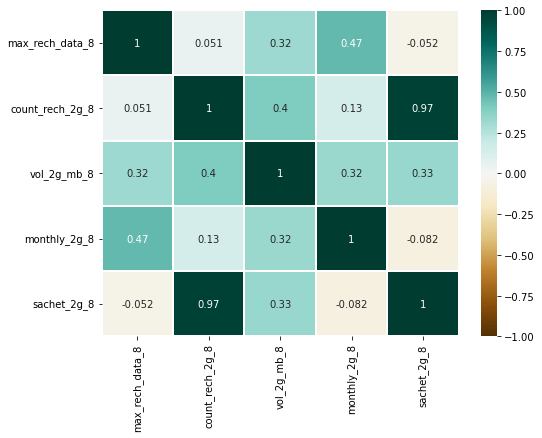

In [239]:
col_2g_8 = ['max_rech_data_8','count_rech_2g_8','vol_2g_mb_8','monthly_2g_8','sachet_2g_8']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_2g_8].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<A> We observe that `count_rech_2g_8` has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [240]:
high_df.drop('count_rech_2g_8',1,inplace = True)

d) 3G data recharge in the month of june

In [241]:
col_3g_6 = ['max_rech_data_6','count_rech_3g_6','vol_3g_mb_6','monthly_3g_6','sachet_3g_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_3g_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<AxesSubplot:>

<A> We observe that count_rech_3g_6 has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [242]:
high_df.drop('count_rech_3g_6',1,inplace = True)

e) 3G data recharge in the month of july

<AxesSubplot:>

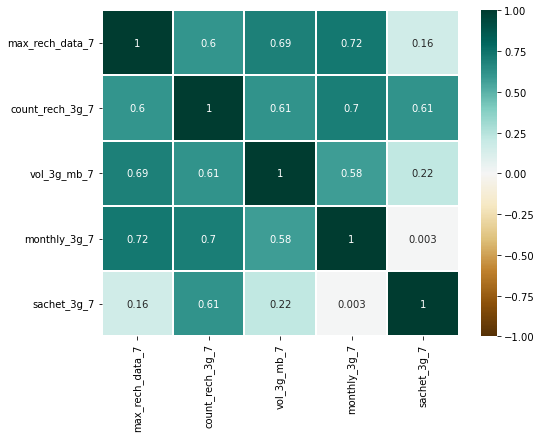

In [243]:
col_3g_7 = ['max_rech_data_7','count_rech_3g_7','vol_3g_mb_7','monthly_3g_7','sachet_3g_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_3g_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<A> We observe that `count_rech_3g_7` has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [244]:
high_df.drop('count_rech_3g_7',1,inplace = True)

f) 3G data recharge in the month of August

In [245]:
col_3g_8 = ['max_rech_data_8','count_rech_3g_8','vol_3g_mb_8','monthly_3g_8','sachet_3g_8']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[col_3g_8].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<AxesSubplot:>

<A> We observe that `count_rech_3g_8` has high correlation with other features. Let us drop count_rech_2g_6 to avoid multicollinearity.

In [246]:
high_df.drop('count_rech_3g_8',1,inplace = True)

g) Total outgoing calls made in the month of june

In [247]:
og_col_6 = ['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','total_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6','std_og_t2f_mou_6','loc_og_t2t_mou_6','loc_og_t2m_mou_6','loc_og_t2f_mou_6','onnet_mou_6','offnet_mou_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[og_col_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<AxesSubplot:>

<a> We observe that loc_og_mou_6, std_og_mou_6 tot, l_og_mou_6, onnet_7 & offnet_6 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [248]:
high_df.drop(['loc_og_mou_6', 'std_og_mou_6','total_og_mou_6','offnet_mou_6','onnet_mou_6'],1,inplace=True)

h) Total outgoing calls made in the month of july

<AxesSubplot:>

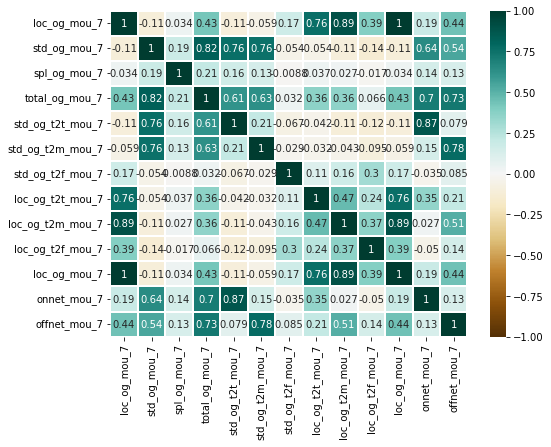

In [249]:
og_col_7 = ['loc_og_mou_7','std_og_mou_7','spl_og_mou_7','total_og_mou_7','std_og_t2t_mou_7','std_og_t2m_mou_7','std_og_t2f_mou_7','loc_og_t2t_mou_7','loc_og_t2m_mou_7','loc_og_t2f_mou_7','loc_og_mou_7','onnet_mou_7','offnet_mou_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[og_col_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<a> We observe that loc_og_mou_7, std_og_mou_7 and total_og_mou_7 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [250]:
high_df.drop(['loc_og_mou_7', 'std_og_mou_7','total_og_mou_7','onnet_mou_7','offnet_mou_7'],1,inplace=True)

i) Total outgoing calls made in the month of August

In [251]:
og_col_8 = ['loc_og_mou_8','std_og_mou_8','spl_og_mou_8','total_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8','loc_og_mou_8','onnet_mou_8','offnet_mou_8']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[og_col_8].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<AxesSubplot:>

<a> We observe that loc_og_mou_8, std_og_mou_8 and total_og_mou_8 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [252]:
high_df.drop(['loc_og_mou_8', 'std_og_mou_8','total_og_mou_8','onnet_mou_8','offnet_mou_8'],1,inplace=True)

j) Total incoming calls made in the month of june

In [253]:
ic_col_6 = ['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','total_ic_mou_6','std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[ic_col_6].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<AxesSubplot:>

<a> We observe that loc_ic_mou_6, std_ic_mou_6 and total_ic_mou_6 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [254]:
high_df.drop(['loc_ic_mou_6', 'std_ic_mou_6','total_ic_mou_6'],1,inplace=True)

k) Total incoming calls made in the month of july

<AxesSubplot:>

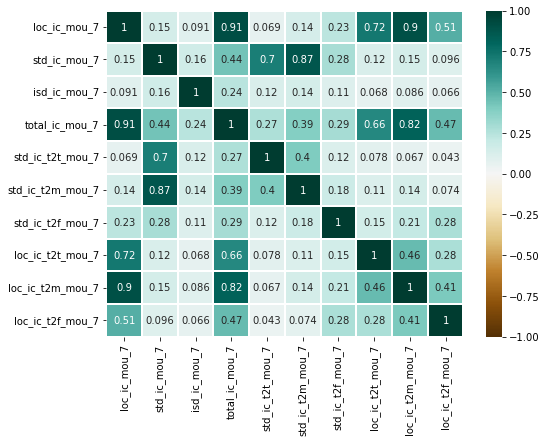

In [255]:
ic_col_7 = ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','total_ic_mou_7','std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[ic_col_7].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<a> We observe that loc_ic_mou_7, std_ic_mou_7 and total_ic_mou_7 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [256]:
high_df.drop(['loc_ic_mou_7', 'std_ic_mou_7','total_ic_mou_7'],1,inplace=True)

l) Total incoming calls made in the month of August

In [257]:
ic_col_8 = ['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','total_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8']
plt.figure(figsize=[8,6])
sns.heatmap(high_df[ic_col_8].corr(), annot=True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

<AxesSubplot:>

<a> We observe that loc_ic_mou_8, std_ic_mou_8 and total_ic_mou_8 have strong correlation with other features. These features should be taken care of to handle multicollinearity.

In [258]:
high_df.drop(['loc_ic_mou_8', 'std_ic_mou_8','total_ic_mou_8'],1,inplace=True)

In [259]:
# Let us also drop age_group from our dataset as aon_year & age_group are highly correlated.
high_df.drop('age_group',1,inplace=True)

In [260]:
# The shape of final dataset

print("The shape of final dataset is :",high_df.shape)

The shape of final dataset is : (30001, 107)


In [261]:
high_df.head()

cust_id    arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
0    4919.0   197.385   214.816   213.803      16.408431      12.872921   
7    4919.0  1069.180  1261.272  1255.019      16.230000      33.490000   
8    4919.0   378.721   492.223   137.362       0.000000       0.000000   
21   4919.0   514.453   597.753   637.760       0.000000       0.000000   
23   4919.0   112.510   193.897   366.966       0.000000       0.000000   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00      27.063178       20.51937           0.00   
7           31.64      23.740000       12.59000          38.06   
8            0.00       0.000000        0.00000           0.00   
21           0.00       0.000000        0.00000           0.00   
23           0.00       0.000000        0.00000           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             30.43             31.13   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              28.39               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0              9.38   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
21             97.93            125.94             61.79            665.36   
23              0.00              0.00              0.00              2.36   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.76             49.14              6.66              6.68   
8              10.04             75.69              0.00              0.00   
21            808.74            842.83              0.00              0.00   
23              6.35             39.61              0.00              0.00   

    std_og_t2f_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0               0.00           0.0           0.0          0.00   
7               5.93           4.5           0.0          6.50   
8               0.00           0.0           0.0         10.23   
21              0.00           0.0           0.0          0.00   
23              0.00           0.1           0.0         17.71   

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0               0.00              0.00              0.16              0.00   
7              58.14             32.26             27.31            217.56   
8              23.84              9.84              0.31             57.58   
21              2.48             10.19             19.54            118.23   
23             20.71    

### b) Encoding categorical variables

In [262]:
# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = high_df.select_dtypes(include=['object'])
df_categorical.drop('churn',1).head()

night_pck_user_6 night_pck_user_7 night_pck_user_8 fb_user_6 fb_user_7  \
0               0.0              0.0              0.0       1.0       1.0   
7              -1.0             -1.0             -1.0      -1.0      -1.0   
8              -1.0              0.0              0.0      -1.0       1.0   
21             -1.0             -1.0             -1.0      -1.0      -1.0   
23             -1.0              0.0              0.0      -1.0       1.0   

   fb_user_8  
0        1.0  
7       -1.0  
8        1.0  
21      -1.0  
23       1.0

In [263]:
from sklearn import preprocessing
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
0                  1                 1                 1          2   
7                  0                 0                 0          0   
8                  0                 1                 1          0   
21                 0                 0                 0          0   
23                 0                 1                 1          0   

    fb_user_7  fb_user_8  churn  
0           2          2      1  
7           0          0      1  
8           2          2      0  
21          0          0      0  
23          2          2      0

In [264]:
# concat df_categorical with original df
high_df = high_df.drop(df_categorical.columns, axis=1)

high_df = pd.concat([high_df, df_categorical], axis=1)
high_df.head()

cust_id    arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
0    4919.0   197.385   214.816   213.803      16.408431      12.872921   
7    4919.0  1069.180  1261.272  1255.019      16.230000      33.490000   
8    4919.0   378.721   492.223   137.362       0.000000       0.000000   
21   4919.0   514.453   597.753   637.760       0.000000       0.000000   
23   4919.0   112.510   193.897   366.966       0.000000       0.000000   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00      27.063178       20.51937           0.00   
7           31.64      23.740000       12.59000          38.06   
8            0.00       0.000000        0.00000           0.00   
21           0.00       0.000000        0.00000           0.00   
23           0.00       0.000000        0.00000           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             30.43             31.13   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              28.39               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0              9.38   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
21             97.93            125.94             61.79            665.36   
23              0.00              0.00              0.00              2.36   

    std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.76             49.14              6.66              6.68   
8              10.04             75.69              0.00              0.00   
21            808.74            842.83              0.00              0.00   
23              6.35             39.61              0.00              0.00   

    std_og_t2f_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0               0.00           0.0           0.0          0.00   
7               5.93           4.5           0.0          6.50   
8               0.00           0.0           0.0         10.23   
21              0.00           0.0           0.0          0.00   
23              0.00           0.1           0.0         17.71   

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0               0.00              0.00              0.16              0.00   
7              58.14             32.26             27.31            217.56   
8              23.84              9.84              0.31             57.58   
21              2.48             10.19             19.54            118.23   
23             20.71    

## 3) Model building

The main objective behind building these models  is identifying important predictor attributes which help the business understand indicators of churn.

### MODEL 1 -  Tree Model Regression

In [265]:
high_tree = high_df.copy()

In [266]:
# Putting response variable to y
y = high_tree.pop('churn')

# Putting feature variables to X
X = high_tree

In [267]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

Size of Feature variables dataset is: (30001, 106)
Size of response variable dataset is: (30001,)


In [268]:
# splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=100, stratify = y)
X_train.head()

cust_id   arpu_6   arpu_7   arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
81898  81899.0  271.831  199.033  393.619           0.00            0.0   
33489  33490.0  337.141  348.726  285.105          52.16            0.0   
21296  21297.0  569.597  837.682  668.214           0.00            0.0   
85765  85766.0  512.213  587.604  329.858           0.00            0.0   
51152  51153.0  285.673  161.771  176.107           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
81898           0.00           0.00            0.0           0.00   
33489           0.00          45.79            0.0           0.00   
21296           0.00           0.00            0.0           0.00   
85765          34.04           0.00            0.0          31.44   
51152           0.00           0.00            0.0           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
81898              2.09              2.03              3.63            110.28   
33489              6.04             40.09             83.24              6.99   
21296            279.24            314.94            298.78            431.99   
85765             58.76             80.03              8.66            319.78   
51152              7.73              3.13              4.04             26.33   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
81898             41.83            107.13              0.00              7.23   
33489             41.51             70.38              0.00              1.35   
21296            351.38            473.18             16.23             22.06   
85765            170.66             88.61              0.00              0.00   
51152             28.13             30.34              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
81898              4.51              0.00              4.36               0.0   
33489              2.03              0.00             10.19               0.0   
21296             13.81              0.00              0.00               0.0   
85765              0.90              0.00              0.00               0.0   
51152              0.00              8.88              0.31               0.0   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
81898              0.00              0.00              0.00              0.00   
33489             87.28            244.01             61.04             29.13   
21296             21.11              8.26              1.58             36.71   
85765              0.48              0.00              4.51            469.78   
51152              0.00              0.00              0.00              0.00   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
81898              0.00              1.13              1.11              0.00   
33489             64.48             61.96              0.00              0.00   
21296             28.79             67.08              0.00              2.08   
85765            716.39            322.56              6.83              6.68   
51152              0.00              0.00              0.00              0.00   

       std_og_t2f_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
81898              2.68          0.00          4.36          0.00   
33489              0.00          1.36         22.36          1.19   
21296              0.00          0.50          0.00          0.00   
85765              5.93          0.00          0.00          6.25   
51152              0.00         10.04          1.89          0.00   

       loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
81898              8.39              0.71             11.04            165.34   
33489             12.94             44.38             18.59             16.71   
21296            234.18            208.98       

**Decision tree with default parameters**

In [269]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(random_state = 100, class_weight='balanced')
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=100)

In [270]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8269
           1       0.47      0.47      0.47       732

    accuracy                           0.91      9001
   macro avg       0.71      0.71      0.71      9001
weighted avg       0.91      0.91      0.91      9001



In [271]:
import sklearn.metrics as metrics 

# Plotting AUC curve
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_default, drop_intermediate =True)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='DTree Default(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR -False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('Receiver operating characteristic (ROC curve)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred_default),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred_default),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred_default),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred_default))

Area under curve is: 0.71
Recall for our model is: 0.47
Accuracy on test set is: 0.91
Confusion matrix for our model is: [[7888  381]
 [ 390  342]]


**Hyperparameter Tuning**

The results of default tree are quite poor, and we need to improve it by tuning the hyperparameters.

`Tuning max_depth`

In [272]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 10,1)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds,scoring="recall",return_train_score=True, n_jobs=-1, 
                    error_score = 'raise',verbose = 1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

0.8104199893673577
{'max_depth': 5}


In [273]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.269957      0.024948         0.010272        0.006282   
1       0.436039      0.048242         0.020969        0.010862   
2       0.574026      0.028600         0.008102        0.003510   
3       0.683822      0.015784         0.023365        0.019293   
4       0.820813      0.023277         0.005660        0.003010   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.633431           0.675439   
1               2  {'max_depth': 2}           0.774194           0.780702   
2               3  {'max_depth': 3}           0.706745           0.795322   
3               4  {'max_depth': 4}           0.744868           0.804094   
4               5  {'max_depth': 5}           0.818182           0.792398   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.666667           0.654971           0.719298         0.669961   
1           0.766082           0.757310           0.804094         0.776476   
2           0.789474           0.833333           0.868421         0.798659   
3           0.792398           0.801170           0.801170         0.788740   
4           0.830409           0.777778           0.833333         0.810420   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.028405                9            0.679094            0.670812   
1        0.015882                5            0.784357            0.782004   
2        0.054061                3            0.763158            0.796635   
3        0.022284                4            0.804825            0.803950   
4        0.021795                1            0.855994            0.840527   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.673007            0.674470            0.657644   
1            0.790783            0.779810            0.780541   
2            0.809802            0.866862            0.878566   
3            0.837601            0.837601            0.803219   
4            0.874177            0.865399            0.898317   

   mean_train_score  std_train_score  
0          0.671005         0.007211  
1          0.783499         0.003959  
2          0.823005         0.043501  
3          0.817439         0.016470  
4          0.866883         0.019270

In [274]:
# plotting accuracies with max_depth
plt.figure(figsize=(8,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()


<a> The model perfroms the best at max_depth = 5 and after that the increase in depth drops the accuracy on the test dataset.

`Tuning min_samples_leaf`

In [275]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters,cv=n_folds, 
                   scoring="recall", n_jobs = -1,return_train_score=True, verbose = 1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)


Fitting 5 folds for each of 39 candidates, totalling 195 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

0.8244447874329028
{'min_samples_leaf': 120}


In [276]:
scores = tree.cv_results_
pd.DataFrame(scores).head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.833987      0.076991         0.010144        0.010917   
1       1.766019      0.100890         0.020843        0.021365   
2       1.730658      0.087131         0.006698        0.004060   
3       1.676485      0.054555         0.016139        0.013767   
4       1.657798      0.084384         0.004908        0.001750   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.615836   
1                     10  {'min_samples_leaf': 10}           0.703812   
2                     15  {'min_samples_leaf': 15}           0.724340   
3                     20  {'min_samples_leaf': 20}           0.771261   
4                     25  {'min_samples_leaf': 25}           0.741935   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.619883           0.654971           0.619883           0.640351   
1           0.722222           0.692982           0.690058           0.713450   
2           0.754386           0.739766           0.716374           0.707602   
3           0.760234           0.763158           0.742690           0.763158   
4           0.786550           0.792398           0.751462           0.760234   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.630185        0.015072               39            1.000000   
1         0.704505        0.012132               38            0.989035   
2         0.728494        0.016722               37            0.973684   
3         0.760100        0.009449               36            0.972222   
4         0.766516        0.019705               35            0.941520   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            0.994148            0.991953            0.991222   
2            0.974396            0.970007            0.975128   
3            0.967813            0.968544            0.972933   
4            0.954645            0.954645            0.953914   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.991953          0.991662         0.001640  
2            0.978054          0.974254         0.002592  
3            0.975128          0.971328         0.002754  
4            0.950988          0.951142         0.004996

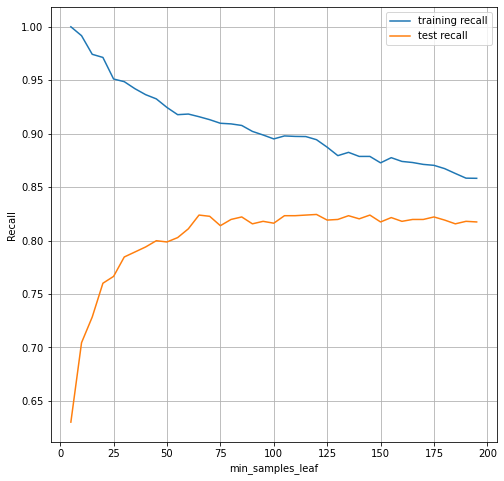

In [277]:
# plotting accuracies with min_samples_leaf
plt.figure(figsize = (8,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

As seen from the above plot, accuracy of the model increases as min_samples_leaf increases. A steep increase from 0 to 115 and it kind of flattens rest of the way. 

`Tuning min_samples_split`

In [278]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(300,450,5)}

# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, return_train_score=True,
                    cv=n_folds, verbose=1,
                   scoring="recall",n_jobs=-1)
tree.fit(X_train, y_train)
print(tree.best_score_)
print(tree.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/s

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

0.8191936341342114
{'min_samples_split': 395}


In [279]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.638103      0.087821         0.005713        0.001689   
1       1.695987      0.174715         0.008519        0.005502   
2       1.868117      0.054164         0.014518        0.005617   
3       1.632943      0.133892         0.016592        0.010204   
4       1.608992      0.065870         0.014758        0.013948   

  param_min_samples_split                      params  split0_test_score  \
0                     300  {'min_samples_split': 300}           0.797654   
1                     305  {'min_samples_split': 305}           0.803519   
2                     310  {'min_samples_split': 310}           0.803519   
3                     315  {'min_samples_split': 315}           0.803519   
4                     320  {'min_samples_split': 320}           0.806452   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.856725           0.812865           0.780702           0.815789   
1           0.856725           0.812865           0.786550           0.815789   
2           0.862573           0.812865           0.786550           0.815789   
3           0.845029           0.812865           0.786550           0.815789   
4           0.845029           0.812865           0.792398           0.807018   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.812747        0.025290               24            0.871345   
1         0.815090        0.023183               13            0.872807   
2         0.816259        0.025305                7            0.872807   
3         0.812751        0.019094               23            0.872807   
4         0.812752        0.017485               18            0.872807   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.911485            0.910753            0.910753   
1            0.911485            0.910753            0.912217   
2            0.916606            0.910753            0.912217   
3            0.899049            0.911485            0.912217   
4            0.899049            0.911485            0.912217   

   split4_train_score  mean_train_score  std_train_score  
0            0.907827          0.902433         0.015595  
1            0.907827          0.903018         0.015179  
2            0.907827          0.904042         0.015872  
3            0.907827          0.900677         0.014700  
4            0.896123          0.898336         0.014302

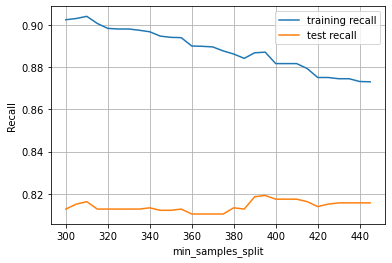

In [280]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()


<a> The test accuracy of the model increases as the min_samples_split increases.

#### Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [281]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(3,10, 2),
    'min_samples_leaf': range(100, 125, 5),
    'min_samples_split': range(380,400,5),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state = 100, class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from ve

https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/s

https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/s

https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/s

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from ve

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 10, 2),
                         'min_samples_leaf': range(100, 125, 5),
                         'min_samples_split': range(380, 400, 5)},
             verbose=1)

In [282]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8519523809523809
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 380}


In [283]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.597798      0.055605         0.021279        0.021721   
1         0.583282      0.022987         0.012874        0.018558   
2         0.651937      0.039429         0.006413        0.003177   
3         0.704936      0.023297         0.008698        0.007715   
4         0.656720      0.031230         0.015331        0.014540   
5         0.658576      0.028761         0.006208        0.005464   
6         0.606041      0.021277         0.009546        0.009092   
7         0.637877      0.022948         0.008018        0.010094   
8         0.645893      0.030404         0.005716        0.004497   
9         0.609847      0.034813         0.004630        0.002418   
10        0.622692      0.030850         0.010684        0.014356   
11        0.555675      0.026575         0.010849        0.009929   
12        0.575735      0.017197         0.006473        0.007542   
13        0.744753      0.105323         0.013183        0.013743   
14        0.822770      0.032564         0.004744        0.002942   
15        0.634461      0.035188         0.003066        0.001326   
16        0.564695      0.023678         0.019128        0.018964   
17        0.571729      0.033770         0.002713        0.000939   
18        0.596302      0.033530         0.003463        0.001875   
19        0.582361      0.013896         0.011580        0.014783   
20        0.973307      0.018211         0.005103        0.002410   
21        0.939903      0.041546         0.002447        0.000212   
22        0.959574      0.019407         0.004382        0.002526   
23        0.940360      0.037904         0.004412        0.002361   
24        0.900632      0.030895         0.003836        0.002492   
25        0.934022      0.033535         0.014105        0.010188   
26        0.962670      0.028570         0.004006        0.002048   
27        0.946482      0.029174         0.008277        0.010281   
28        0.928423      0.016858         0.004370        0.002601   
29        0.917979      0.030269         0.002844        0.001065   
30        0.921598      0.033028         0.003878        0.002845   
31        0.910011      0.023251         0.002402        0.000219   
32        0.915444      0.049120         0.002965        0.001490   
33        0.931094      0.037350         0.015003        0.019070   
34        0.898416      0.030560         0.007307        0.007630   
35        0.923562      0.015857         0.009669        0.008630   
36        0.942638      0.034720         0.004383        0.004160   
37        0.924927      0.018354         0.008482        0.012356   
38        0.990802      0.019735         0.004696        0.002873   
39        0.947989      0.026391         0.006521        0.008171   
40        1.271015      0.022937         0.013963        0.016364   
41        1.231888      0.047692         0.004555        0.004211   
42        1.309010      0.093973         0.003517        0.001914   
43        1.375877      0.045533         0.002769        0.000395   
44        1.213771      0.022466         0.008463        0.010570   
45        1.165802      0.046175         0.005746        0.006169   
46        1.185388      0.049539         0.008283        0.007364   
47        1.167249      0.034616         0.003535        0.002125   
48        1.175652      0.024379         0.006633        0.006644   
49        1.143812      0.035809         0.009596        0.008841   
50        1.172375      0.012205         0.003821        0.002742   
51        1.200085      0.019319         0.003862        0.002118   
52        1.201713      0.013119         0.003474        0.002079   
53        1.195594      0.053103         0.006619        0.006074   
54        1.151791      0.043281         0.012815        0.014886   
55        1.157200      0.017618         0.003530        0.001463   
56        1.130043      0.009191         0.007329        0.004599   
57 

**Running the model with best parameters obtained from grid search.**

In [284]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=grid_search.best_params_['max_depth'],
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'], class_weight='balanced')
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=100, min_samples_split=380,
                       random_state=100)

In [285]:
# accuracy score
clf_gini.score(X_train,y_train)

0.8254285714285714

<a>The accuracy of the Decision Tree model on the train dataset is around 82%, which is really good for a model to be classified as a good model.

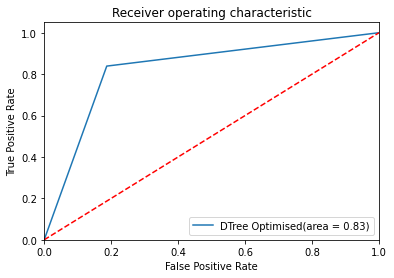

Area under curve is: 0.83
Recall for our model is: 0.84
Accuracy on test set is: 0.82
Confusion matrix for our model is: [[6724 1545]
 [ 118  614]]


In [286]:
# classification metrics

y_pred = clf_gini.predict(X_test)

logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='DTree Optimised(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred))

In [287]:
# accuracy score on training set

y_train_pred = clf_gini.predict(X_train)
y_train_pred = y_train_pred.reshape(-1,1)
print("Accuracy on train set is:" , round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy on train set is: 0.82


In [288]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8269
           1       0.28      0.84      0.42       732

    accuracy                           0.82      9001
   macro avg       0.63      0.83      0.66      9001
weighted avg       0.93      0.82      0.85      9001



In [289]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[6724 1545]
 [ 118  614]]


In [290]:
speci = round((cm[0,0]/(cm[0,0]+cm[0,1])),2)
sensi = round((cm[1,1]/(cm[1,0]+cm[1,1])),2)

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 0.81
The sensitivity is: 0.84


 **<a>INFERENCE**<br>
<a> 
 - The accuracy of the Decision Tree model on the TEST dataset is 83% and train set is 82% , which is pretty good.<br>
 - The RECALL score for both Churn and Non-Churns is around 80%.<br>
 - specificity obtained is : 81%
 - sensitivity obtained is: 84%

From the above metrics, we can conclude that the above is a decent one.

<hr>

### MODEL 2 -  Random Forest

In [291]:
high_rf = high_df.copy()

In [292]:
# Putting response variable to y
y = high_rf.pop('churn')

# Putting feature variables to X
X = high_rf

In [293]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

Size of Feature variables dataset is: (30001, 106)
Size of response variable dataset is: (30001,)


In [294]:
# splitting the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=100, stratify = y)
X_train.head()

cust_id   arpu_6   arpu_7   arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
81898  81899.0  271.831  199.033  393.619           0.00            0.0   
33489  33490.0  337.141  348.726  285.105          52.16            0.0   
21296  21297.0  569.597  837.682  668.214           0.00            0.0   
85765  85766.0  512.213  587.604  329.858           0.00            0.0   
51152  51153.0  285.673  161.771  176.107           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
81898           0.00           0.00            0.0           0.00   
33489           0.00          45.79            0.0           0.00   
21296           0.00           0.00            0.0           0.00   
85765          34.04           0.00            0.0          31.44   
51152           0.00           0.00            0.0           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
81898              2.09              2.03              3.63            110.28   
33489              6.04             40.09             83.24              6.99   
21296            279.24            314.94            298.78            431.99   
85765             58.76             80.03              8.66            319.78   
51152              7.73              3.13              4.04             26.33   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
81898             41.83            107.13              0.00              7.23   
33489             41.51             70.38              0.00              1.35   
21296            351.38            473.18             16.23             22.06   
85765            170.66             88.61              0.00              0.00   
51152             28.13             30.34              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
81898              4.51              0.00              4.36               0.0   
33489              2.03              0.00             10.19               0.0   
21296             13.81              0.00              0.00               0.0   
85765              0.90              0.00              0.00               0.0   
51152              0.00              8.88              0.31               0.0   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
81898              0.00              0.00              0.00              0.00   
33489             87.28            244.01             61.04             29.13   
21296             21.11              8.26              1.58             36.71   
85765              0.48              0.00              4.51            469.78   
51152              0.00              0.00              0.00              0.00   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
81898              0.00              1.13              1.11              0.00   
33489             64.48             61.96              0.00              0.00   
21296             28.79             67.08              0.00              2.08   
85765            716.39            322.56              6.83              6.68   
51152              0.00              0.00              0.00              0.00   

       std_og_t2f_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
81898              2.68          0.00          4.36          0.00   
33489              0.00          1.36         22.36          1.19   
21296              0.00          0.50          0.00          0.00   
85765              5.93          0.00          0.00          6.25   
51152              0.00         10.04          1.89          0.00   

       loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
81898              8.39              0.71             11.04            165.34   
33489             12.94             44.38             18.59             16.71   
21296            234.18            208.98       



#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [295]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters
rfc = RandomForestClassifier(class_weight = 'balanced',random_state=100,n_jobs = -1)

# fit
rfc.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=100)

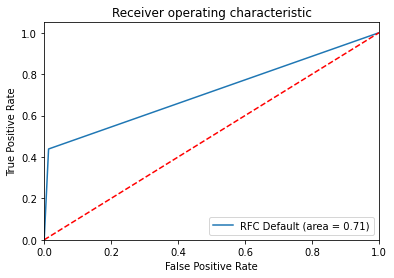

Area under curve is: 0.71
Recall for our model is: 0.44
Accuracy on test set is: 0.94
Confusion matrix for our model is: [[8161  108]
 [ 411  321]]


In [296]:
# Making Predictions
y_pred_default = rfc.predict(X_test)


logit_roc_auc = metrics.roc_auc_score(y_test, y_pred_default )
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_default )
plt.figure()
plt.plot(fpr, tpr, label='RFC Default (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_pred_default),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, y_pred_default),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, y_pred_default),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, y_pred_default))

In [297]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8269
           1       0.75      0.44      0.55       732

    accuracy                           0.94      9001
   macro avg       0.85      0.71      0.76      9001
weighted avg       0.94      0.94      0.94      9001



In [298]:
# Printing confusion matrix
cm = confusion_matrix(y_test,y_pred_default)
print(cm)

[[8161  108]
 [ 411  321]]


In [299]:
speci = round((cm[0,0]/(cm[0,0]+cm[0,1])),2)
sensi = round((cm[1,1]/(cm[1,0]+cm[1,1])),2)

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 0.99
The sensitivity is: 0.44


In [300]:
print(accuracy_score(y_test,y_pred_default))

0.9423397400288857


The model does not do good. let's now look at the list of hyperparameters which we can tune to improve model performance.

**Hyperparameter Tuning**

The results of default tree are poor, and we need to improve it by tuning the hyperparameters.

`Tuning max_depth`

In [301]:
# parameters to build the model on
parameters = {'max_depth': range(2, 15, 1)}

# number of folds
n_folds = 5

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)


# fit tree on training data
rf = GridSearchCV(rf, parameters, return_train_score=True,cv=n_folds, n_jobs=-1,
                   scoring="recall",verbose = 1)
rf.fit(X_train, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

0.7548112706007443
{'max_depth': 5}


In [302]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.942617      0.060371         0.083499        0.012312   
1       3.844720      0.032050         0.067700        0.012065   
2       4.696885      0.028351         0.077228        0.017138   
3       5.467928      0.112025         0.072707        0.022483   
4       6.366816      0.067652         0.101775        0.028577   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               2  {'max_depth': 2}           0.665689           0.719298   
1               3  {'max_depth': 3}           0.703812           0.769006   
2               4  {'max_depth': 4}           0.706745           0.786550   
3               5  {'max_depth': 5}           0.727273           0.786550   
4               6  {'max_depth': 6}           0.736070           0.771930   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.695906           0.687135           0.733918         0.700389   
1           0.716374           0.713450           0.760234         0.732575   
2           0.733918           0.736842           0.789474         0.750706   
3           0.736842           0.733918           0.789474         0.754811   
4           0.722222           0.733918           0.774854         0.747799   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.024007                7            0.711988            0.706657   
1        0.026637                4            0.745614            0.741039   
2        0.032231                2            0.780702            0.768837   
3        0.027301                1            0.804094            0.798830   
4        0.021441                3            0.822368            0.825165   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.717630            0.711046            0.707388   
1            0.752012            0.734455            0.747623   
2            0.787125            0.773958            0.773226   
3            0.810534            0.802487            0.811266   
4            0.831748            0.820775            0.828091   

   mean_train_score  std_train_score  
0          0.710942         0.003920  
1          0.744148         0.005995  
2          0.776769         0.006420  
3          0.805442         0.004777  
4          0.825629         0.003947

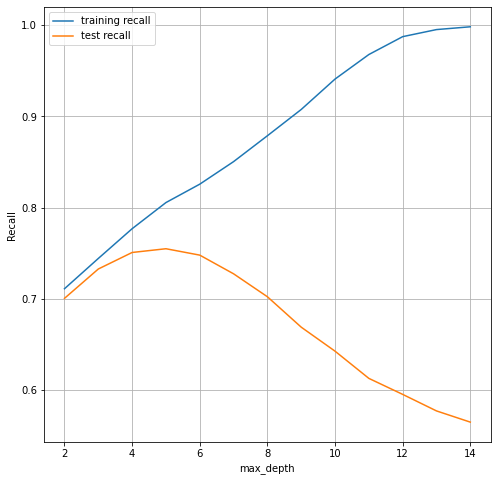

In [303]:
# plotting accuracies with max_depth
plt.figure(figsize=(8,8))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.grid(True)
plt.legend()
plt.show()


<a> We observe that with increase in the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth. The model perfroms the best at max_depth = 5 and after that the increase in depth drops the accuracy on the test dataset.

`Tuning n_estimators`

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. We'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [304]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': [10,25,50,75,100]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(random_state = 100,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds, verbose=1,scoring="recall",return_train_score = True, 
                  n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past beha

https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTr

0.45230231002726756
{'n_estimators': 75}


In [305]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.617317      0.100706         0.019815        0.008938   
1       3.160788      0.071089         0.039189        0.013482   
2       5.792617      0.046230         0.083830        0.016378   
3       8.356290      0.051642         0.121159        0.018315   
4      10.299512      0.534257         0.114748        0.018811   

  param_n_estimators                 params  split0_test_score  \
0                 10   {'n_estimators': 10}           0.407625   
1                 25   {'n_estimators': 25}           0.416422   
2                 50   {'n_estimators': 50}           0.428152   
3                 75   {'n_estimators': 75}           0.436950   
4                100  {'n_estimators': 100}           0.416422   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.418129           0.415205           0.380117           0.432749   
1           0.467836           0.435673           0.432749           0.479532   
2           0.473684           0.432749           0.426901           0.456140   
3           0.488304           0.423977           0.438596           0.473684   
4           0.464912           0.426901           0.441520           0.473684   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.410765        0.017357                5            0.921053   
1         0.446442        0.023483                2            0.989766   
2         0.443525        0.018426                4            0.995614   
3         0.452302        0.024410                1            0.998538   
4         0.444688        0.021795                3            0.999269   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.921726            0.927579            0.918800   
1            0.991222            0.987564            0.985369   
2            0.998537            0.996342            0.996342   
3            0.998537            0.999268            0.998537   
4            1.000000            1.000000            0.999268   

   split4_train_score  mean_train_score  std_train_score  
0            0.912948          0.920421         0.004729  
1            0.984638          0.987712         0.002510  
2            0.993416          0.996050         0.001642  
3            0.998537          0.998683         0.000293  
4            0.998537          0.999415         0.000547

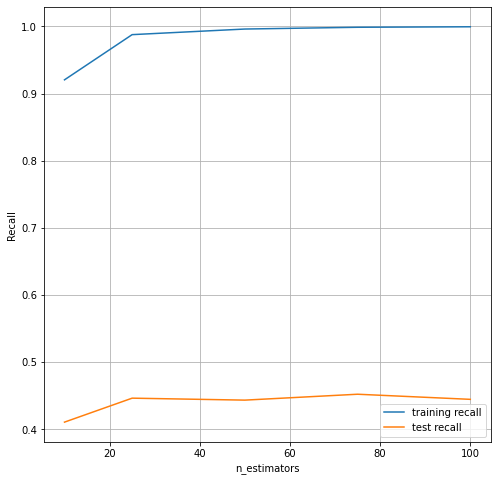

In [306]:
# plotting accuracies with n_estimators
plt.figure(figsize=(8,8))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()


`Tuning min_samples_split`

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [307]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {"min_samples_split": range(100,200,10)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead

  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To k

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1, param_grid={'min_samples_split': range(100, 200, 10)},
             return_train_score=True, scoring='recall', verbose=1)

In [308]:
print(rf.best_score_)
print(rf.best_params_)

0.7753039599584786
{'min_samples_split': 190}


In [309]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.172035      0.116289         0.187258        0.010628   
1       8.224087      0.237926         0.201683        0.026448   
2       8.216771      0.271173         0.201162        0.011149   
3       8.458258      0.101780         0.200582        0.022202   
4       8.269924      0.094010         0.160235        0.042828   

  param_min_samples_split                      params  split0_test_score  \
0                     100  {'min_samples_split': 100}           0.713533   
1                     110  {'min_samples_split': 110}           0.731107   
2                     120  {'min_samples_split': 120}           0.736380   
3                     130  {'min_samples_split': 130}           0.759227   
4                     140  {'min_samples_split': 140}           0.752197   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.724561           0.761404         0.733166        0.020468   
1           0.733333           0.778947         0.747796        0.022046   
2           0.731579           0.778947         0.748969        0.021289   
3           0.733333           0.780702         0.757754        0.019366   
4           0.733333           0.784211         0.756580        0.021001   

   rank_test_score  split0_train_score  split1_train_score  \
0               10            0.880702            0.878841   
1                9            0.881579            0.875329   
2                8            0.862281            0.870061   
3                6            0.866667            0.867428   
4                7            0.862281            0.867428   

   split2_train_score  mean_train_score  std_train_score  
0            0.878841          0.879461         0.000877  
1            0.875329          0.877412         0.002946  
2            0.870061          0.867468         0.003668  
3            0.872695          0.868930         0.002681  
4            0.858648          0.862785         0.003602

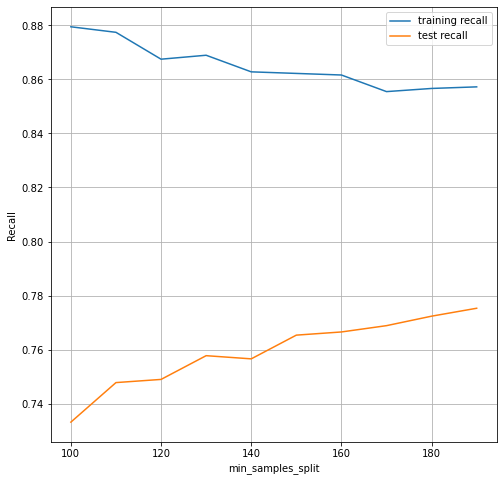

In [310]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(8,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

`Tuning min_samples_leaf`

In [311]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {"min_samples_leaf": range(1,200,20)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight = 'balanced',random_state=0)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 200, 20)},
             return_train_score=True, scoring='recall', verbose=1)

In [312]:
print(rf.best_score_)
print(rf.best_params_)

0.7905199436787634
{'min_samples_leaf': 181}


In [313]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.343879      0.094843         0.228153        0.046092   
1       7.805330      0.076562         0.210029        0.017035   
2       7.313939      0.136048         0.190513        0.027946   
3       6.845309      0.030817         0.159342        0.027379   
4       6.456718      0.036520         0.149021        0.007391   

  param_min_samples_leaf                    params  split0_test_score  \
0                      1   {'min_samples_leaf': 1}           0.423550   
1                     21  {'min_samples_leaf': 21}           0.704745   
2                     41  {'min_samples_leaf': 41}           0.755712   
3                     61  {'min_samples_leaf': 61}           0.775044   
4                     81  {'min_samples_leaf': 81}           0.787346   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.408772           0.466667         0.432996        0.024561   
1           0.712281           0.759649         0.725558        0.024301   
2           0.735088           0.785965         0.758921        0.020894   
3           0.756140           0.796491         0.775892        0.016484   
4           0.754386           0.796491         0.779408        0.018083   

   rank_test_score  split0_train_score  split1_train_score  \
0               10            1.000000            1.000000   
1                9            0.891228            0.888499   
2                8            0.867544            0.856892   
3                7            0.844737            0.846356   
4                6            0.839474            0.842845   

   split2_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            0.896400          0.892042         0.003277  
2            0.862160          0.862199         0.004349  
3            0.849868          0.846987         0.002142  
4            0.838455          0.840258         0.001876

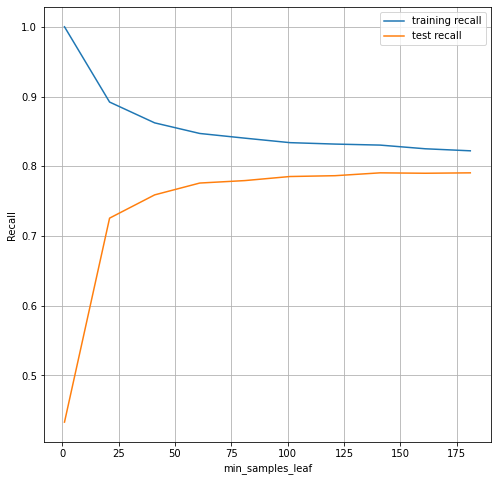

In [314]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(8,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.grid(True)
plt.show()

As seen from the above plot, recall of the model increases as min_samples_leaf increases. A steep increase is observed from 0 to 25. The curve flattens after min_samples_leaf = 125. So let us choose this as our Optimal minimum number of samples leaf.

`Tuning max_features`

Let's see how the model performance varies with `max_features`, which is the maximum number of features considered for splitting at a node.

In [315]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [25,50,75]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight = 'balanced',random_state=100)

# fit tree on training data
rf = GridSearchCV(rf, parameters, n_jobs  = -1,cv=n_folds, verbose = 1,
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, random_state=100),
             n_jobs=-1, param_grid={'max_features': [25, 50, 75]},
             return_train_score=True, scoring='recall', verbose=1)

In [316]:
print(rf.best_score_)
print(rf.best_params_)

0.7969526922167751
{'max_features': 75}


In [317]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.990543      0.038017         0.119214        0.012560   
1      14.441356      0.078412         0.074570        0.023283   
2      17.603781      1.817265         0.074389        0.011278   

  param_max_features                params  split0_test_score  \
0                 25  {'max_features': 25}           0.759227   
1                 50  {'max_features': 50}           0.780316   
2                 75  {'max_features': 75}           0.789104   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.759649           0.805263         0.774713        0.021603   
1           0.784211           0.821053         0.795193        0.018354   
2           0.777193           0.824561         0.796953        0.020119   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.793860            0.811238   
1                2            0.802632            0.841967   
2                1            0.814912            0.838455   

   split2_train_score  mean_train_score  std_train_score  
0            0.826163          0.810420         0.013201  
1            0.851624          0.832074         0.021189  
2            0.857770          0.837046         0.017525

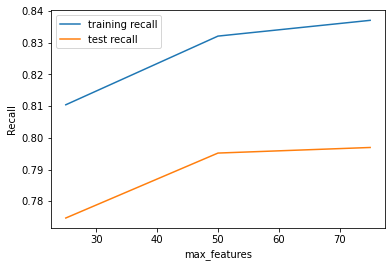

In [318]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()


Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features.

#### **Grid Search to Find Optimal Hyperparameters**

We can now find the optimal hyperparameters using GridSearchCV.

In [319]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,8,10],
    'min_samples_split': [170,190,200], 'min_samples_leaf': [120,130,140] }

# Create a based model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when 

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mdsanowarhossain/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be r

0.8883333333333333
{'max_depth': 8, 'min_samples_leaf': 120, 'min_samples_split': 170}


In [320]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8883333333333333 using {'max_depth': 8, 'min_samples_leaf': 120, 'min_samples_split': 170}


**Fitting the final model with the best parameters obtained from grid search.**

In [321]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,random_state=100,
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                              class_weight='balanced')

In [322]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=170, random_state=100)

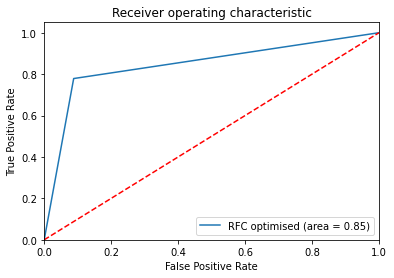

Area under curve is: 0.85
Recall for our model is: 0.78
Accuracy on test set is: 0.9
Confusion matrix for our model is: [[7541  728]
 [ 162  570]]


In [323]:
# predict
predictions = rfc.predict(X_test)

# Plotting ROC
logit_roc_auc = metrics.roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, label='RFC optimised (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print("Area under curve is:", round(metrics.roc_auc_score(y_test, predictions),2))
print("Recall for our model is:" , round(metrics.recall_score(y_test, predictions),2))
print("Accuracy on test set is:" , round(metrics.accuracy_score(y_test, predictions),2))
print("Confusion matrix for our model is:" , metrics.confusion_matrix(y_test, predictions))

In [324]:
# accuracy score on training set

y_train_pred = rfc.predict(X_train)
y_train_pred = y_train_pred.reshape(-1,1)
print("Accuracy on train set is:" , round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy on train set is: 0.82


In [325]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8269
           1       0.44      0.78      0.56       732

    accuracy                           0.90      9001
   macro avg       0.71      0.85      0.75      9001
weighted avg       0.94      0.90      0.91      9001



In [326]:
# confusion matrix
cm = confusion_matrix(y_test,predictions)
print(cm)

[[7541  728]
 [ 162  570]]


In [327]:
speci = cm[0,0]/(cm[0,0]+cm[0,1])
sensi = cm[1,1]/(cm[1,0]+cm[1,1])

print('The specificity is:',speci)
print('The sensitivity is:',sensi)

The specificity is: 0.9119603337767566
The sensitivity is: 0.7786885245901639


 **<a>INFERENCE**<br>
<a> 
 - The accuracy of the Random Forest Tree model on the TEST dataset is 85% % training dataset is 82%, which is pretty good for a model.<br>
 - The RECALL score for Churn is 78% and Non-Churns is around 91%.<br>
 - specificity obtained is : 91%
 - sensitivity obtained is: 78%

From the above metrics, we can conclude that the above model performs well.

--------------------------

## 3) MODEL SUMMARY

In our case study we have chosen `Recall` as the Performace measure because it is more important to predict the customers who are more likely to churn rather than accuracy.

In [328]:
model_stats = pd.DataFrame(
    {'model':['DTree - Default Param','DTree - Tuned Param','RFC - Default Param','RFC - Tuned Param'],
                      
    'Recall':       [0.48,0.84,0.43,0.78],
    'Test accuracy':     [0.92,0.82,0.94,0.85],
    'Roc_auc_score':[0.71,0.83,0.71,0.85],
    })

model_stats.sort_values(by=['Recall','Test accuracy','Roc_auc_score'],ascending=False)

model  Recall  Test accuracy  Roc_auc_score
1    DTree - Tuned Param    0.84           0.82           0.83
3      RFC - Tuned Param    0.78           0.85           0.85
0  DTree - Default Param    0.48           0.92           0.71
2    RFC - Default Param    0.43           0.94           0.71

<a> `Decision tree with tuned hyperparameters` outperforms all the other models in terms of `recall` and has a pretty `decent accuracy and AUC score`. Let us choose this model to find out the most important features affecting churn.

In [329]:
features = clf_gini.feature_importances_
cols = X.iloc[:,sorted(range(len(features)), key=lambda i: features[i])[-10:]].columns
cols


Index(['arpu_7', 'max_rech_amt_6', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8',
       'max_rech_data_8', 'last_day_rch_amt_8', 'total_data_rech_8',
       'total_amt_8', 'roam_og_mou_8', 'loc_ic_t2m_mou_8'],
      dtype='object')

-----------------------------

# 4) **Strategies to be incorporated:**<br>
    
1. Customers in the telecommunications business have access to several service providers and may actively move from one operator to another. In this highly competitive sector, the typical yearly turnover rate for the telecoms industry is between 15 and 25 percent.<br>
2. Given that it costs five to ten times as much to gain a new client as it does to maintain an existing one, customer retention has surpassed customer acquisition in importance.<br>
3. In order to control High Value Customer Churn, we have identified the customers most likely to churn and the variables that contribute to the high churn rate.<br>
4. The exploratory research revealed a significant decline in recharge, call use, and data consumption during the 'Action Phase' in the eighth month. From the list of significant predictors of churn, the following is once again evident: <br>
  - 'arpu_7', 
  - 'max_rech_amt_6', 
  - 'std_og_t2m_mou_8', 
  - 'loc_og_t2m_mou_8',
  - 'max_rech_data_8', 
  - 'last_day_rch_amt_8', 
  - 'total_data_rech_8',
  - 'total_amt_8', 
  - 'roam_og_mou_8', 
  - 'loc_ic_t2m_mou_8'
  <br>
  
5. The'seventh month' average revenue per user plays a crucial part in determining churn. A rapid decline in it may suggest that the client is considering churning, prompting the need for immediate action.<br>
6. Local & STD Minutes of use (incoming & outgoing) have the greatest impact on client retention.
7. Lastday of recharge amount in the action phase is also a significant factor in determining churn.
8. The maximum rcharge for calling data by a customer in the sixth month and eighth month should be carefully targeted, since the sixth month represents the beginning of the good phase and the eighth month represents the action period.
9. Indicators of churn include the last day of recharging in the eighth month, the total quantity of data recharged in the eighth month, and the total amount customers spend on calls and data in the eighth month.
10. Roaming calls made by customers during the eighth month also play a crucial part in determining attrition.

Following strategies can be incorporated :<br>

1. Sudden decrease in Local & STD Minutes of consumption may be the result of inadequate customer service, a subpar network, or inappropriate customer schemes/plans. Efforts must be made to provide a superior network and prioritize customer happiness.
2. Such consumers should be offered with customized strategies to prevent churn.
3. Routine feedback calls might be made to customers based on their consumption or most recent recharge in order to understand their complaints and expectations. Suitable measures must be implemented to prevent their churning.
4. During the action phase, it is possible to entice clients by displaying a quick decline in the total amount spent on calls and data recharge.
5. Promotional offers are also beneficial